# **Milestone 1**

## **Context**
 - Why is this problem important to solve?
 
Customer segmentation is the process of dividing a dataset of customers into groups of similar customers based on certain common characteristics, usually for the purpose of understanding the population dataset in a better fashion. Understanding customer behavior and characteristics is usually a critical part of the marketing operations of any business or organization, with direct consequences on sales and market strategy. Customer segmentation is often viewed to achieve a better return on investment from marketing efforts and make organizations more efficient in terms of utilizing their money, time, and other critical resources in custom marketing strategies for different groups of customers based on their unique needs and motivations.

For example, it has been understood from various research that customer segmentation often has a huge impact on people’s email engagement. Segmented campaigns often see over 100% more clicks than none-segmented campaigns, and email marketers who have segmented their audience before campaigning have reported a 6-7 times growth in their overall revenue. It has also been observed in various contexts that in today’s world, individual customers prefer personalized communications and offerings to their interests

In the context of marketing analytics then, customer segmentation has a vital role to play in optimizing ROI. It typically involves analyzing metrics around customer engagement with various marketing activities including but not limited to, ATL (above the line) marketing activities, BTL (below the Line) campaigns, and targeting personalized offers. Typically, the variables of interest are customer profiles, campaign conversion rates and information associated with various marketing channels. Based on these feature categories, the target is to create the best possible segments from the given data. 


### **The objectives:**

 - What is the intended goal?
 
The objective is to come up with the best possible segments using unsupervised learning ideas such as Dimensionality reduction and Clustering on the given customer dataset.



### **The key questions:**

- What are the key questions that need to be answered?

- What are the unique variables and what should be done about them?
- Are there any missing values and if so, what should be done about them?
- Are there any outliers and if so, what should be done about them?
- What is the distribution of the various variables? 
- How do the variables correlate with one another?


### **The problem formulation**:

- What is it that we are trying to solve using data science?

We are using data science embedded formulars to obtain useful insights and observations which we will later use in the segmentation of customers which could later be used to come up with an effective market strategy for the various consumers in the various segments 

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading Libraries**

In [1]:
#installing yellowbrick due to error message recieved 
!pip install yellowbrick

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### **Loading the data set**

In [3]:
# loading the dataset
data = pd.read_csv("marketing_campaign.csv")

### **Checking the shape of the data**

In [4]:
print(data.shape)

(2240, 27)


**Observations**

It's observed that there are 2240 rows and 27 columns

### **Understanding the data by observing a few rows**

In [5]:
# View of the first five rows
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [6]:
# View of the last five rows
data.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
2235         1  13-06-2013       46       709  ...                    3   
2236         1  10-06-2014       56       406  ...                    2   
2237         0  25-01-2014       91       908  ...                    3   
2238         1  24-01-2014        8       428  ...                    5   
2239         1  15-10-2012       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[5 rows x 27 columns]

**Observations**

There are 2240 observations form the data set. 

There are 5 rows and 27 columns 

### **checking the data types and and missing values of each column**

In [7]:
#checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observations**

- There are 2240 total observations. 

- All columns apart from Income have non-null values 

- Three columns (Dt_Customer, Marital_Status, and Education) are of object data type with one (Income) of float data type and the rest of integer data type. 

In [8]:
#finding the percentage of missing values in the data
data.isna().sum() / (len(data)) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

**Observations**

- The only missing values in the data set are from the Income column

- The missing valiues in the Income columnn is approximately 1.1% of the data set. 

We can observe that ID has no null values. Also the number of unique values are equal to the number of observations. So, ID looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

**Dropping the ID column**

In [9]:
data.drop(columns = 'ID', inplace = True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [10]:
pd.options.display.max_columns = 100

In [11]:
# Exploring the basic summary statistics of numeric variables
data.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2240.000000   2240.000000        2240.000000      2240.000000   
mean          27.062946     44.021875           2.325000         4.084821   
std           41.280498     52.167439           1.932238         2.778714   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.000000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2240.000000        2240.000000        2240.000000   
mean              2.662054           5.790179           5.316518   
std               2.923101           3.250958           2.426645   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.072768      0.074554      0.072768      0.064286      0.012946   
std        0.259813      0.262728      0.259813      0.245316      0.113069   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Complain     Response  
count  2240.000000  2240.000000  
mean      0.009375     0.149107  
std       0.096391     0.356274  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

**observations**

- The mean customer's birth year is approximately 1968, with a standard variation of ~12 years. The minimum customer's birth year is 1893 and the maximum is 1996.  50% of the customers were born before 1970
- The mean yearly household Income of the customers was ~52247 dollars with a large standard variation of ~25173 dollars and a minimum of USD 1730 and maximum of USD 666666. 50% of the customers made atleast  USD 51000
- At least 50% of the cutomers had neither small children nor teenagers in the house
- The mean number of days since the last purchase is ~49 with a statndard deviation of ~29 days with a minimum of 0 days and a maximum of 99 days.  50% of the customers never spent a day after the previous purchase. 
- The mean amount spent on wines was ~ USD 304 with some consumers not spending any money on wines(minimum = 0) and some customers spending as much as USD 1493(max) in the past 2 years
- 50% of customers spend atleast 8 dollars on fruits 
- The maximum amount spent on gold products in the past 2 years was 362 dollars while that spent on meat products was USD 1725. 
- Among the products, the meat products had the highest amount of money spent on of 1725 USD while fruits had the lowest amount of money spent on of 199 USD
- 50% of the customers made 2 purchases of which they received a discount
- 50% of the customers made 4 purchases on the company website
- The maximum number of catalog purchases made were 28 while the max store purchases were 13 and the max number of website visits were 20 times. 

In [12]:
# additional code 
data.describe(include = 'all')

Year_Birth   Education Marital_Status         Income      Kidhome  \
count   2240.000000        2240           2240    2216.000000  2240.000000   
unique          NaN           5              8            NaN          NaN   
top             NaN  Graduation        Married            NaN          NaN   
freq            NaN        1127            864            NaN          NaN   
mean    1968.805804         NaN            NaN   52247.251354     0.444196   
std       11.984069         NaN            NaN   25173.076661     0.538398   
min     1893.000000         NaN            NaN    1730.000000     0.000000   
25%     1959.000000         NaN            NaN   35303.000000     0.000000   
50%     1970.000000         NaN            NaN   51381.500000     0.000000   
75%     1977.000000         NaN            NaN   68522.000000     1.000000   
max     1996.000000         NaN            NaN  666666.000000     2.000000   

           Teenhome Dt_Customer      Recency     MntWines    MntFruits  \
count   2240.000000        2240  2240.000000  2240.000000  2240.000000   
unique          NaN         663          NaN          NaN          NaN   
top             NaN  31-08-2012          NaN          NaN          NaN   
freq            NaN          12          NaN          NaN          NaN   
mean       0.506250         NaN    49.109375   303.935714    26.302232   
std        0.544538         NaN    28.962453   336.597393    39.773434   
min        0.000000         NaN     0.000000     0.000000     0.000000   
25%        0.000000         NaN    24.000000    23.750000     1.000000   
50%        0.000000         NaN    49.000000   173.500000     8.000000   
75%        1.000000         NaN    74.000000   504.250000    33.000000   
max        2.000000         NaN    99.000000  1493.000000   199.000000   

        MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count       2240.000000      2240.000000       2240.000000   2240.000000   
unique              NaN              NaN               NaN           NaN   
top                 NaN              NaN               NaN           NaN   
freq                NaN              NaN               NaN           NaN   
mean         166.950000        37.525446         27.062946     44.021875   
std          225.715373        54.628979         41.280498     52.167439   
min            0.000000         0.000000          0.000000      0.000000   
25%           16.000000         3.000000          1.000000      9.000000   
50%           67.000000        12.000000          8.000000     24.000000   
75%          232.000000        50.000000         33.000000     56.000000   
max         1725.000000       259.000000        263.000000    362.000000   

        NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count         2240.000000      2240.000000          2240.000000   
unique                NaN              NaN                  NaN   
top                   NaN              NaN                  NaN   
freq                  NaN              NaN                  NaN   
mean             2.325000         4.084821             2.662054   
std              1.932238         2.778714             2.923101   
min              0.000000         0.000000             0.000000   
25%              1.000000         2.000000             0.000000   
50%              2.000000         4.000000             2.000000   
75%              3.000000         6.000000             4.000000   
max             15.000000        27.000000            28.000000   

        NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count         2240.000000        2240.000000   2240.000000   2240.000000   
unique                NaN                NaN           NaN           NaN   
top                   NaN                NaN           NaN           NaN   
freq                  NaN                NaN           NaN           NaN   
mean             5.790179           5.316518      0.072768      0.074554   
std      

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [13]:
# List of the categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

**Number of unique observations in each category**

In [14]:
for column in cols:
    print("Unique values in", column, "are :")
    print(data[column].unique())
    print("*" * 50)

Unique values in Education are :
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
**************************************************
Unique values in Marital_Status are :
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
**************************************************
Unique values in Kidhome are :
[0 1 2]
**************************************************
Unique values in Teenhome are :
[0 1 2]
**************************************************
Unique values in Complain are :
[0 1]
**************************************************


**Observations**
- Education has 5 unique values while Marital status has 8 unique values. 
- Education and Marital status are categorical variables 
- Number of small kids at home and number of teenagers at home have 3 unique values, while the complain feature has two unique variables. 

**Think About It:**

- We could observe from the summary statistics of categorical variables that the Education variable has 5 categories. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master? 
- Similarly, there are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories? 

### **Let us replace  the "2n Cycle" category with "Master" in Education and "Alone", "Absurd, and "YOLO" with "Single" in Marital_Status**

In [15]:
# Replace the category "2n Cycle" with the category "Master"

data["Education"].replace(to_replace = '2n Cycle', value = 'Master', inplace = True) 

In [16]:
# Replace the categories "Alone", "Abusrd", "YOLO" with the category "Single"

data["Marital_Status"].replace(to_replace = ['Alone', 'Absurd', 'YOLO'], value = 'Single', inplace = True) 

In [17]:
# Checking
for column in cols:
    print(data[column].unique())

['Graduation' 'PhD' 'Master' 'Basic']
['Single' 'Together' 'Married' 'Divorced' 'Widow']
[0 1 2]
[0 1 2]
[0 1]


## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms help to visualize and describe numerical data. We can also use other plots like box plot to analyze the numerical columns.

#### Let us plot histogram for the feature 'Income' to understand the distribution and outliers, if any.

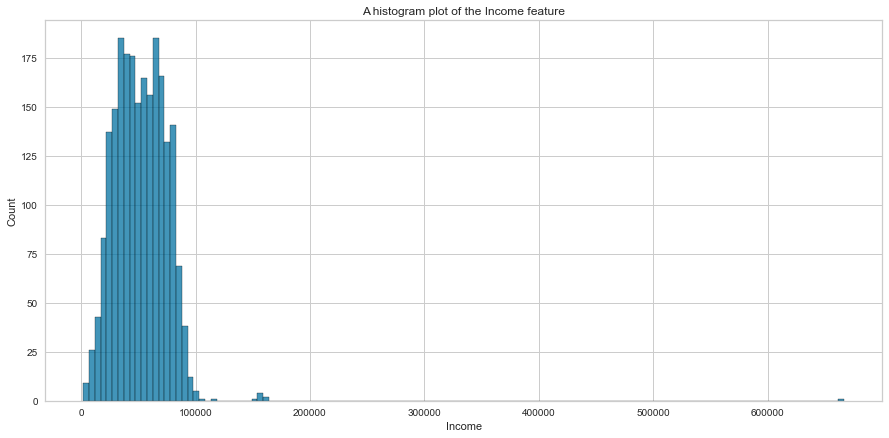

In [18]:
# Create histogram for the Income feature
plt.figure(figsize=(15, 7))
sns.histplot(x= data['Income'], data=data)
plt.title('A histogram plot of the Income feature')
plt.show()

**We could observe some extreme value on the right side of the distribution of the 'Income' feature. Let's use a box plot as it is more suitable to identify extreme values in the data.**

<AxesSubplot:xlabel='Income'>

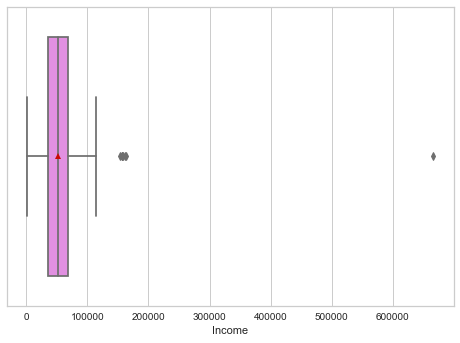

In [19]:
# Plot the boxplot
sns.boxplot(data=data, x=data['Income'], showmeans=True, color="violet")

**Observations and Insights:**
- It's observed that the income column has outliers.
- it's observed that the distribution of both graphs is right skewed. 
- from both the box plot and the histogram, it's observed that less than 10 customers earn more than USD 600000 per year 
- It's also observed, from both plots, that less 25 customers earn more than USD 100000 per year 

**Think About It**

- The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?

In [20]:
# Calculating the upper whisker for the Income variable

Q1 = data.quantile(q=0.25)                          # Finding the first quartile

Q3 = data.quantile(q=0.75)                         # Finding the third quartile

IQR = Q3 - Q1                                     # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR)['Income']          # Calculating the Upper Whisker for the Income variable

print(upper_whisker)                                # Printing Upper Whisker

118350.5


In [21]:
# Let's check the observations with extreme value for the Income variable
data[data.Income > upper_whisker]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
164   01-03-2014       98        20          2             1582   
617   03-06-2013       31        85          1               16   
655   07-02-2014       81         1          1                1   
687   04-08-2012       21        55         16             1622   
1300  04-06-2013       37        39          1                9   
1653  29-04-2013       13         1          0             1725   
2132  29-08-2013       85         2          1                2   
2233  02-06-2013       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
164                 1                 2             1                 15   
617                 2                 1             2                  0   
655                 1                 1             1                  0   
687                17                 3             4                 15   
1300                2                 0             8                  0   
1653                2                 1             1                  0   
2132                1                 1             1                  0   
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
164                 0                   22                  0   
617                 0                    0                  1   
655                 0                    0                  0   
687                 0                   28                  1   
1300                1                    0                  1   
1653                0                   28                  0   
2132                0                    0                  0   
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
164                   0             0             0             0   
617                   1             0             0             0   
655                   0             0             0             0   
687                   0             0             0             0   
1300                  1             0             0             0   
1653                  1             0             0             0   
2132                  0             0             0             0   
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0         0         0  
617              0             0         0         0  
655              0             0         0         0  
687              0             0         0         0  
1300             0             0         0         0  
1653             0             0         0         0  
2132             0             0         0         0  
2233             0             0         0         0

**Think About It:**

- We observed that there are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? Do we know at what percentile the upper whisker lies? 

In [22]:
# Check the 99.5% percentile value for the Income variable
data.quantile(q=0.995)['Income']

102145.75000000003

#### **Observations and Insights:**
- 99.5% of the customers make less than ~USD 102145 meaning that 0.5% of the customers earn more than ~USD 102145 
- From the upper whisker table, It's observed that 8 customers are outliers of the income feature.
- It is also observed that the customers that are outliers have atmost 2 children in the home and most of them have PhD's and their marital status is either together or married with one that's divorced. 

In [23]:
# Dropping observations identified as outliers 
data.drop(index=[164, 617, 655, 687, 1300, 1653, 2132, 2233], inplace=True)# Pass the indices of the observations (separated by a comma) to drop them

**Now, let's check the distribution of the Income variable after dropping outliers.**

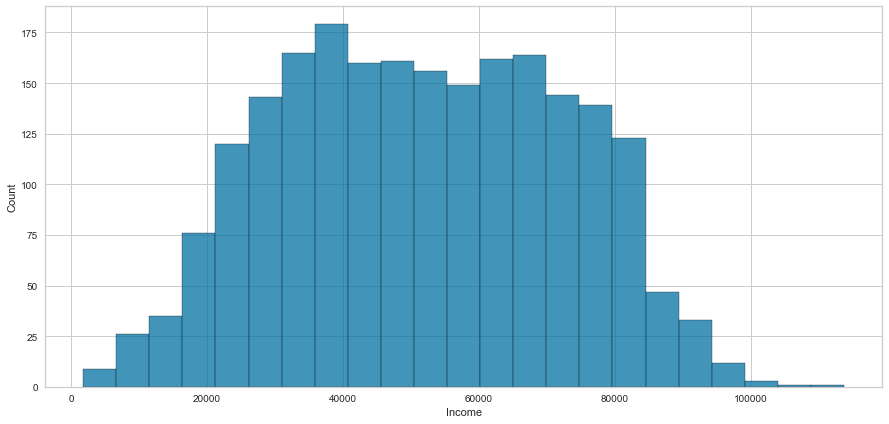

In [24]:
# Plotting a histogram of 'Income'
plt.figure(figsize=(15, 7))
sns.histplot(x= data['Income'], data=data)
plt.show()

#### **Note:** Trying to plott histograms for different numerical features and understand how the data looks like.

In [25]:
#getting the columns with numeric data and appending them to list
df_numeric = data.select_dtypes(include=np.number).columns.tolist() 
print(df_numeric)

['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


A histogram plot of Year_Birth


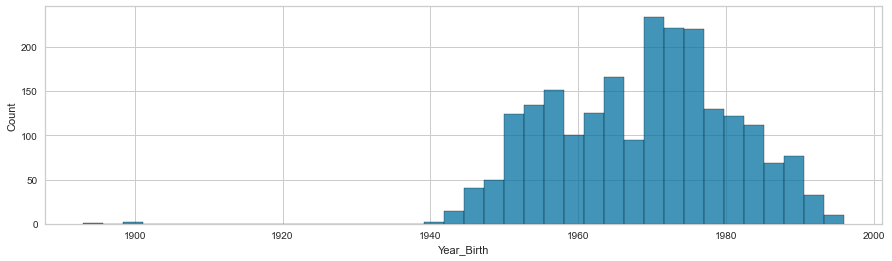

A histogram plot of Income


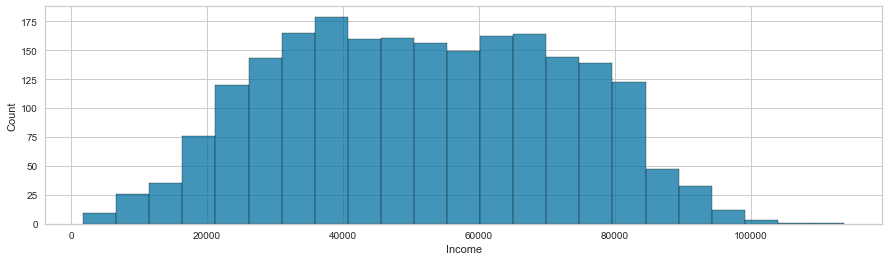

A histogram plot of Kidhome


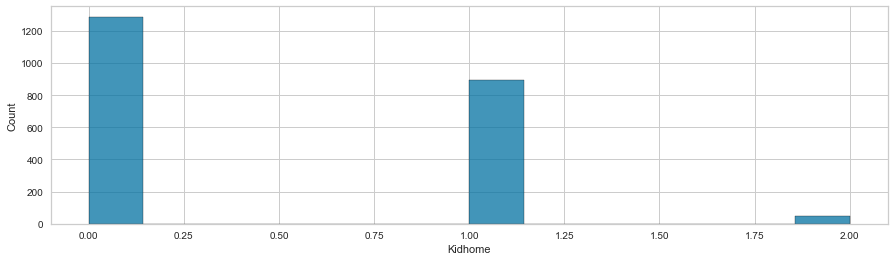

A histogram plot of Teenhome


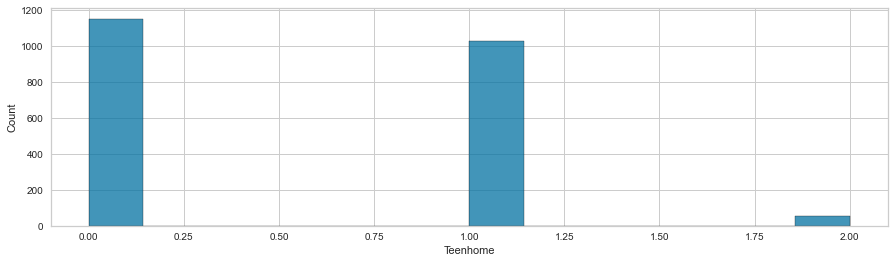

A histogram plot of Recency


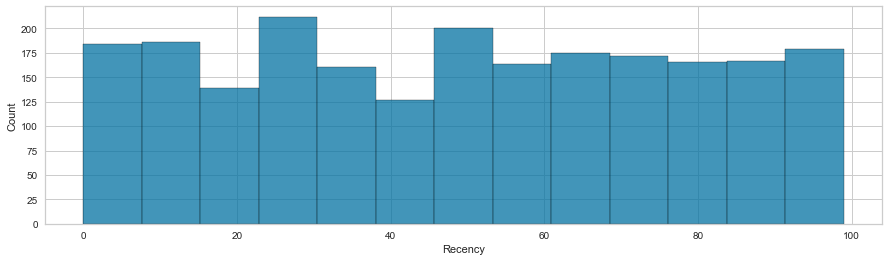

A histogram plot of MntWines


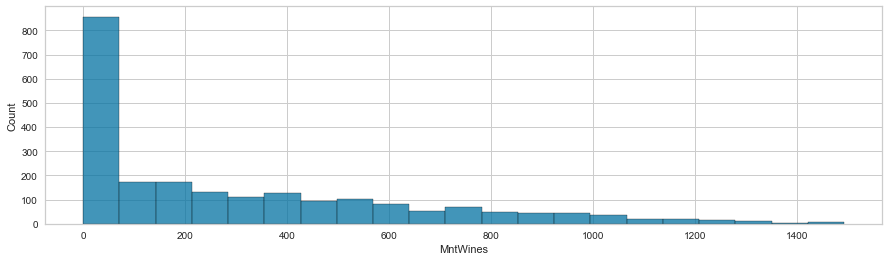

A histogram plot of MntFruits


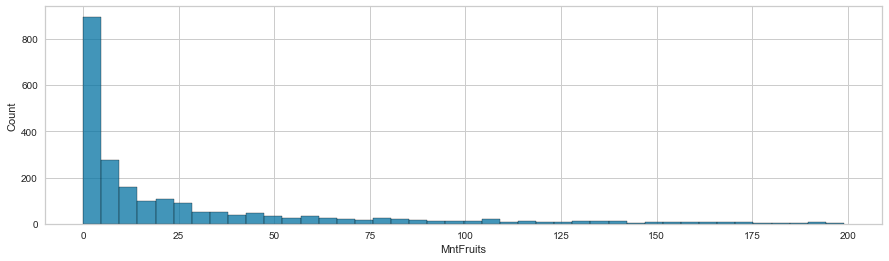

A histogram plot of MntMeatProducts


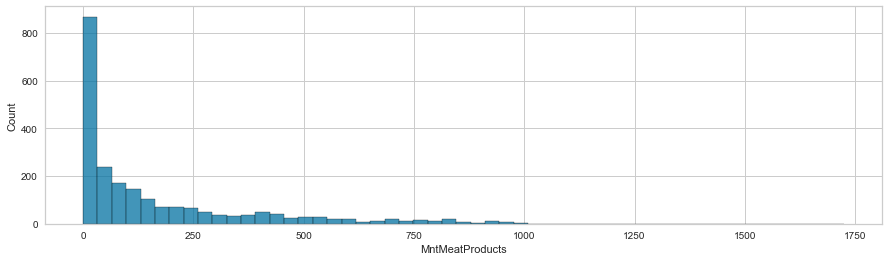

A histogram plot of MntFishProducts


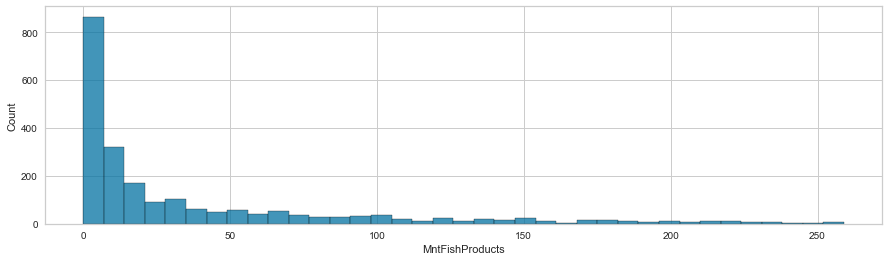

A histogram plot of MntSweetProducts


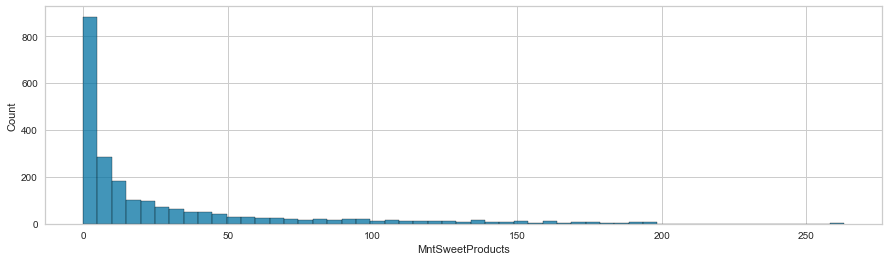

A histogram plot of MntGoldProds


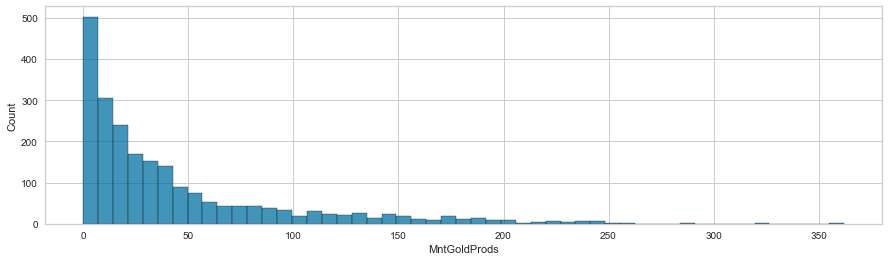

A histogram plot of NumDealsPurchases


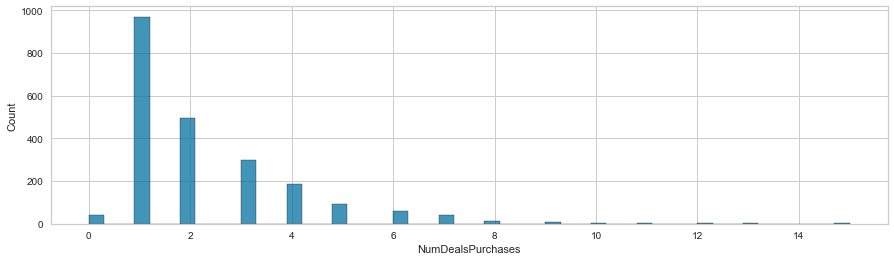

A histogram plot of NumWebPurchases


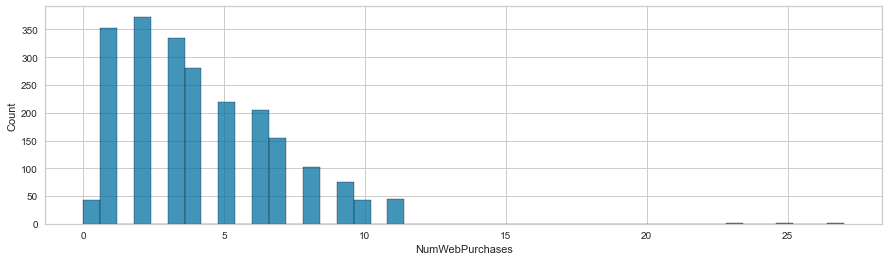

A histogram plot of NumCatalogPurchases


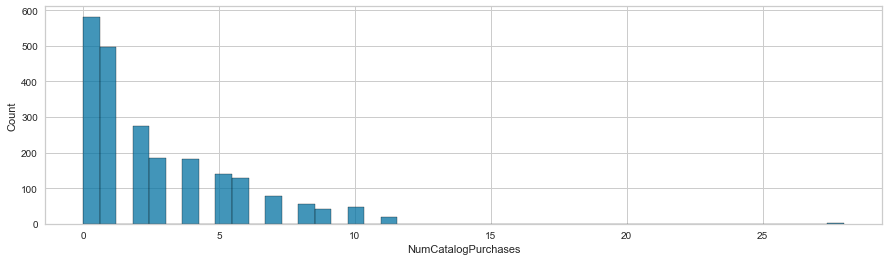

A histogram plot of NumStorePurchases


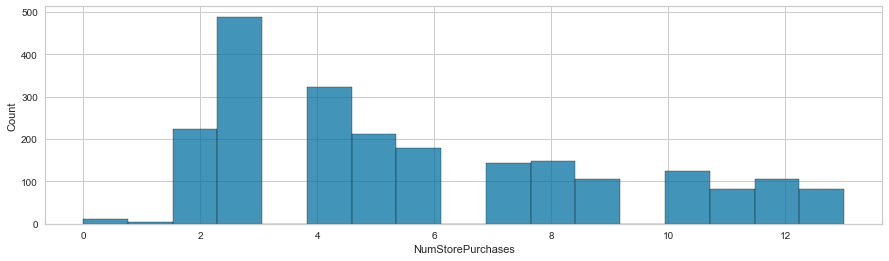

A histogram plot of NumWebVisitsMonth


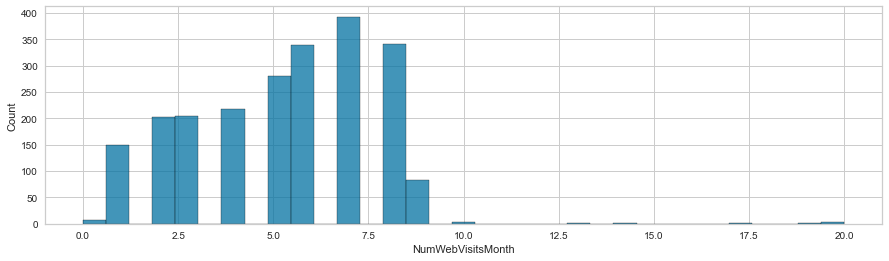

A histogram plot of AcceptedCmp3


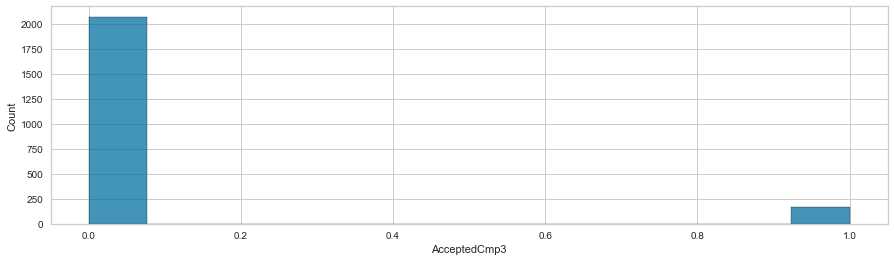

A histogram plot of AcceptedCmp4


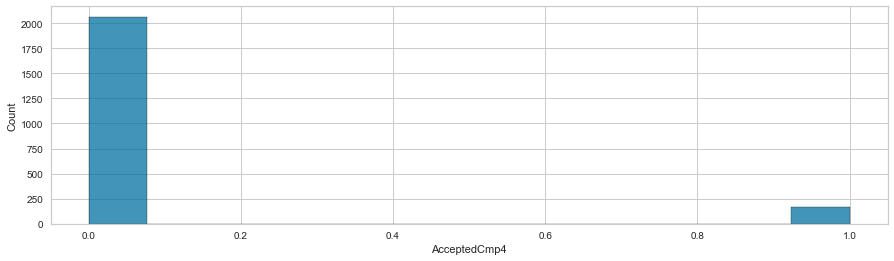

A histogram plot of AcceptedCmp5


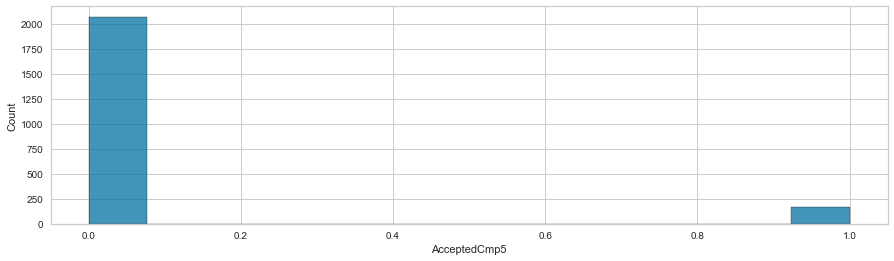

A histogram plot of AcceptedCmp1


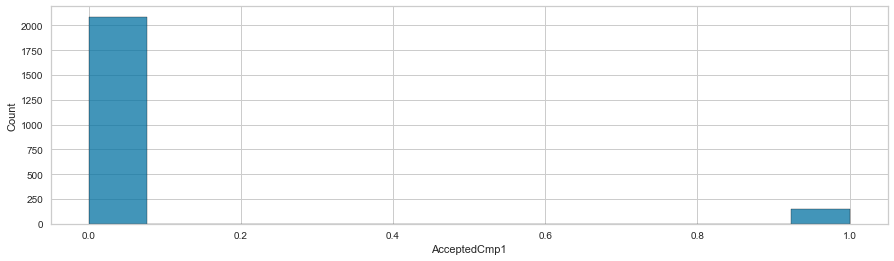

A histogram plot of AcceptedCmp2


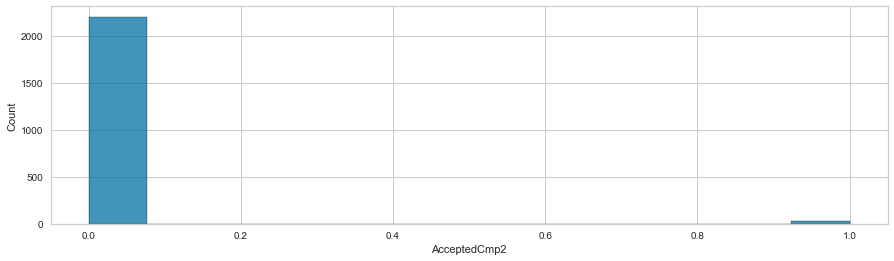

A histogram plot of Complain


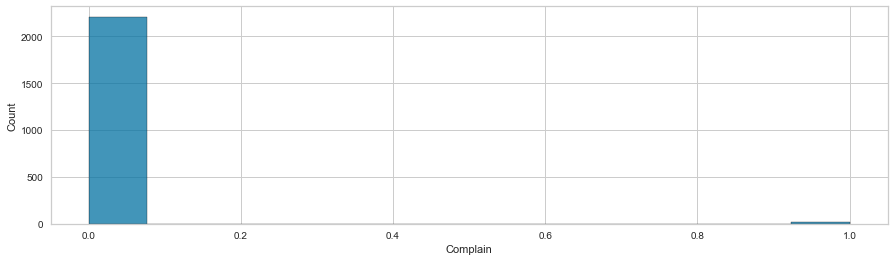

A histogram plot of Response


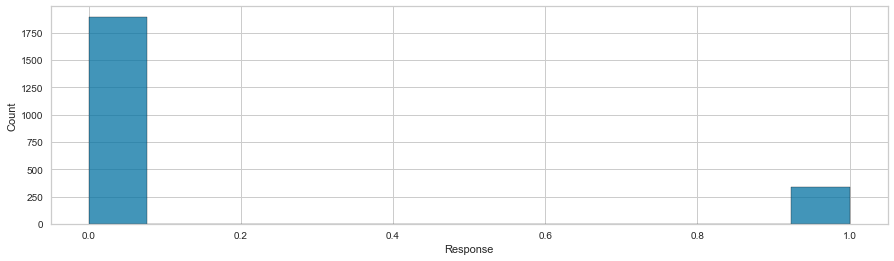

In [26]:
#plotting a histogram plot of all numeric features in the data. 
for col in df_numeric:
    print('A histogram plot of',col)
    plt.figure(figsize = (15, 4))
    sns.histplot(x = data[col])
    plt.show()

####  **Observations and Insights for all the plots:**
- From the graph of the birth year of the customers, it’s observed that the distribution is left skewed with less than 50 customers born before 1940 and more than 200 customers born around 1970. 

- From the Income graph, it’s observed that more than 175 customers earn around USD 40,000 per year

- From the Kidhome graph, it’s observed that more than 1200 homes in the data set  have no small children with more than 800 having one small child and less than 200 having 2 small children. The distribution of this graph is right skewed. 

- From the teenhome graph, it’s observed that more than 1000  homes in the data set have at least  1 teenager  with less 200 homes having 2 teenagers. The distribution of the graph is right skewed 

- From the plot of recency, it’s observed that more than 200 customers spent approximately 25 days since the previous purchase. The distribution of the graph is uniform 

- It’s observed from the MntWines plot, MntFruits plot, MntMeatProducts plot, MntFishProducts plot, and MntSweetProducts plot, it’s observed that more than 800 customers spent  nothing (0 dollars) on wine, fruits, meat, fish and sweet products respectively. It’s also observed that these graphs are right skewed. 

- From the MntGoldProds plot, Slightly more than 500 customers spent nothing on gold products. The distribution of the graph is also right skewed. 

- It’s observed that the  NumDealsPurchases graph, NumWebPurchases graph,  NumCatalogPurchases graph,  NumStorePurchases graph are right skewed. 

- From the NumDealsPurchases graph, it’s observed that more than 800 customers made 1 purchase with a discount. 

- From the NumWebPurchases graph, it’s observed that less than 250 customers  made 5 purchases on the company’s website. 

- From the NumCatalogPurchases graph, it’s observed that more than 500 customers made no purchases using a catalog

- From  the NumStorePurchases graph, it’s observed that more than 200 customers made 2 purchases directly from the store. 

- It’s observed that more than 2000 customers, accepted the offer in the first campaign, the second , the third, the fourth, and the fifth campaign with less than 250 customers declining the named offers. 

- More than 1750 customers accepted the last offer 
- More than 2000 customers have never complained in the last 2 years. 

## **2. Univariate analysis - Categorical Data**

Let us write a function that will help us create bar plots that indicate the percentage for each category. This function takes the categorical column as the input and returns the bar plot for the variable.

In [27]:
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])                                          # Length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # Width of the plot
        y = p.get_y() + p.get_height()                            # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                # Annotate the percentage 
    
    plt.show()                                                    # Show the plot

#### Let us plot barplot for the variable Marital_Status.

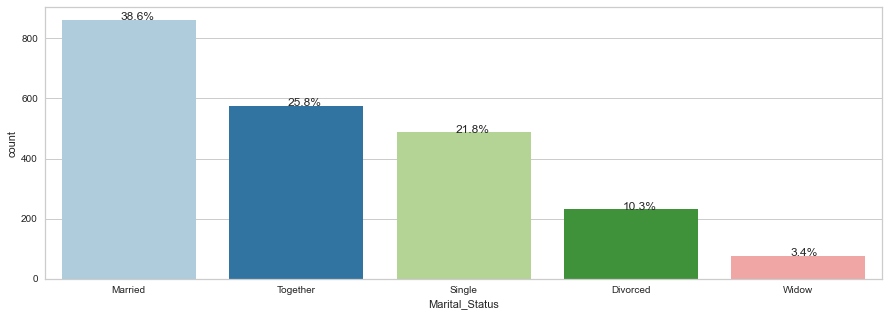

In [28]:
# Bar plot for 'Marital_Status'
perc_on_bar('Marital_Status')

####  Exploring for other categorical variables like Education, Kidhome, Teenhome, Complain.

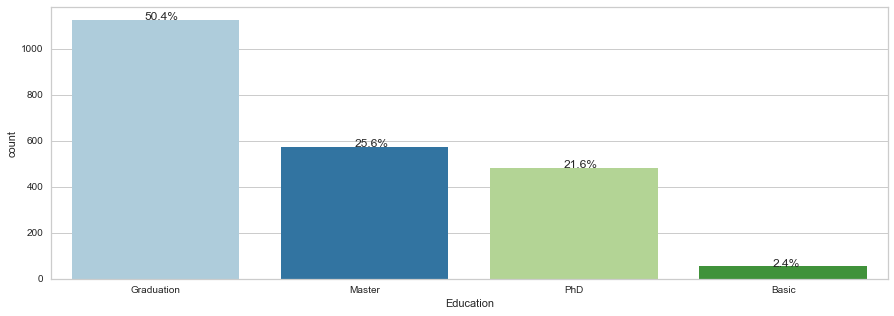

In [29]:
# Bar plot for 'Education'
perc_on_bar('Education')

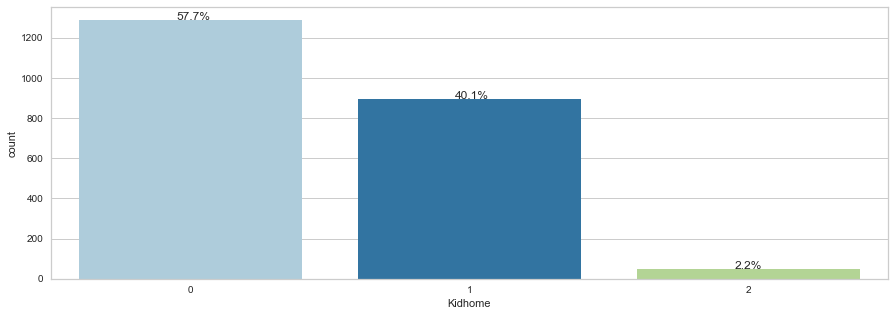

In [30]:
# Bar plot for 'Kidhome'
perc_on_bar('Kidhome')

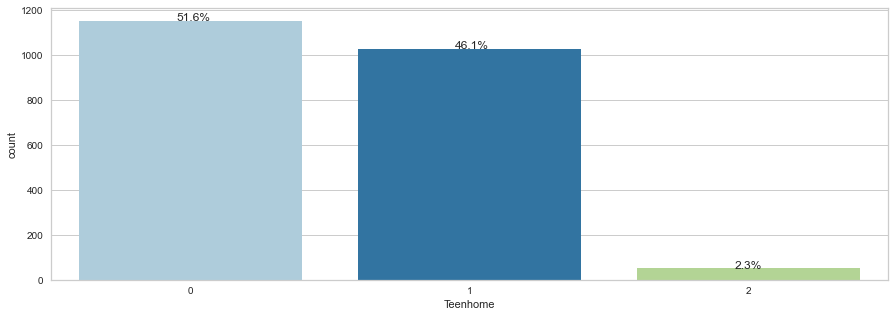

In [31]:
# Bar plot for 'Teenhome'
perc_on_bar('Teenhome')

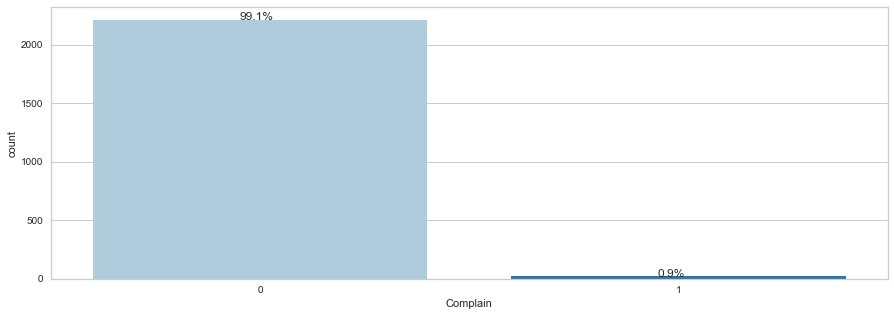

In [32]:
# Bar plot for 'Complain'
perc_on_bar('Complain')

#### **Observations and Insights from all plots:**
- 38.6% of the customers are married and 25.8% of the customers are together. This means that 64.4% of the customers are in a relationship hence more than half of the customers are in a relatioship. The widows cover the least proportion of the customers in the data set (3.4%). 
- slightly more than 50%(50.4%) of the customers have graduated. 25.6% have earned their masters degree and 21.6% have PhD's. 2.4% have neither of the 3 degrees. 
- 51.6% of homes have no teenage children and this covers majority of the group. 46.1% have one teenage child and the remaining 2.3% have 2 teenage children
- 57.1% of homes have no small children and this covers majority of the group. 40.1% have one small child and the remaining 2.2% have 2 small children
- majority of the customers (99.1%) never complained in the past 2 years while the remaining 0.9% did. Seems like the customers liked the product. 

## **Bivariate Analysis**

We have analyzed different categorical and numerical variables. Now, let's check how different variables are related to each other.

### **Correlation Heat map**
Heat map can show a 2D correlation matrix between numerical features.

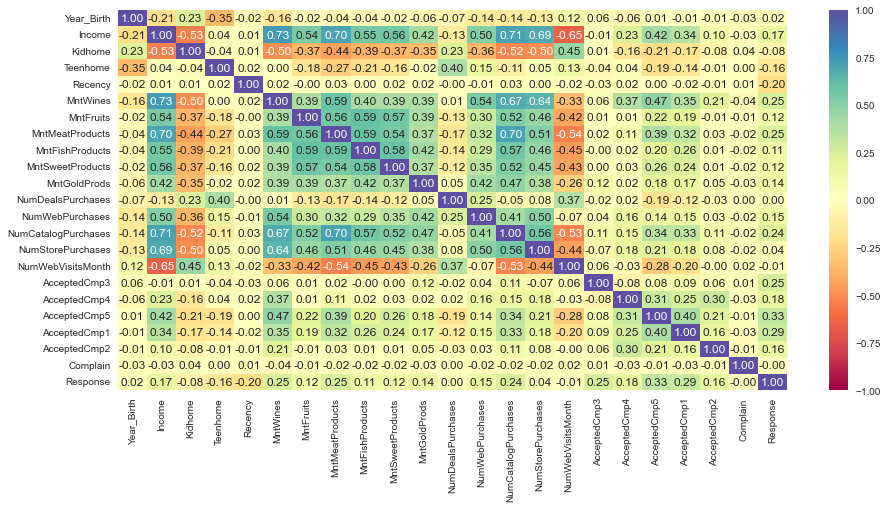

In [33]:
plt.figure(figsize=(15, 7))                                                        # Setting the plot size
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Plotting the correlation plot
plt.show()

#### **Observations and Insights:**
- it's observed that majority of the correlation are zero or close to zero
- It's observed that year_birth is negatively corrrelated with income. This makes sense since the higher the birth year, the lower the age and hence the lower the income since one has spent less time in the field earning income. 
- year_birth is positively correlated with kidhome. This makes sense since as one gets older, the more children they are likely to have since they would have enough income to take care of them.
- MntWines, MntFruits, MntMeatProducts, MntSweetProducts, MntFishProducts and MntGoldProducts have a positive correlation with income. This makes sense because the more income one has, the higher their purchasing power and the more likely they are to purchase the above products. The same concept would apply to NumWebPurchases, NumstorePurchases, NumCatalogPurchases
- Kidhome has a negative correlation with income. This makes sense because the more children one has the less income they will ahve since it will be mostly spent on the children nd also because it reduces the amount of time one spends at work in terms of maternal leave which reduces the amount of income earned. 
- MntWines, MntFruits, MntMeatProducts, MntSweetProducts, MntFishProducts and MntGoldProducts have a positive correlation with kidhome and Teenhome. This makes sense because it reduces the mmore the children at home, the less the income hence the lower the purchasing power of the customers. 


**The above correlation heatmap only shows the relationship between numerical variables. Let's check the relationship of numerical variables with categorical variables.**

### **Education Vs Income**

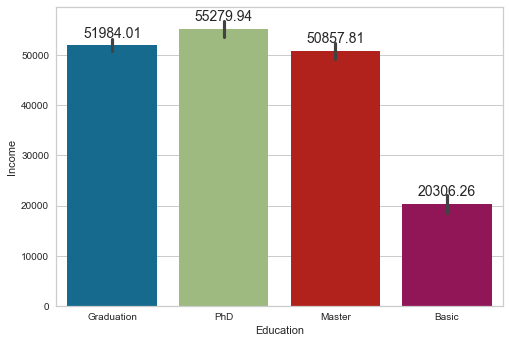

In [34]:
az = sns.barplot(x= data['Education'], y=data['Income'], data=data)

#iterating over the bars 
for bar in az.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    az.annotate(format(bar.get_height(), '.2f'), 
                (bar.get_x() + bar.get_width()/2, 
                 bar.get_height()), ha = 'center', va = 'center', 
                size = 14, xytext = (0,12),
                textcoords = 'offset points')
plt.show()

#### **Observations and Insights:**
- it's observed that the customers with PhD's earn the most income. This makes sense since they have more knowledge about the field they studied. 
- PhD customers are closely followed by those who graduated and then those who attained a masters degree and lastly followed by those with basic 
- Those who graduated are seen to have mmore income than those with masters. This might be because those who have graduated have more field experience than those with masters. 

### **Marital Status Vs Income**

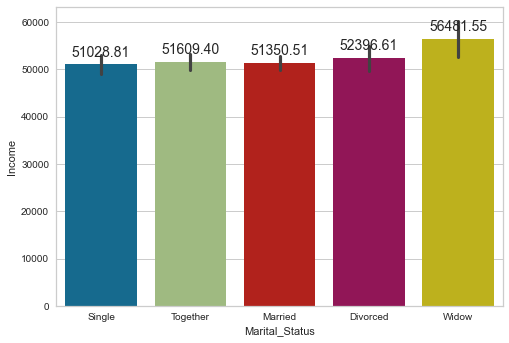

In [35]:
# Plotting the bar plot for Marital_Status and Income
az = sns.barplot(x= data['Marital_Status'], y=data['Income'], data=data)

#iterating over the bars 
for bar in az.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    az.annotate(format(bar.get_height(), '.2f'), 
                (bar.get_x() + bar.get_width()/2, 
                 bar.get_height()), ha = 'center', va = 'center', 
                size = 14, xytext = (0,12),
                textcoords = 'offset points')
plt.show()

#### **Observations and Insights:**
- it' observed that widows have the most income. it could be that they inherited assets and/or income from their partners who passed on. 
- The widows are closely followed by those who are divorced, then followed by the ones together, then the married follow and lastly the married are followed by the singles. 

### **Kidhome Vs Income**

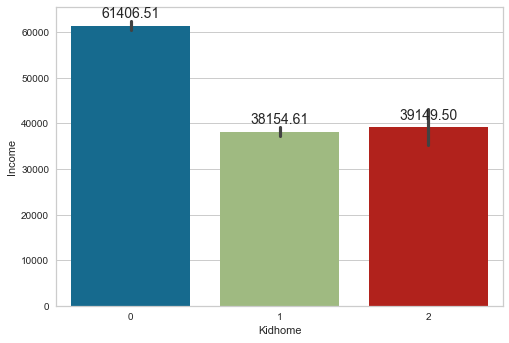

In [36]:
# Plotting the bar plot for Kidhome and Income
az = sns.barplot(x= data['Kidhome'], y=data['Income'], data=data)

#iterating over the bars 
for bar in az.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    az.annotate(format(bar.get_height(), '.2f'), 
                (bar.get_x() + bar.get_width()/2, 
                 bar.get_height()), ha = 'center', va = 'center', 
                size = 14, xytext = (0,12),
                textcoords = 'offset points')
plt.show()

#### **Observations and Insights:**
- Customers who have no children have the most income. This could be because they do not take time off to take care of children hence put more work hours and hence earn more. 
- Customers with no children are followed by those with 2 children and finally those with 1 child which is interesting since one would assume that those with 2 would have less income than those with 1. It seems like the families with 2 children have parents who have PhD's hence explaining why they have more income than those who have 1 child

**We can also visualize the relationship between two categorical variables.**

### **Marital_Status Vs Kidhome**

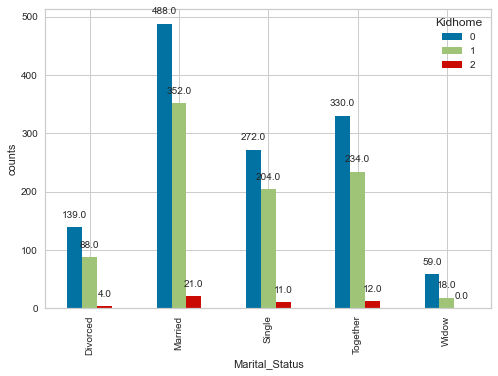

In [37]:
# Plot the bar plot for Marital_Status and Kidhome
az = pd.crosstab(data['Marital_Status'],data['Kidhome']).plot(kind='bar',stacked=False)

#iterating over the bars 
for bar in az.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    az.annotate(format(bar.get_height(), '.1f'), 
                (bar.get_x() + bar.get_width()/2, 
                 bar.get_height()), ha = 'center', va = 'center', 
                size = 10, xytext = (0,12),
                textcoords = 'offset points')
    plt.ylabel('counts')
plt.show()

#### **Observations and Insights:**
- it's observed that those who are 488 of the married customers have 0 small children. 352 of the married customers have 1 small child and 21 marrid customers have 2 small children. 
- Majority of the observations are from the married customers and the least of the observations are from the widows. 
- None of the widows in the data set has 2 small children. 
- All the catergories in Marital status have the most do not have small children. 

## **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Creating new columns
- Imputing missing values

**Think About It:**

- The Year_Birth column in the current format might not be very useful in our analysis. The Year_Birth column contains the information about Day, Month, and year. Can we extract the age of each customer?
- Are there other columns which can be used to create new features?

### **Age** 

In [38]:
# Extract only the year from the Year_Birth variable and subtracting it from 2016 will give us the age of the customer at the time of data collection in 2016

data["Age"] = 2016 - pd.to_datetime(arg = data['Year_Birth'], format="%Y").apply(lambda x: x.year) 

# Sorting the values in ascending order 
data["Age"].sort_values()                                         

1170     20
46       20
696      21
747      21
1850     21
       ... 
424      75
1950     76
192     116
339     117
239     123
Name: Age, Length: 2232, dtype: int64

#### **Observations and Insights:**
- The minimum age in the data set is 20 years old and the maximum is 123 years old. 

**Think About It:**

- We could observe from the above output that there are customers with an age greater than 115. Can this be true or a data anomaly? Can we drop these observations?

In [39]:
# Dropping the observations with age > 115
Age_greater_than_115 = data[data['Age'] > 115].index
data.drop(Age_greater_than_115, inplace = True)

**Now, let's check the distribution of age in the data.**

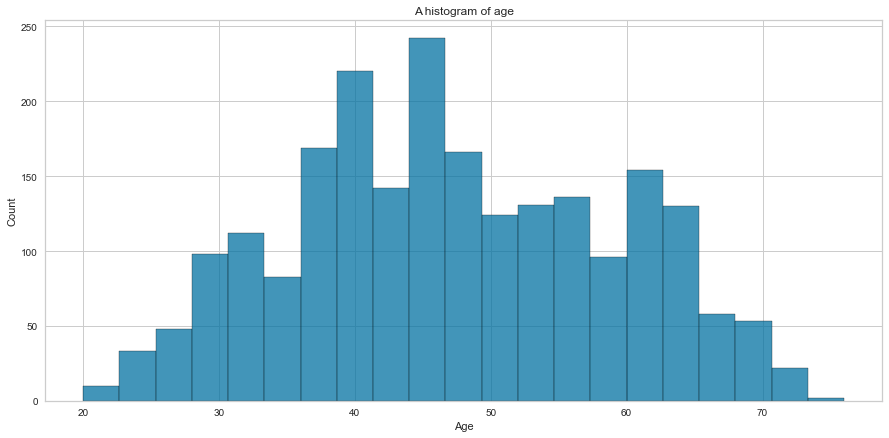

In [40]:
# Plotting histogram to check the distribution of age
plt.figure(figsize=(15, 7))
sns.histplot(x='Age', data=data)
plt.title('A histogram of age')
plt.show()

#### **Observations and Insights:**
- The distribution from the above graph is normal with more than 200 customers about the age of 45

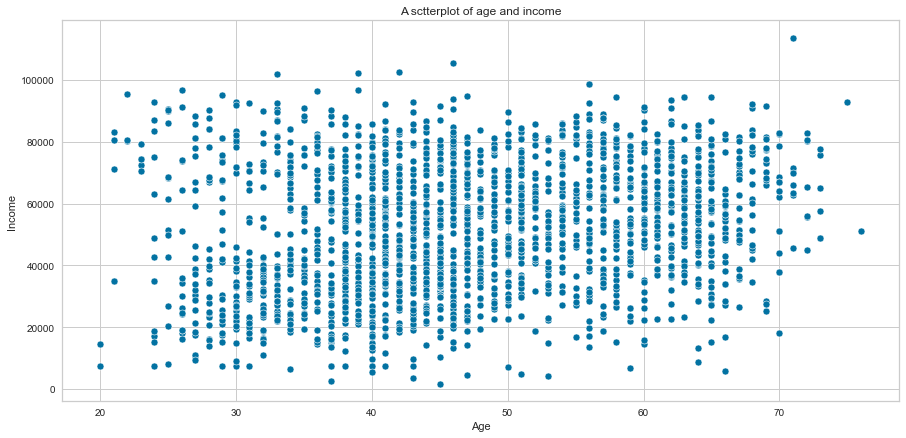

In [41]:
#checking the relationship between income and age
#scatter plot of age and income
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Age', y = 'Income',data=data)
plt.title('A sctterplot of age and income')
plt.show()

**Observations**
- There is no correlation between age and income and hence no relationship

### **Kids** 
* Let's create feature "Kids" indicating the total kids and teens in the home.

In [42]:
# Adding Kidhome and Teenhome variables to create the new feature called "Kids"
data["Kids"] = data['Kidhome'] + data['Teenhome']

### **Family Size**
* Let's create a new variable called 'Family Size' to find out how many members each family has.
* For this, we need to have a look at the Marital_Status variable, and see what are the categories.

In [43]:
# Checking the unique categories in Marial_Status
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

* We can combine the sub-categories Single, Divorced, Widow as "Single" and we can combine the sub-categories Married and Together as "Relationship" 
* Then we can create a new variable called "Status" and assign values 1 and 2 to categories Single and Relationship, respectively.
* Then, we can use the Kids (calculated above) and the Status column to find the family size.

In [44]:
data['Marital_Status'].replace(to_replace = ['Married', 'Together'], value = 'Relationship', inplace = True) 

In [45]:
data['Marital_Status'].replace(to_replace = ['Single', 'Divorced', 'Widow'], value = 'Single', inplace = True) 

In [46]:
# Create a new feature called "Status" by replacing "Single" with 1 and "Relationship" with 2 in Marital_Status
data["Status"] = data['Marital_Status'].replace({'Single': 1, 'Relationship': 2}) 

In [47]:
# Add two variables Status and Kids to get the total number of persons in each family
data["Family_Size"] = data['Status'] + data['Kids']

### **Expenses** 
* Let's create a new feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [48]:
# Create a new feature
# Add the amount spent on each of product 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
data["Expenses"] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] +  data['MntSweetProducts'] +  data['MntGoldProds']

### **Total Purchases**
* Let's create a new feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [49]:
# Create a new feature
# Add the number of purchases from each channel 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
data["NumTotalPurchases"] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] 

### **Engaged in Days**
* Let's create a new feature called "Engaged in days", indicating how long the customer has been with the company.

In [50]:
# Converting Dt_customer variable to Python date time object
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"]) 

**Let's check the max and min of the date.**

In [51]:
# Checking the minimum of the date
data["Dt_Customer"].min()

Timestamp('2012-01-08 00:00:00')

In [52]:
# Check the maximum of the date
data["Dt_Customer"].max()

Timestamp('2014-12-06 00:00:00')

**Think About It:**
- From the above output from the max function, we observed that the last customer enrollment date is December 6th, 2014. Can we extract the number of days a customer has been with the company using some date as the threshold? Can January 1st, 2015 be that threshold?

In [53]:
# Assigning date to the day variable
data["day"] = "01-01-2015"                         

# Converting the variable day to Python datetime object
data["day"] = pd.to_datetime(data.day)              

In [54]:
data["Engaged_in_days"] = (data["day"] - data["Dt_Customer"]).dt.days     

### **TotalAcceptedCmp**
* Let's create a new feature called "TotalAcceptedCmp" that shows how many offers customers have accepted.

In [55]:
# Add all the campaign related variables to get the total number of accepted campaigns by a customer
# "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"
data["TotalAcceptedCmp"] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4']+ data['AcceptedCmp5'] + data['Response']

### **AmountPerPurchase**
* Let's create a new feature called "AmountPerPurchase" indicating the amount spent per purchase.

In [56]:
# Divide the "Expenses" by "NumTotalPurchases" to create the new feature AmountPerPurchase 
data['AmountPerPurchase'] = data["Expenses"]/data["NumTotalPurchases"]

**Now, let's check the maximum value of the AmountPerPurchase.**

In [57]:
# Check the max value
data['AmountPerPurchase'].max()

inf

**Think About It:**

- Is the maximum value in the above output valid? What could be the potential reason for such output?
- How many such values are there? Can we drop such observations?

In [58]:
# Find how many observations have NumTotalPurchases equal to 0
zeroNumTotalPurchases = data["NumTotalPurchases"] ==0
zeroNumTotalPurchases.sum()

2

In [59]:
# Drop the observations with NumTotalPurchases equal to 0, using their indices
zeroNumTotalPurchasesindex = data[data["NumTotalPurchases"] ==0].index
data.drop(zeroNumTotalPurchasesindex, inplace = True)


**Now, let's check the distribution of values in AmountPerPurchase column.**

In [60]:
# Check the summary statistics of the AmountPerPurchase variable 
data['AmountPerPurchase'].describe()

count    2227.000000
mean       33.274270
std        45.040897
min         0.533333
25%         9.714286
50%        23.352941
75%        45.281773
max      1679.000000
Name: AmountPerPurchase, dtype: float64

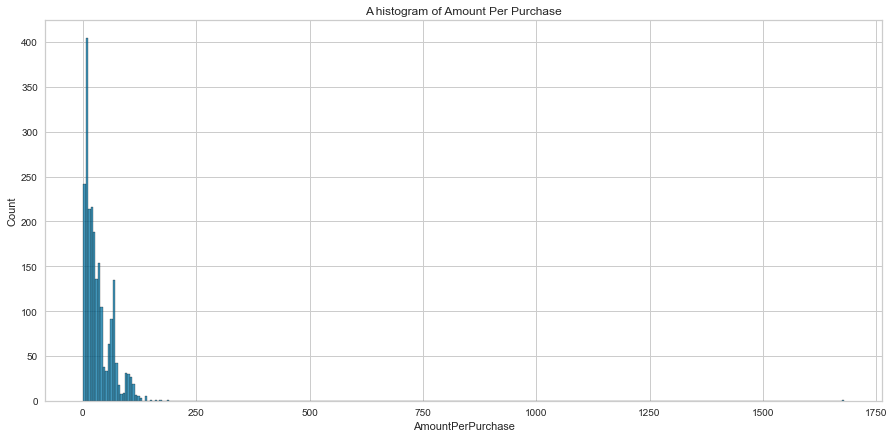

In [61]:
# Plot the histogram for the AmountPerPurchase variable
plt.figure(figsize=(15, 7))
sns.histplot(x='AmountPerPurchase', data=data)
plt.title('A histogram of Amount Per Purchase')
plt.show()

#### **Observations and Insights:**
- it's observed that the graph above is right skewed with an outlier between 1500 and 1750
- Majority of the customers spent less USD 250 on a purchase. 

### **Imputing Missing Values**

In [62]:
#finding the number of missing values
data['Income'].isna().value_counts()

False    2203
True       24
Name: Income, dtype: int64

In [63]:
# Impute the missing values for the Income variable with the median
data['Income'] = data['Income'].fillna(data['Income'].median())

**Now that we are done with data preprocessing, let's visualize new features against the new income variable we have after imputing missing values.**

### **Income Vs Expenses**

Text(0, 0.5, 'Expenses')

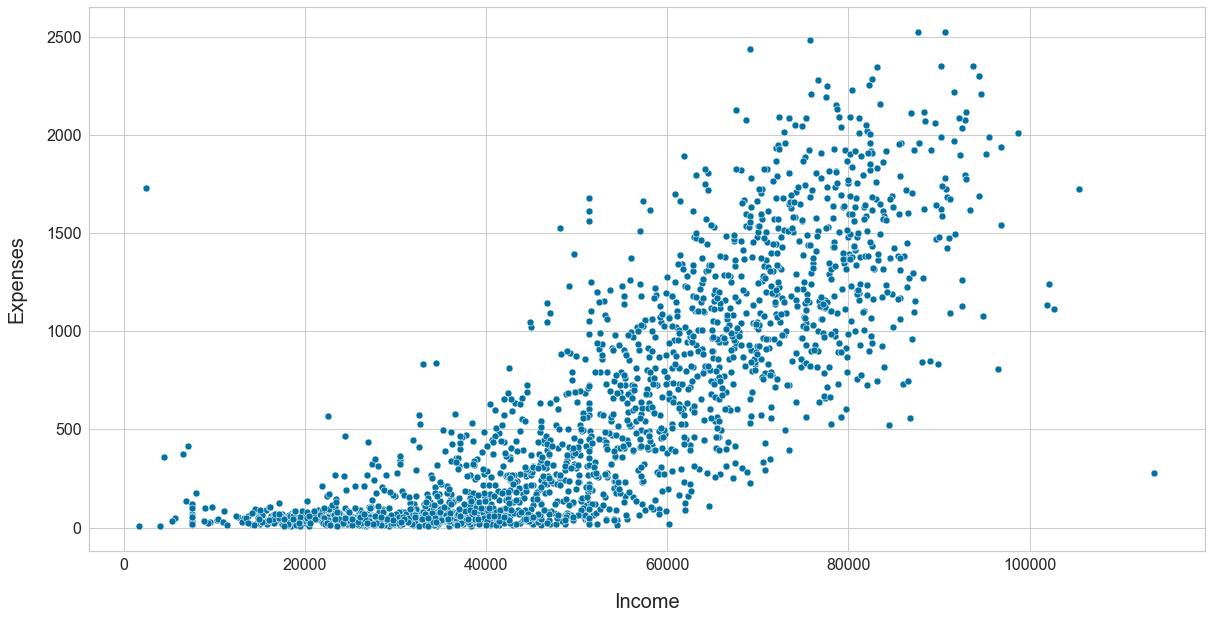

In [64]:
# Plot the scatter plot with Expenses on Y-axis and Income on X-axis  

plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(x = 'Income', y = 'Expenses', data = data)                                     # Hint: Use sns.scatterplot()  

plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label

plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Title of Y-axis

#### **Observations and Insights:**
- It's observed that expenses is positively correlated with Income. This makes sense because the more income one has, the higher their purchasing power hence the higher their expenses. 

### **Family Size Vs Income**

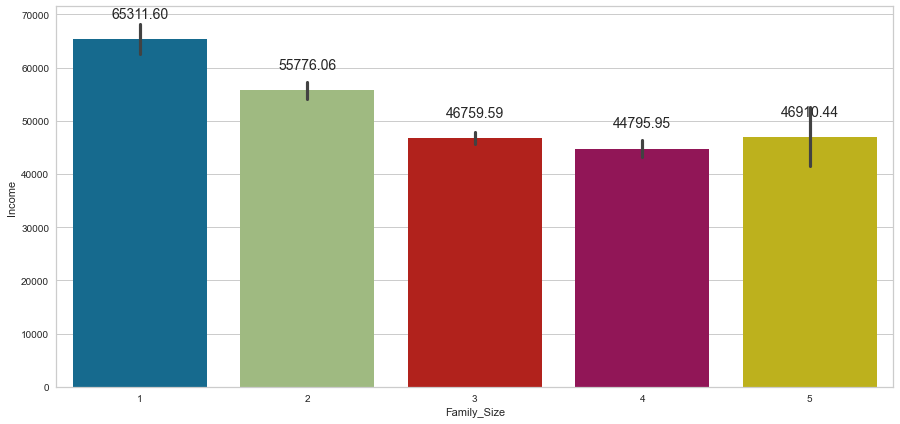

In [65]:
# Plot the bar plot for Family Size on X-axis and Income on Y-axis
plt.figure(figsize=(15, 7))
az = sns.barplot(x='Family_Size', y = 'Income', data=data)
#iterating over the bars 
for bar in az.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    az.annotate(format(bar.get_height(), '.2f'), 
                (bar.get_x() + bar.get_width()/2, 
                 bar.get_height()), ha = 'center', va = 'center', 
                size = 14, xytext = (0,25),
                textcoords = 'offset points')
plt.show()

#### **Observations and Insights:**
- It's observed that the family with one person (single) earns more income than any other family size in the graph. 
- The family size of 1 is followed by the family size of 2 (relationship or single and one child)
- it's observed that the family of five has more income than that of 4 and 3. This. might be due to both parents having PhD's and high income jobs and the children might also be working. 

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?

We will first use dimensionality reduction techniques like Principal Component Analysis (PCA) and T-distributed Stochastic Neighbor Embedding (T-SNE) which will enable us to easily understand the key variables in the data and spot outliers. We will then use clustering algorithms to effectively segment the customers into different groups based on certain similar attributes. The clustering algorithms to be used are K-Means, K-Mediods, Hierarchical Clustering, DBSCAN, Gaussian Mixture Model. 


- **Overall solution design -** What is the potential solution design?

The potential solution design is to have clusters of consumers that are more distinct from one another. 


- **Measures of success -** What are the key measures of success?

We will measure the success of a cluster by how the clustering algorithm by using the silhouette coefficient and dunn’s index. A silhouette coefficient close to 1 or higher dunn’s index (DI) means a better cluster.

**Saving the Data**

- Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

- To save the pre-processed data frame, please follow the below lines of code:

In [66]:
#getting a copy of the updated dataframe
df_cleaned = data.copy()

In [67]:
#checking the df_cleaned head
df_cleaned.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation   Relationship  71613.0        0         0   
3        1984  Graduation   Relationship  26646.0        1         0   
4        1981         PhD   Relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Age  Kids  Status  Family_Size  Expenses  NumTotalPurchases        day  \
0   59     0       1            1      1617                 25 2015-01-01   
1   62     2       1            3        27                  6 2015-01-01   
2   51     0       2            2       776                 21 2015-01-01   
3   32     1       2            3        53                  8 2015-01-01   
4   35     1       2            3       422                 19 2015-01-01   

   Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0              997                 1          64.680000  
1              151                 0           4.500000  
2              498                 0          36.952381  
3               91                 0           6.625000  
4              347                 0          22.210526

In [68]:
#converting df_cleaned into csv file and saving it as customer_segmentation_updated.csv
df_cleaned.to_csv("customer_segmentation_updated.csv", index = False)

# **Customer Segmentation**

# **Milestone 2**

**Note:** This is in continuation to the data preprocessing we did in Milestone 1. Results might differ if you have followed different steps in data preprocessing.

## Preparing Data for Segmentation

### Dropping columns that we will not use for segmentation

The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.

Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.

Here, we will use the behavioral attributes for segmentation and drop the demographic attributes like Income, Age, and Family_Size. In addition to this, we need to drop some other columns which are mentioned below.

* `Dt_Customer`: We have created the `Engaged_in_days` variable using the Dt_Customer variable. Hence, we can drop this variable as it will not help with segmentation.
* `Complain`: About 95% of the customers didn't complain and have the same value for this column. This variable will not have a major impact on segmentation. Hence, we can drop this variable. 
* `day`:  We have created the `Engaged_in_days` variable using the 'day' variable. Hence, we can drop this variable as it will not help with segmentation.
* `Status`: This column was created just to get the `Family_Size` variable that contains the information about the Status. Hence, we can drop this variable.
* We also need to drop categorical variables like `Education` and `Marital_Status`, `Kids`, `Kidhome`, and `Teenhome` as distance-based algorithms cannot use the default distance like Euclidean to find the distance between categorical and numerical variables.
* We can also drop categorical variables like `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response` for which we have create the variable `TotalAcceptedCmp` which is the aggregate of all these variables.

In [69]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [70]:

df_cleaned = pd.read_csv("customer_segmentation_updated.csv")

In [71]:
pd.options.display.max_columns = 100

In [72]:
df_cleaned.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation   Relationship  71613.0        0         0   
3        1984  Graduation   Relationship  26646.0        1         0   
4        1981         PhD   Relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Age  Kids  Status  Family_Size  Expenses  NumTotalPurchases         day  \
0   59     0       1            1      1617                 25  2015-01-01   
1   62     2       1            3        27                  6  2015-01-01   
2   51     0       2            2       776                 21  2015-01-01   
3   32     1       2            3        53                  8  2015-01-01   
4   35     1       2            3       422                 19  2015-01-01   

   Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0              997                 1          64.680000  
1              151                 0           4.500000  
2              498                 0          36.952381  
3               91                 0           6.625000  
4              347                 0          22.210526

In [73]:
# Dropping all the irrelevant columns and storing in data_model
data_model = df_cleaned.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "day",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Status",
        "Kids",
        'Education',
        'Kidhome',
        'Teenhome', 'Income','Age', 'Family_Size'
    ],
    axis=1,
)

In [74]:
# Check the shape of new data 
data_model.shape

(2227, 17)

In [75]:
# Check first five rows of new data
data_model.head()

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Expenses  \
0                   10                  4                  7      1617   
1                    1                  2                  5        27   
2                    2                 10                  4       776   
3                    0                  4                  6        53   
4                    3                  6                  5       422   

   NumTotalPurchases  Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0                 25              997                 1          64.680000  
1                  6              151                 0           4.500000  
2                 21              498                 0          36.952381  
3                  8               91                 0           6.625000  
4                 19              347                 0          22.210526

**Let's plot the correlation plot after we've removed the irrelevant variables.**

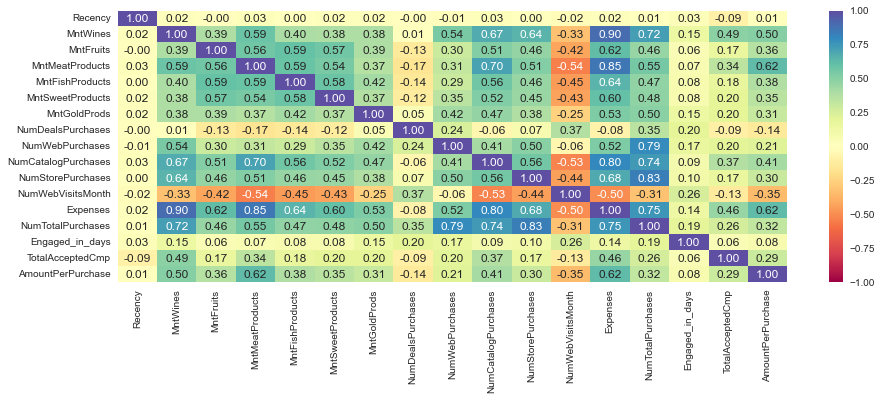

In [76]:
# Plot the correlation plot for new data
plt.figure(figsize= (15,5))
sns.heatmap(data_model.corr(), annot = True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations and Insights:**
- it's observed that majority of the variables have low correlation (positive or negative) with other variables
- its observed that the amount per purchase is positively correlated with expenses. This means that the higher the total amount per purchase, the higher the expense. 
- it's observed that Mntwines is highly positively correlated with Expenses. This means that the higher the expense, the more likey the customer bought wines. 
- Mntwines, MntFruits, MntMeatProducts, MntSweetProducts, MntFishProducts and MntGoldProducts have a positive correlation with Expenses. This makes sense because the higher the expenses, the more likely for the money to have been spent on the above products. The same concept applies for  NumWebPurchases, NumstorePurchases, NumCatalogPurchases where the higher the expenses, the more likely they were purchased on the web or store or through the mail. 
- Mntwines, MntFruits, MntMeatProducts, MntSweetProducts, MntFishProducts and MntGoldProducts have a negative correlation with numwebvisits month. This means the higher the number of web visits per month, the lower the likelyhood of a customer purchasing the mentioned products. This might be because the above products aren't sold on websites since majority of them are perishables. 
- Mntwines, MntFruits, MntMeatProducts, MntSweetProducts, MntFishProducts and MntGoldProducts have a positive correlation with one another. This means that if a customer buys one of the mentioned products, they are more likely to buy the other mentioned products. 

### Scaling the Data

**What is feature scaling?**

Feature scaling is a class of statistical techniques that, as the name implies, scales the features of our data so that they all have a similar range. You'll understand better if we look at an example:

If you have multiple independent variables like Age, Income, and Amount related variables, with their range as (18–100 Years), (25K–75K), and (100–200), respectively, feature scaling would help them all to be in the same range.

**Why feature scaling is important in Unsupervised Learning?**

Feature scaling is especially relevant in machine learning models that compute some sort of distance metric as we do in most clustering algorithms, for example, K-Means. 

So, scaling should be done to avoid the problem of one feature dominating over others because the unsupervised learning algorithm uses distance to find the similarity between data points.

**Let's scale the data**

**Standard Scaler**: StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.


1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [77]:
# Applying standard scaler on new data
scaler = StandardScaler()                                                # Initialize the Standard Scaler

df_scaled = scaler.fit_transform(data_model)                                      # fit_transform the scaler function on new data

df_scaled = pd.DataFrame(df_scaled, columns=data_model.columns)      # Converting the embeddings to a dataframe

df_scaled.head()

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.306906  0.979274   1.549793         1.735137         2.455586   
1 -0.384035 -0.873925  -0.638021        -0.726901        -0.652191   
2 -0.798600  0.358572   0.569049        -0.175222         1.340442   
3 -0.798600 -0.873925  -0.562579        -0.663070        -0.505942   
4  1.550599 -0.392806   0.418165        -0.216256         0.152175   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.471064      0.841828           0.357919         1.404892   
1         -0.633425     -0.732464          -0.169952        -1.119121   
2         -0.149634     -0.041311          -0.697824         1.404892   
3         -0.585045     -0.751662          -0.169952        -0.758548   
4         -0.004497     -0.559676           1.413662         0.323172   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Expenses  \
0             2.633008          -0.561330           0.696875  1.682349   
1            -0.586255          -1.178960          -0.135935 -0.963691   
2            -0.228559           1.291559          -0.552339  0.282777   
3            -0.943951          -0.561330           0.280470 -0.920422   
4             0.129137           0.056299          -0.135935 -0.306341   

   NumTotalPurchases  Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0           1.329371         1.975678          0.619416           0.697428  
1          -1.167064        -1.667464         -0.503906          -0.638991  
2           0.803806        -0.173173         -0.503906           0.081680  
3          -0.904281        -1.925843         -0.503906          -0.591801  
4           0.541023        -0.823427         -0.503906          -0.245693

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

<AxesSubplot:xlabel='0', ylabel='1'>

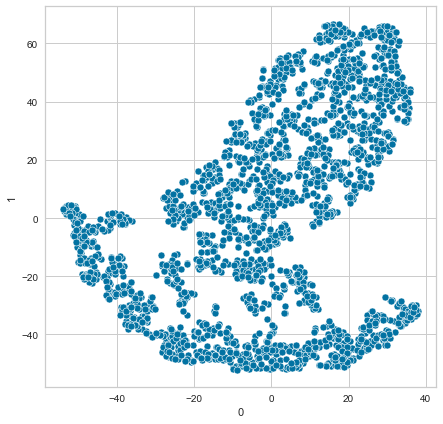

In [78]:
# Fitting T-SNE with number of components equal to 2 to visualize how data is distributed

tsne = TSNE(n_components= 2, random_state = 1, perplexity= 35)       # Initializing T-SNE with number of component equal to 2, random_state=1, and perplexity=35

data_air_pol_tsne = tsne.fit_transform(data_model)                      # fit_transform T-SNE on new data

data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne, columns=[0, 1])           # Converting the embeddings to a dataframe

plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components

sns.scatterplot(x=0, y=1, data=data_air_pol_tsne)   

**Observation and Insights:**
- The data points show that the two components are positively correlated. But other than that, there is no pattern in the data. 


### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

When the variables used in clustering are highly correlated, it causes multicollinearity, which affects the clustering method and results in poor cluster profiling (or biased toward a few variables). PCA can be used to reduce the multicollinearity between the variables. 

In [79]:
# Defining the number of principal components to generate
n = data_model.shape[1]                                        # Storing the number of variables in the data

pca = PCA(n_components = n, random_state = 1)                                      # Initialize PCA with n_components = n and random_state=1

data_pca = pd.DataFrame(pca.fit_transform(df_scaled))                      # fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_               

**Let's plot the first two components and see how the data points are distributed.**

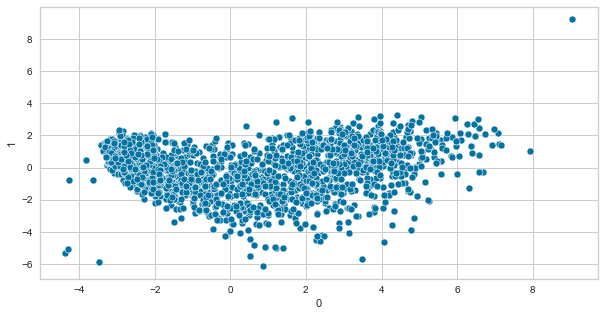

In [80]:
# Scatter plot for two components using the dataframe data_pca
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 0, y = 1, data = data_pca)
plt.show()

**Let's apply clustering algorithms on the data generated after applying PCA**

## **K-Means** 

In [81]:
distortions = []                                                  # Create an empty list

K = range(2, 10)                                                  # Setting the K range from 2 to 10

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4)              # Initialize K-Means
    kmeanModel.fit(data_pca)                                      # Fit K-Means on the data
    distortions.append(kmeanModel.inertia_)                       # Append distortion values to the empty list created above

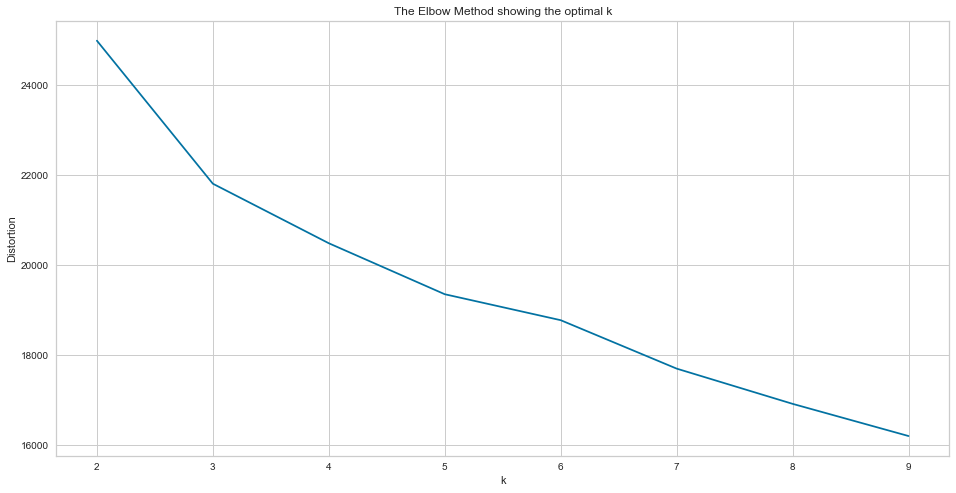

In [82]:
# Plotting the elbow plot
plt.figure(figsize=(16, 8))                                            # Setting the plot size

plt.plot(K, distortions, "bx-")                                        # Plotting the K on X-axis and distortions on y-axis

plt.xlabel("k")                                                        # Title of x-axis

plt.ylabel("Distortion")                                               # Title of y-axis

plt.title("The Elbow Method showing the optimal k")                    # Title of the plot
plt.show()

**In the above plot, the elbow is seen for K=3 and K=5 as there is some drop in distortion at K=3 and K=5.**

**Think About It:**

- How do we determine the optimal K value when the elbows are observed at 2 or more K values from the elbow curve?
- Which metric can be used to determine the final K value?

**We can use the silhouette score as a metric for different K values to make a better decision about picking the number of clusters(K).**

### **What is the silhouette score?**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the clusters are dense and well separated, which is good.
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

**Finding silhouette score for each value of K**

In [83]:
sil_score = []                                                             # Creating empty list
cluster_list = range(3, 7)                                                 # Creating a range from 3 to 7
for n_clusters in cluster_list:
    
    # Initialize K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters = n_clusters, random_state = 1 )
    
    # Fit and predict on the pca data
    preds = clusterer.fit_predict(data_pca)
    
    # Calculate silhouette score - Hint: Use silhouette_score() function
    score =   silhouette_score(data_pca, preds)
    
    # Append silhouette score to empty list created above
    sil_score.append(score)     
    
    # Print the silhouette score
    print( "For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))  

For n_clusters = 3, the silhouette score is 0.27163034118843465)
For n_clusters = 4, the silhouette score is 0.25217341541248695)
For n_clusters = 5, the silhouette score is 0.2206784421815718)
For n_clusters = 6, the silhouette score is 0.12723103531133545)


**From the above silhouette scores, 3 appears to be a good value of K. So, let's build K-Means using K=3.**

### **Applying K-Means on data_pca**

In [84]:
kmeans = KMeans(n_clusters = 3, random_state = 1 )      # Initialize the K-Means algorithm with 3 clusters and random_state=1

kmeans.fit(data_pca)                                   # Fitting on the data_pca

KMeans(n_clusters=3, random_state=1)

In [85]:
data_pca["K_means_segments_3"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

df_cleaned["K_means_segments_3"] = kmeans.labels_                     # Adding K-Means cluster labels to the whole data (df_cleaned)

data_model["K_means_segments_3"] = kmeans.labels_                  # Adding K-Means cluster labels to data_model

<AxesSubplot:>

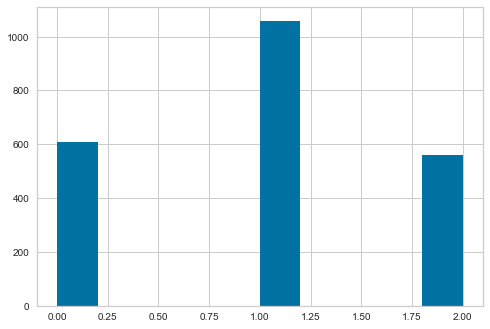

In [86]:
# Let's check the distribution
data_model["K_means_segments_3"].hist()

**Let's visualize the clusters using PCA**

In [87]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

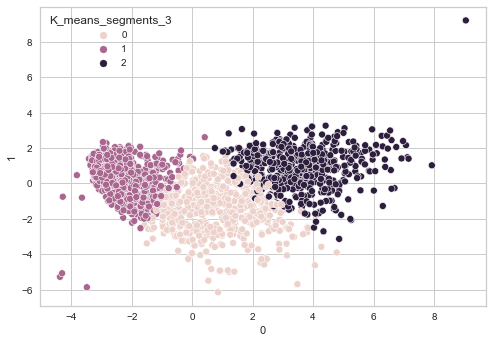

In [88]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_3")

**Observations and Insights:**
- it's observed that there are 3 clusters
- cluster 1 is observed to have more than 1000 observations
- cluster 2 is observed to have slightly above 600 observations
- cluster 3 is observed to have less than 600 observations

### **Cluster Profiling**

In [89]:
# Taking the cluster-wise mean of all the variables. Hint: First groupby 'data' by 'K_means_segments_3' and then find mean
cluster_profile_KMeans_3 = df_cleaned.groupby(by = 'K_means_segments_3').mean()

In [90]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="lightgreen", axis=0)

**Observations and Insights:**
- cluster 0 seems to belong to middle income earners. it seems to be related to customers who purchase the most products with a discount and make a lot of their purchases from the company's website. it also seems to capture customers of a higher age that the other clusters with a slightly higher status meaning that most of the customers in this cluster are married. it also seems to have the highest number of teens. This makes sense because the cluster has older customers. 
- cluster 1 seems to capture customers with a higher number of small children, web visits per month, complaints, overall kids and large family size. This cluster seems to belong to low income earners evidenced by the low income under the income column. 
- Cluster 2 seems to capture customers with a high income, high recency, higher purchase of wines, fruits, meat, fish, sweet, and gold products. it also captures customers with a high number of catalog and store purchases, a higher number of total accepted campaigns and the amount per purchase. it also captures customers with the highest expense. Cluster 2 seems to belong to high income earners. 

**Let us create a boxplot for each of the variables**

In [91]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

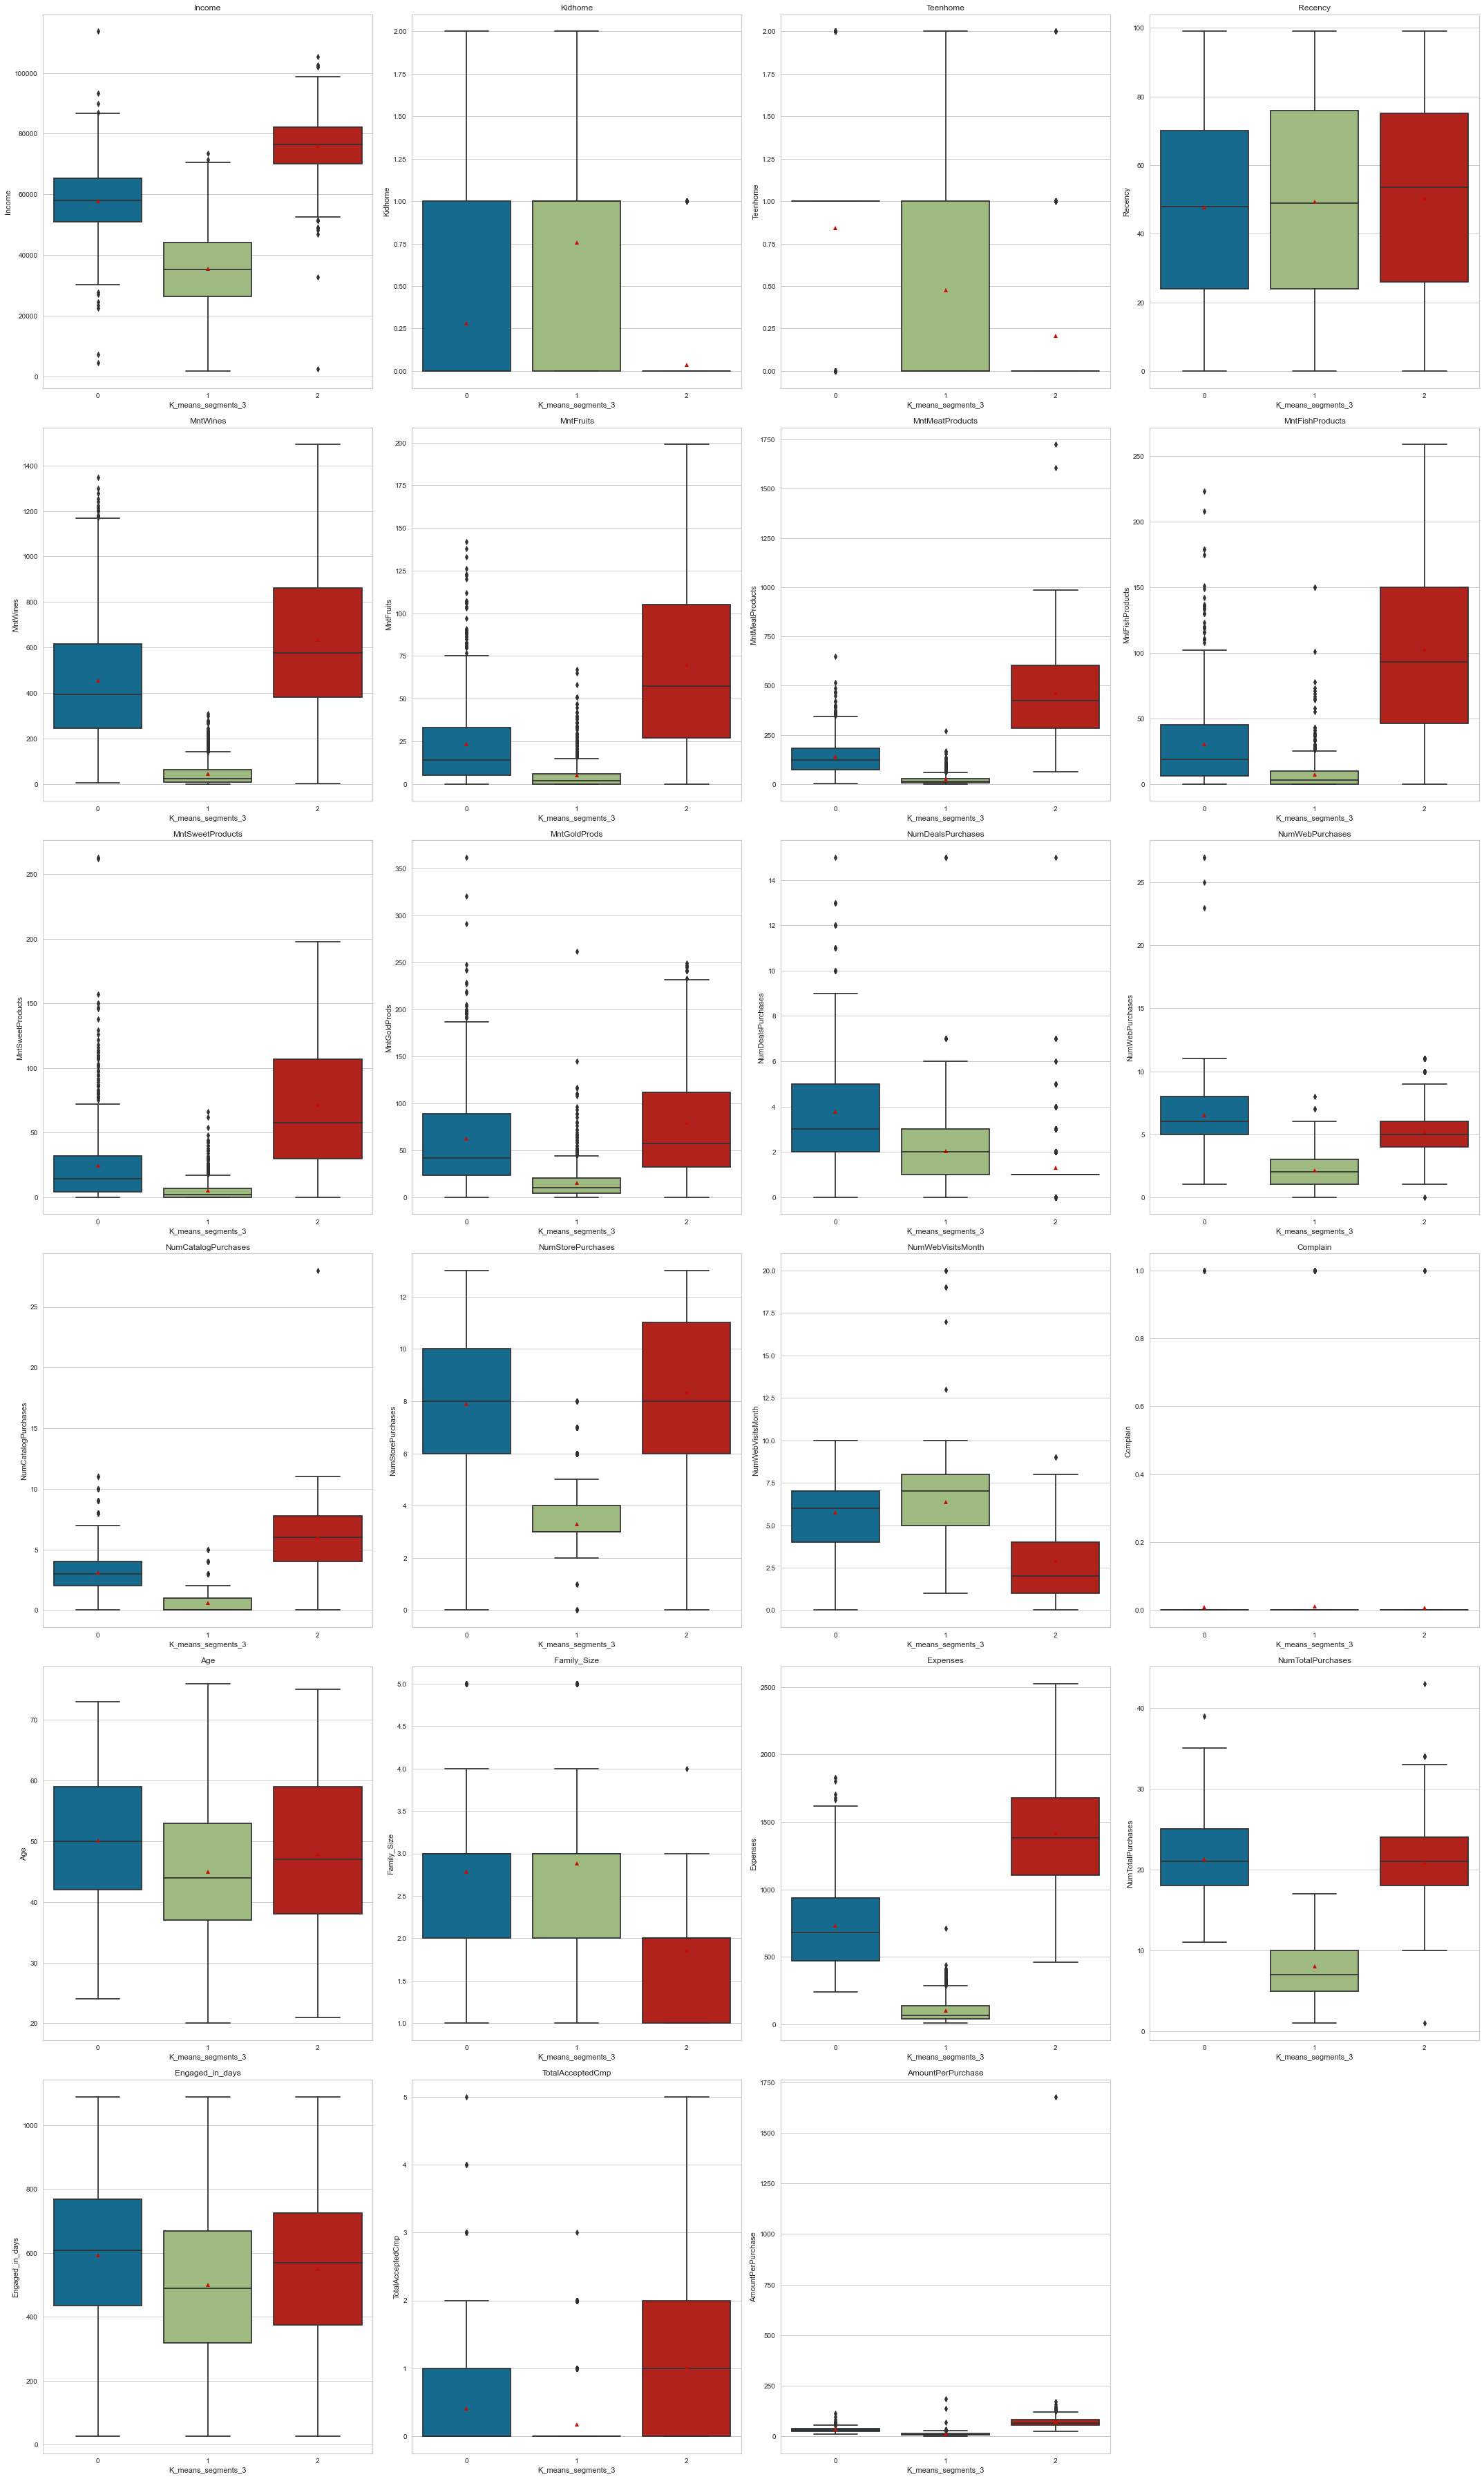

In [92]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df_cleaned[variable], x=df_cleaned['K_means_segments_3'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster:**

**Cluster 0:**
- It seems like cluster 0 has customers with a moderate income, on average has one kid. It’s also observed that customers in cluster 0 have a moderate expenditure on wines, fruits, meat, fish, sweet, and gold products. Customers in cluster 0 have the greatest number of purchases made with a discount and those made on the company website hence having the highest number of total purchases. They have a moderate number of catalog purchases, web visits per month, family size, expenses, total number of accepted campaigns and amounts of money spent per purchase.  The customers are observed to be older and have the longest relationship with the company as seen from the engaged_in_days box plot. 

**Summary for cluster 0:** 
- From the above observations, it’s seen that the customers in cluster 0 are middle income earners evidenced by the amount of income they earn, their expense, and the amount of money spent per purchase in correlation with those in other clusters. It’s also observed that the customers in this cluster are the most loyal customers due to the long-term relationship they have had with the company evidenced by the engaged_in_days box plot. 

**Cluster 1:**
- It seems like cluster 1 is comprised of customers with the lowest income, high likelihood of having a small kid, lowest expenditure on wines, fruits, meat, fish, sweet, and gold products. The customers in cluster 1 are observed to have a moderate number of purchases made with discounts and purchases made from the company website. They also have the lowest catalog and store purchases. They have the lowest number of total purchases and lowest amount of money spent per purchase. They have the highest number of web visits per month and are more likely to have a big family size evidenced by the family size box plot. They also have the lowest number of campaigns accepted. Cluster 1 is comprised of the youngest customers and hence have the least amount of time spent with the company evidenced by the the engaged_in_days box plot. 

**Summary for cluster 1:**
- From the above observations, it’s seen that the customers in cluster 1 are the low-income earners evidenced by the amount of income they earn, their expense, the amount of money spent purchased and even the number of accepted campaigns in correlation with those in other clusters.


**Cluster 2:** 
- It’s observed that cluster 2 has customers with the highest income and lowest number of children. It’s also observed that customers in cluster 0 have the highest expenditure on wines, fruits, meat, fish, sweet, and gold products with a low number of purchases made with a discount and moderate number of purchases made on the company website. It’s also observed that customers in this cluster have the highest number of catalog and store purchases with the lowest number of website visits per month. Customers in this cluster are observed to have a small family size, large expenses, a high number of accepted campaigns and a high amount of money spent per purchase. 

**Summary for cluster 2:**
- From the above observations, it’s seen that the customers in cluster 2 are high income earners evidenced by the amount of income they earn, their expense, the amount of money spent per purchase and even the number of accepted campaigns in correlation with those in other clusters.

**Think About It:**
- Are the K-Means profiles with K=3 providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights? 

We can see from the above profiles that K=3 segments the customers into High, Medium and Low-income customers, and we are not getting deep insights into different types of customers. So, let's try to build K=5 (which has another elbow in the Elbow curve) and see if we can get better cluster profiles.

In [93]:
# Dropping labels we got from K=3 since we will be using PCA data for prediction
# Drop K_means_segments_3. Hint: Use axis=1 and inplace=True
data_pca.drop("K_means_segments_3", axis = 1, inplace = True)
df_cleaned.drop("K_means_segments_3", axis = 1, inplace = True)

**Let's build K-Means using K=5**

In [94]:
# Fit the K-Means algorithm using number of cluster as 5 and random_state=0 on data_pca
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(data_pca)

In [95]:
# Add K-Means cluster labels to data_pca
data_pca['K_means_segements_5'] =  kmeans.labels_
# Add K-Means cluster labels to whole data
df_cleaned['K_means_segements_5'] =  kmeans.labels_
# Add K-Means cluster labels to data_model
data_model['K_means_segements_5'] =  kmeans.labels_

<AxesSubplot:ylabel='Frequency'>

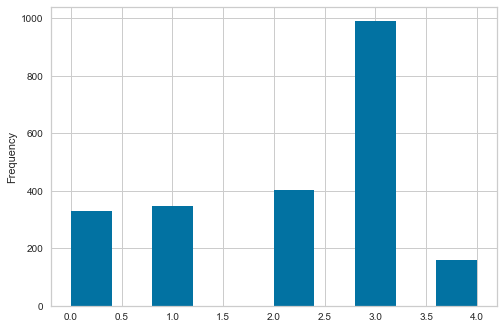

In [96]:
# Let's check the distribution
data_model["K_means_segements_5"].plot(kind ='hist')

**Let's visualize the clusters using PCA**

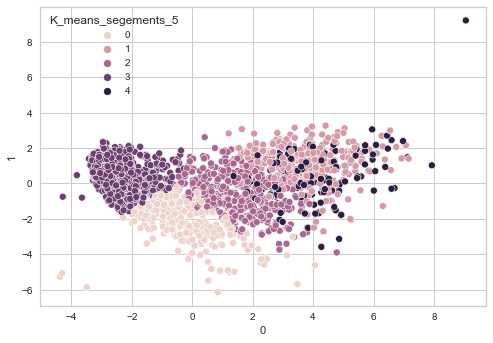

In [97]:
#Using PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "K_means_segements_5")

### **Cluster Profiling**

In [98]:
# Take the cluster-wise mean of all the variables. 
cluster_profile_KMeans_5 = df_cleaned.groupby(by = 'K_means_segements_5').mean()

In [99]:
# Highlighting the maximum average and minimum average value among all the clusters for each of the variables
cluster_profile_KMeans_5.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="pink", axis=0)

**Let's plot the boxplot**

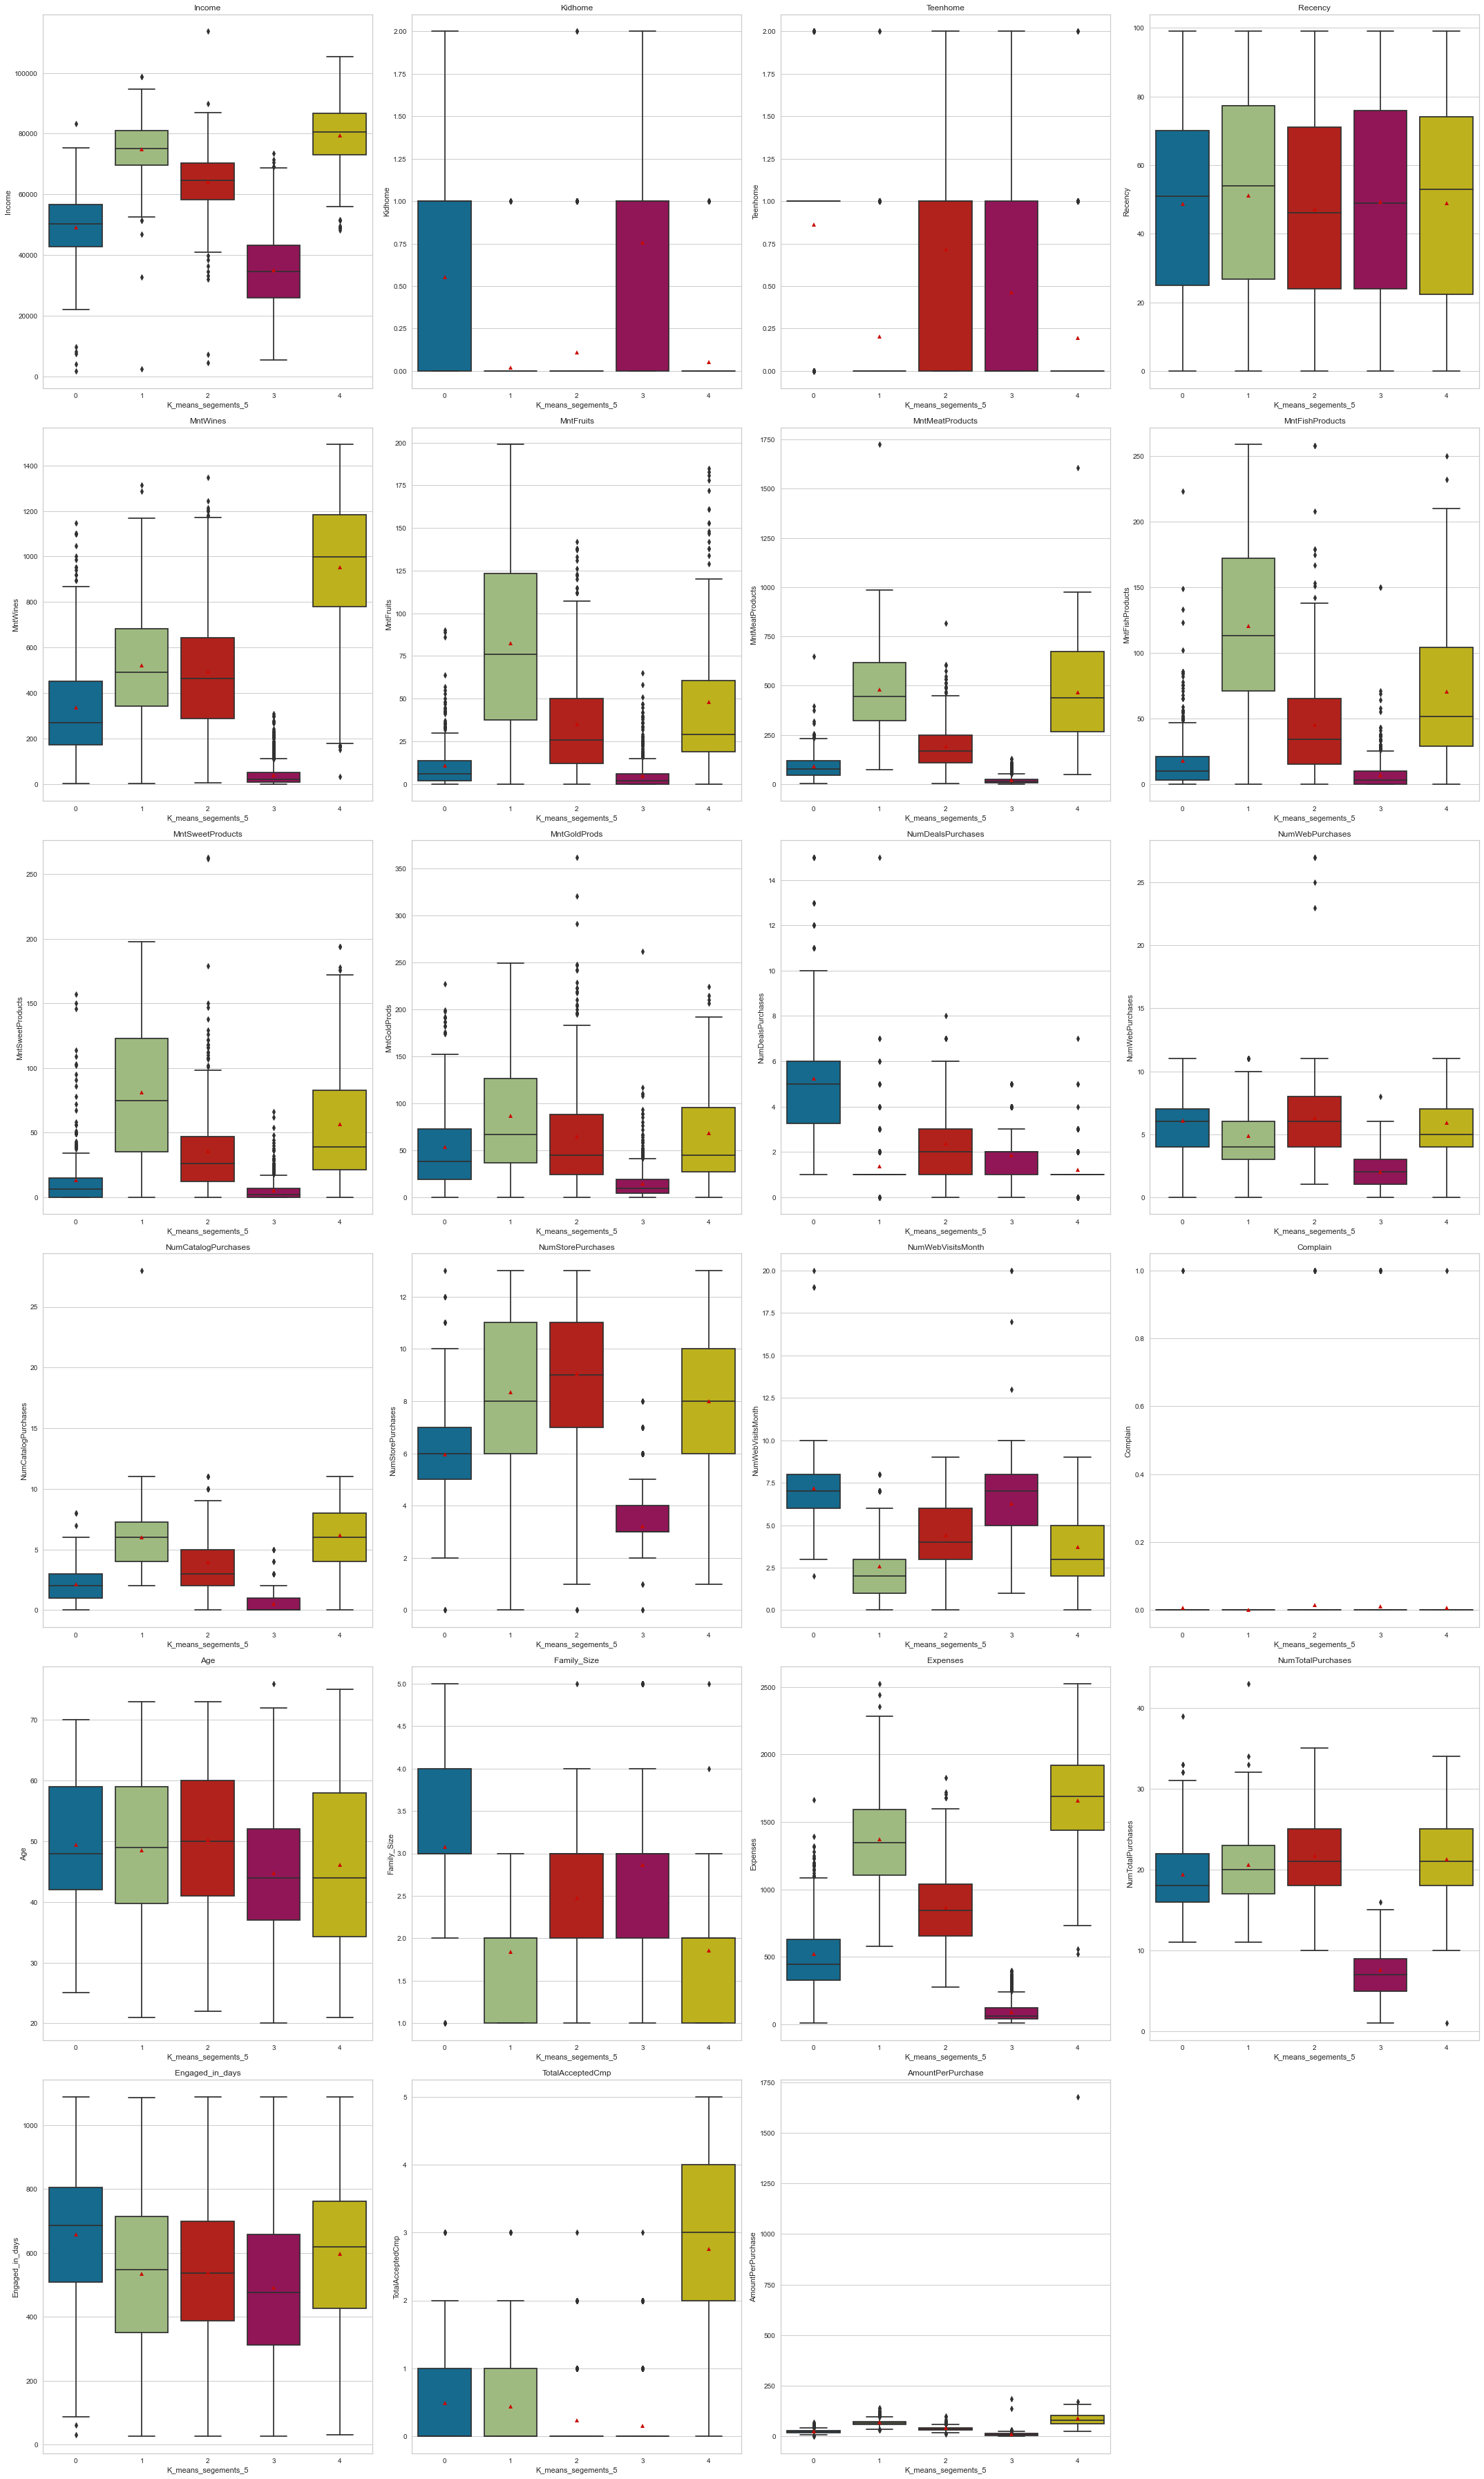

In [100]:
# Creating boxplot for each of the variables
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']


# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df_cleaned[variable], x=df_cleaned['K_means_segements_5'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()


### **Characteristics of each cluster**

**Cluster 0:**
- Cluster 0 is comprised of customers that earn on average ~50000 dollars, spend on average about ~340 dollars on wines, ~10 dollars on fruits, ~92 on dollars meat products, ~18 dollars on fish products, ~13 on sweet products, and ~53 dollars on gold products. The customers in this cluster are observed to have the highest number of purchases made on a discount, a higher number of kids hence a larger family size and most likely to be in a relationship as compared to the other clusters. The customers in this group have the longest relationship with the company. 


**Summary for cluster 0:** 
- From the above observations, it's seen that cluster 0 consists of tier 4 earners (second to last). This is evidenced by the amount of income they earn and their expenses in comparison with other clusters

**Cluster 1:**
- Cluster 1 is observed to consist of customers that earn on average ~75000 dollars that have the highest mean expenditure in Fruits, meat, fish, sweet and gold products. They are also observed to have the highest recency. Customers in this cluster are observed to have the lowest mean number of small children, website visits per month and the smallest family size.

**Summary for cluster 1:**
- From the above observations its observed the customers in this cluster are 2nd tier earners and this is evidenced by the amount of income they earn and their expenses in comparison with other clusters. 

**Cluster 2:** 
- Cluster 2 is observed to consist of customers that earn on average ~64000 dollars with the highest mean number of purchases from the company website and store purchases. This cluster seems to have the oldest customers and the highest number of total purchases. Customers in this cluster are observed to have the lowest recency. 

**Summary for cluster 2:**
- From the above observations its observed the customers in this cluster are 3rd tier earners and this is evidenced by the amount of income they earn and their expenses in comparison with other clusters. 

**Cluster 3:** 

- Cluster 3 is observed to consist of customers that earn on average ~35000 dollars with the highest mean number of small children at home and the lowest amount spent on wines, fruits, meat, fish, sweet, and gold products. The customers in this cluster are observed to have the lowest mean number of store, catalog and web purchases hence the lowest mean overall accepted campaigns thus the lowest mean purchase as compared to the other clusters. The customers in this cluster are seen to have the lowest number of total purchases, lowest mean amount of money spent per purchase and the shortest relationship with the company. 

**Summary for cluster 3:**
-  From the above observations its observed the customers in this cluster are 5th tier earners (low income earners) and this is evidenced by the amount of income they earn and their expenses in comparison with other clusters

**Cluster 4:** 
- Cluster 4 is observed to have customers that have the highest income that is on average ~79000 dollars. The customers in this cluster are observed to have the lowest mean number of purchases made with discount, the highest mean number of catalog purchases, total accepted campaigns, expenses, and amount of money spent per purchase. The customers in this cluster are also observed to have the highest expenditure in wines. 

**Summary for cluster 4:**
-  From the above observations its observed the customers in this cluster are 1st tier earners (very high income earners) and this is evidenced by the amount of income they earn and their expenses in comparison with other clusters.

In [101]:
# Dropping labels we got from K-Means since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True
data_pca.drop("K_means_segements_5", axis = 1, inplace = True)
df_cleaned.drop("K_means_segements_5", axis = 1, inplace = True)

From the above profiles, K=5 provides more interesting insights about customer's purchasing behavior and preferred channels for purchasing products. We can also see that the High, Medium and Low income groups have different age groups and preferences, which was not evident in K=3. So, **we can choose K=5.**

## **K-Medoids**

**Let's find the silhouette score for K=5 in K-Medoids**

In [102]:
kmedo = KMedoids(n_clusters = 5, random_state = 1)   # Initializing K-Medoids with number of clusters as 5 and random_state=1

preds = kmedo.fit_predict(data_pca)           # Fit and predict K-Medoids using data_pca

score = silhouette_score(data_pca, preds)      # Calculate the silhouette score

print(score)                   # Print the score

0.10752806959273077


**Observations and Insights:**

In [103]:
# Predicting on data_pca and ddding K-Medoids cluster labels to the whole data
df_cleaned['Kmed_cluster_labels_5'] = kmedo.predict(data_pca)
# Predicting on data_pca and ddding K-Medoids cluster labels to data_model
data_model['Kmed_cluster_labels_5'] =  kmedo.predict(data_pca)
# Predicting on data_pca and ddding K-Medoids cluster labels to data_pca
data_pca['Kmed_cluster_labels_5'] =  kmedo.predict(data_pca)

<AxesSubplot:ylabel='Frequency'>

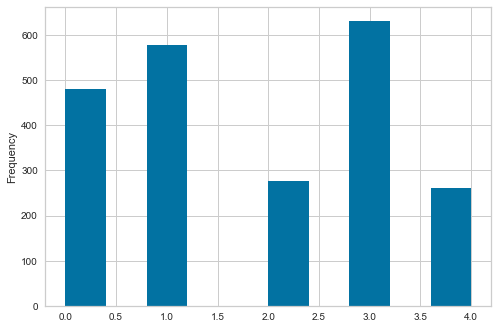

In [104]:
# Let's check the distribution
data_model["Kmed_cluster_labels_5"].plot(kind ='hist')

**Let's visualize the clusters using PCA**

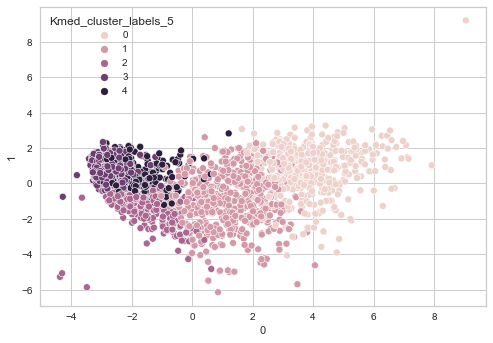

In [105]:
#Using PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "Kmed_cluster_labels_5")

### **Cluster Profiling**

In [106]:
# Take the cluster-wise mean of all the variables.
kmeids_cluster_mean = df_cleaned.groupby(by = 'Kmed_cluster_labels_5').mean()

In [107]:
# Highlight the maximum average value among all the clusters for each of the variables
kmeids_cluster_mean.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="pink", axis=0)

**Let's plot the boxplot**

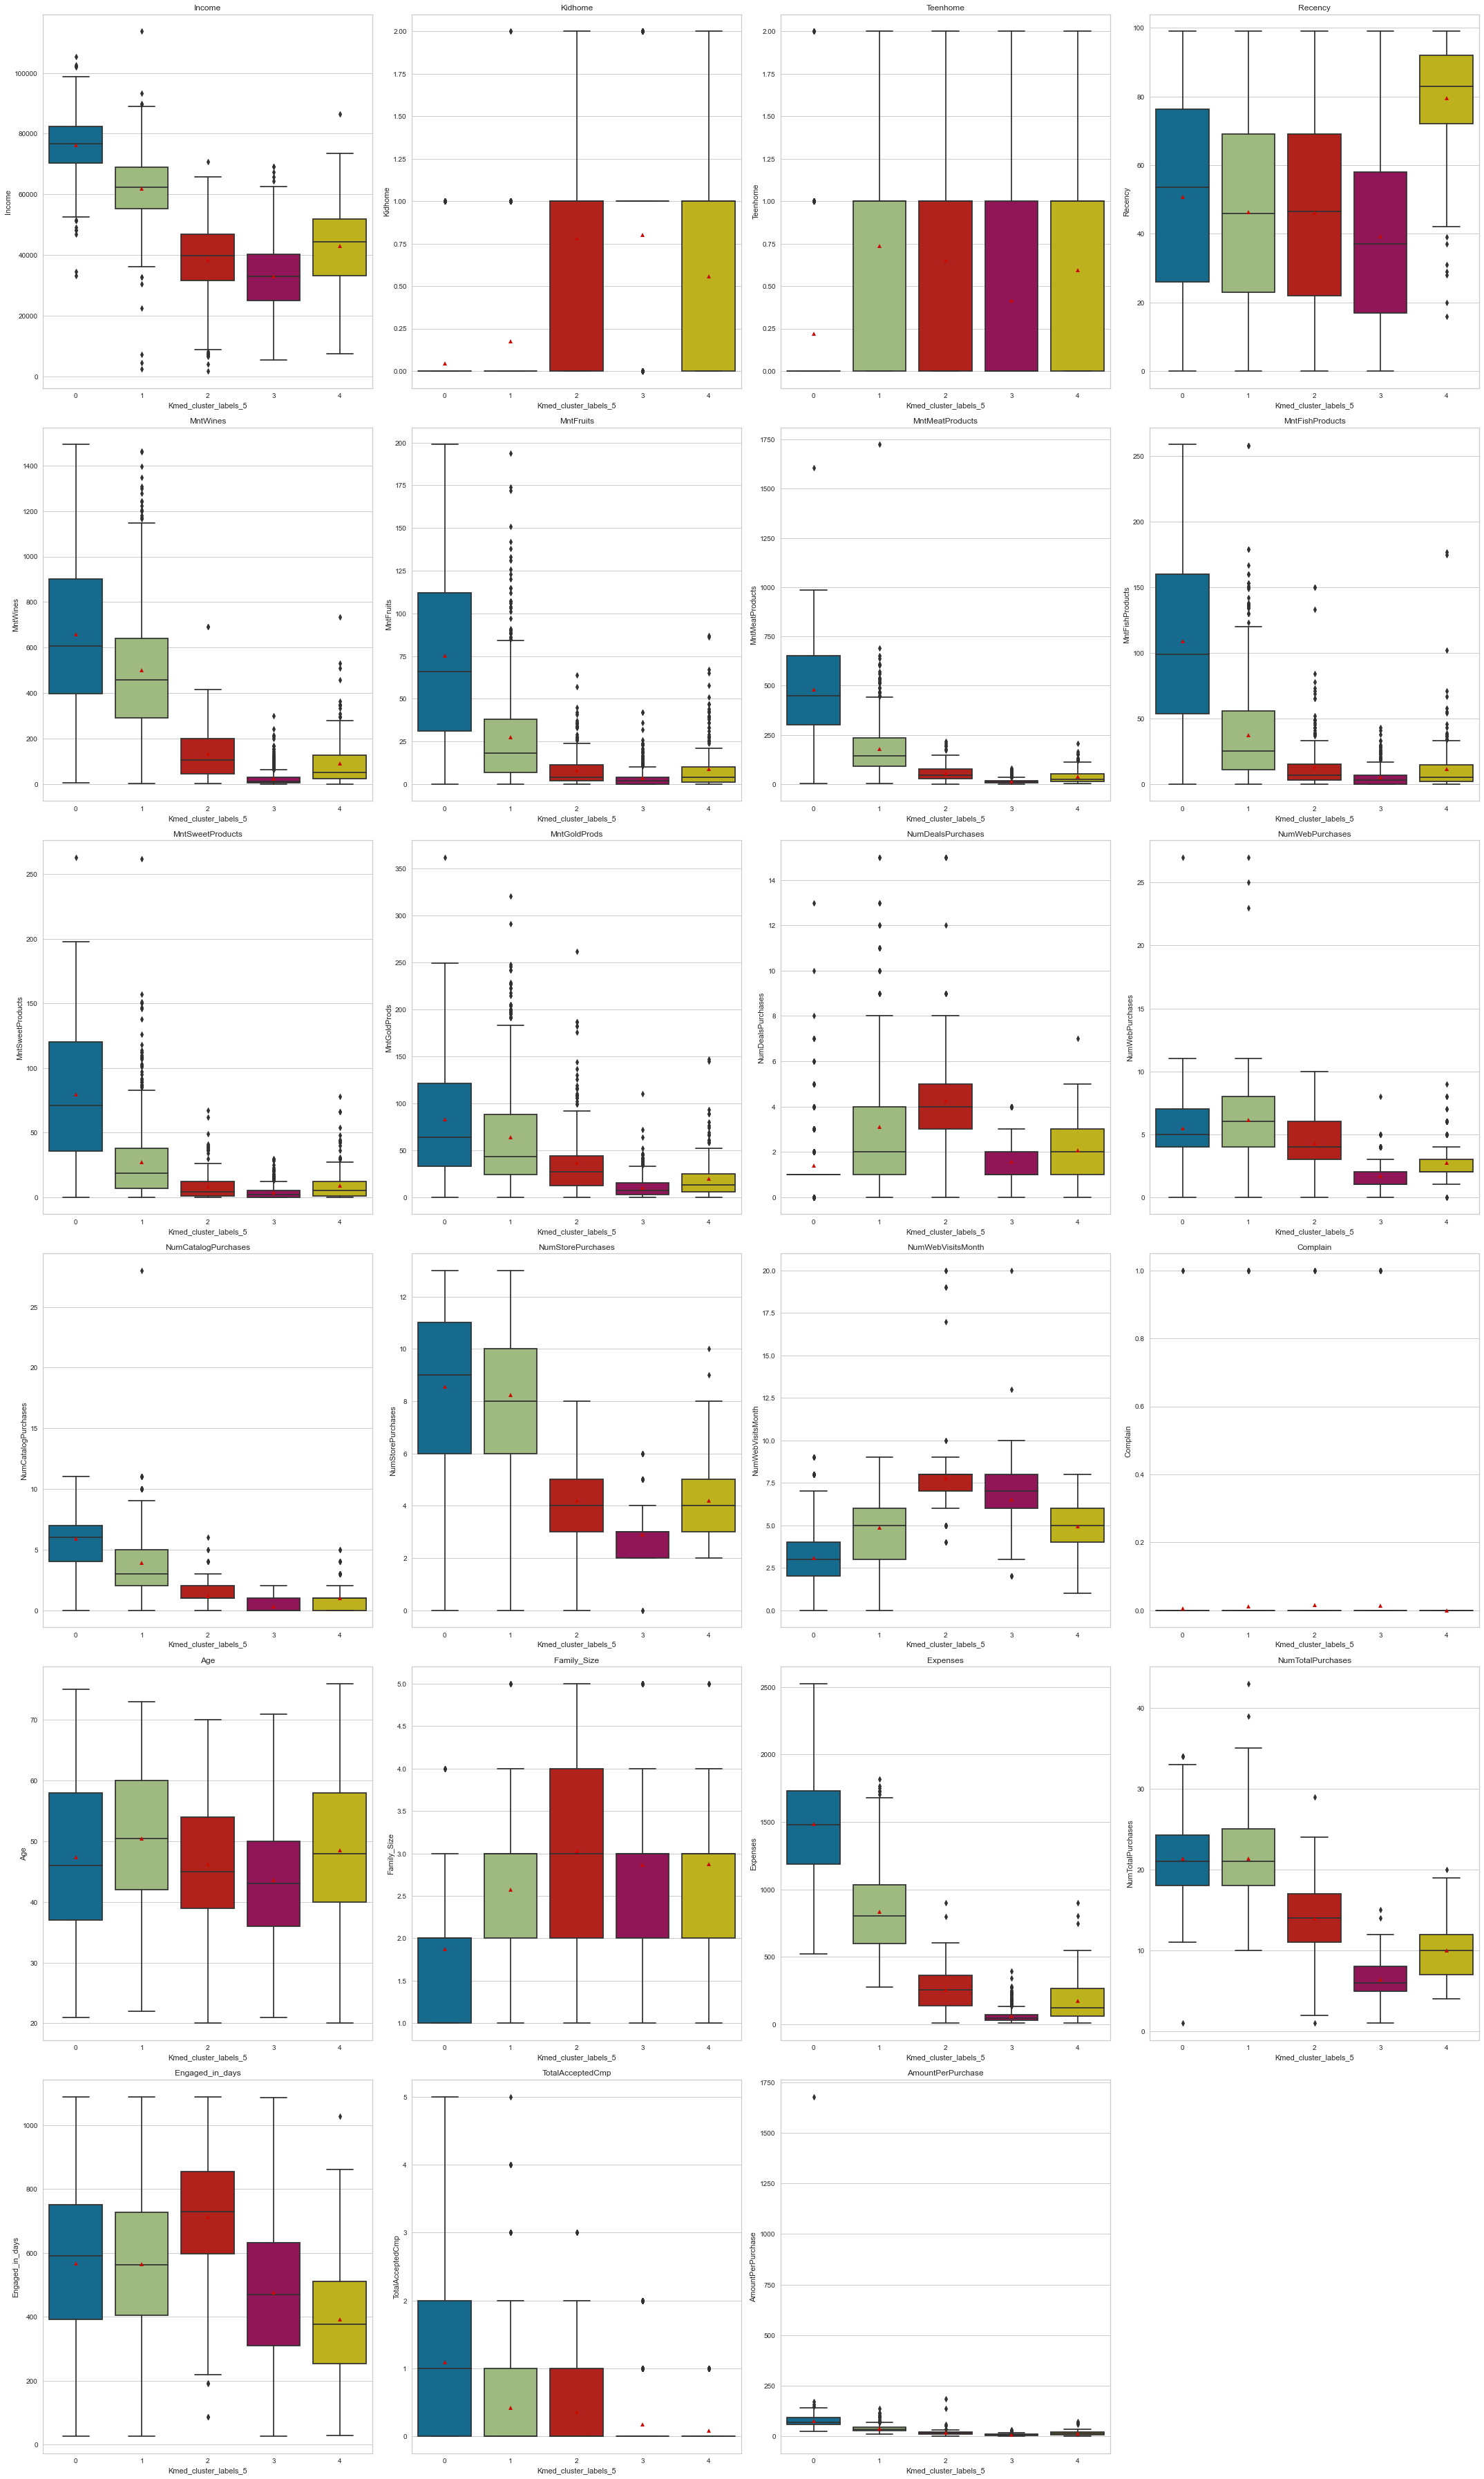

In [108]:
# Create boxplot for each of the variables
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']


# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df_cleaned[variable], x=df_cleaned['Kmed_cluster_labels_5'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()


### **Characteristics of each cluster**

**Cluster 0:**
- Cluster 0 is observed to have customers with the highest mean income that is ~76000 dollars and the lowest mean number of kids at home evidenced by the lowest mean number of Kid home and teen home and hence the smallest family size. Customers in this cluster have the highest mean expenditure in wines, fruits, meat, fish, sweet and gold products. They are also characterized of having the highest mean catalog, and store purchases with the lowest mean web visits per month and purchases made with a discount. They are also characterized by the highest mean expenses, total accepted campaigns and amount of money spent per purchase.

**Summary for cluster 0:** 
- From the above observations its observed the customers in this cluster are 1st tier earners (very high income earners) and this is evidenced by them having the highest mean amount of income earned and the highest mean expenses

**Cluster 1:**
- Cluster 1 is comprised of customers with the highest mean number of teenagers, website and total number of purchases. They have the lowest mean birth year and hence are the oldest in comparison to those in other clusters 

**Summary for cluster 1:**
- From the above observations its obsereved the customers in this cluster are 2nd tier earners and this is evidenced by the amount of income they earn and their expenses in comparison with other clusters 

**Cluster 2:** 
- Cluster 2 is comprised of customers with the highest mean purchase made with discounts, website visits per month, highest mean number of complaints, kids, and large family size. They are also characterized by the highest mean. Number of days with the company hence have a long relationship with the company. They have the lowest mean status hence most of the customers in this cluster are single

**Summary for cluster 2:**
- From the above observations, it's seen that cluster 0 consists of tier 4 earners (second to last). This is evidenced by the amount of income they earn and their expenses in comparison with other clusters

**Cluster 3:** 
- Cluster 3 is composed of customers with a high birth year and hence are the youngest as compared to those in other clusters. The customers in this cluster have the lowest mean income of ~33000 dollars and the highest number of small children at home. Customers in this cluster are also characterized by the lowest mean recency, amount spent on wines, fruits, meat, fish, sweet and gold products. They also have the lowest mean catalog, store, and website purchases hence have the lowest number of total purchases and hence the lowest mean expense and thus the lowest mean amount spent per purchase. 

**Summary for cluster 3:**
- From the above observations its observed the customers in this cluster are 5th tier earners (low income earners) and this is evidenced by them having the lowest mean amount of income earned and the lowest mean expenses in comparison with other clusters

**Cluster 4:** 
- Cluster 4 is composed of customers with the highest mean of recency, the highest mean status, the lowest mean engagement with the company, and the lowest mean total accepted campaigns. 

**Summary for cluster 4:**
- From the above observations its observed the customers in this cluster are 3rd tier earners and this is evidenced by the amount of income they earn and their expenses in comparison with other clusters.

In [109]:
# Dropping labels we got from K-Medoids since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True
data_pca.drop("Kmed_cluster_labels_5", axis = 1, inplace = True)
df_cleaned.drop("Kmed_cluster_labels_5", axis = 1, inplace = True)

## **Hierarchical Clustering**

Let's find the Cophenetic correlation for different distances with different linkage methods.

### **What is a Cophenetic correlation?**

The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points. 

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms. 

**Let's calculate Cophenetic correlation for each of the distance metrics with each of the linkage methods**

In [110]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on data_pca
        c, coph_dists = cophenet(Z, pdist(data_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

Cophenetic correlation for Euclidean distance and single linkage is 0.8063217204308333.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6171288089817474.
Cophenetic correlation for Euclidean distance and average linkage is 0.8619040295688457.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7884037056391834.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.701400935083475.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8121282710675837.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6367397874708012.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.47109715012277253.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6670294776111134.
Cophenetic correlation for Cityblock distance and single linkage is 0.8090687047884539.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7963434052019075.
Cophenetic corr

In [111]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8671371105092285, which is obtained with Cityblock distance and average linkage.


**Let's have a look at the dendrograms for different linkages with `Cityblock distance`**

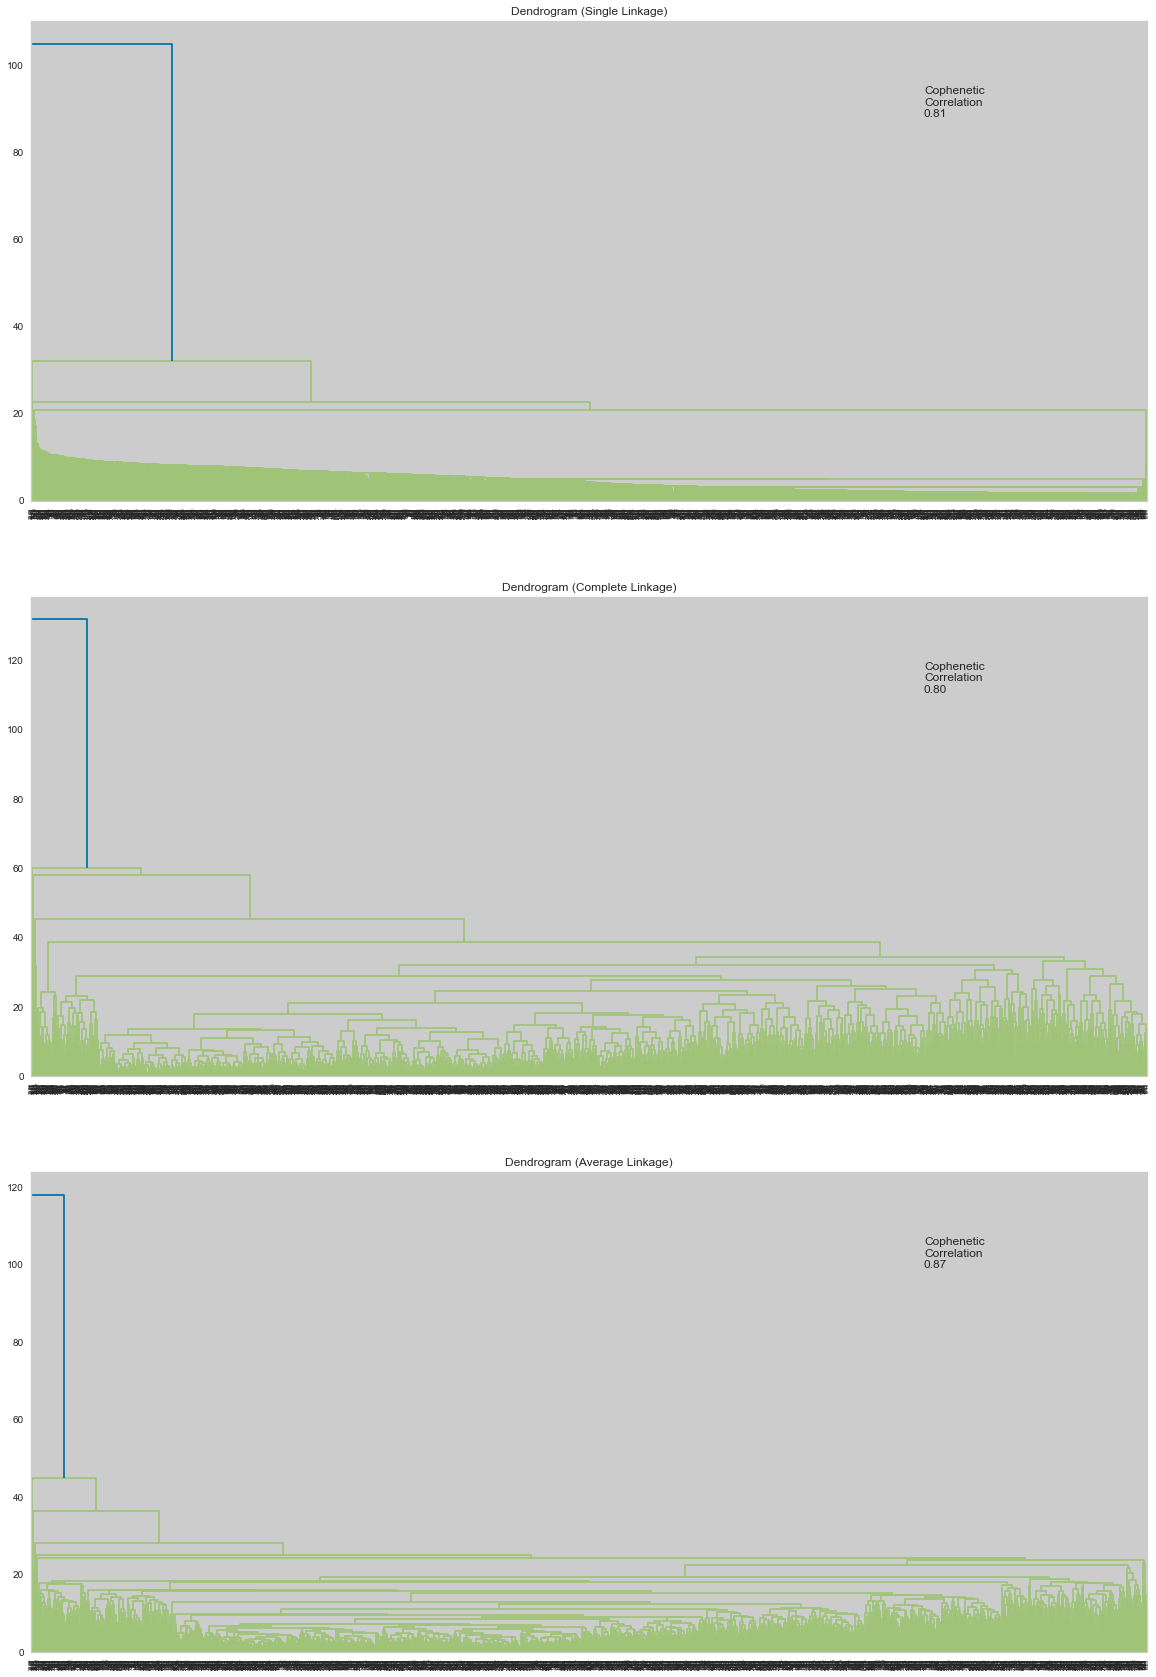

In [112]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(20, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations and Insights:**
- With the cityblock hierachical clustering, it's observed that Average linkage gives better separated clusters as compared to the other linkage methods since it has a higher cophenetic correlation. 


**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?

**Let's have a look at the dendrograms for different linkages with `Chebyshev distance`**

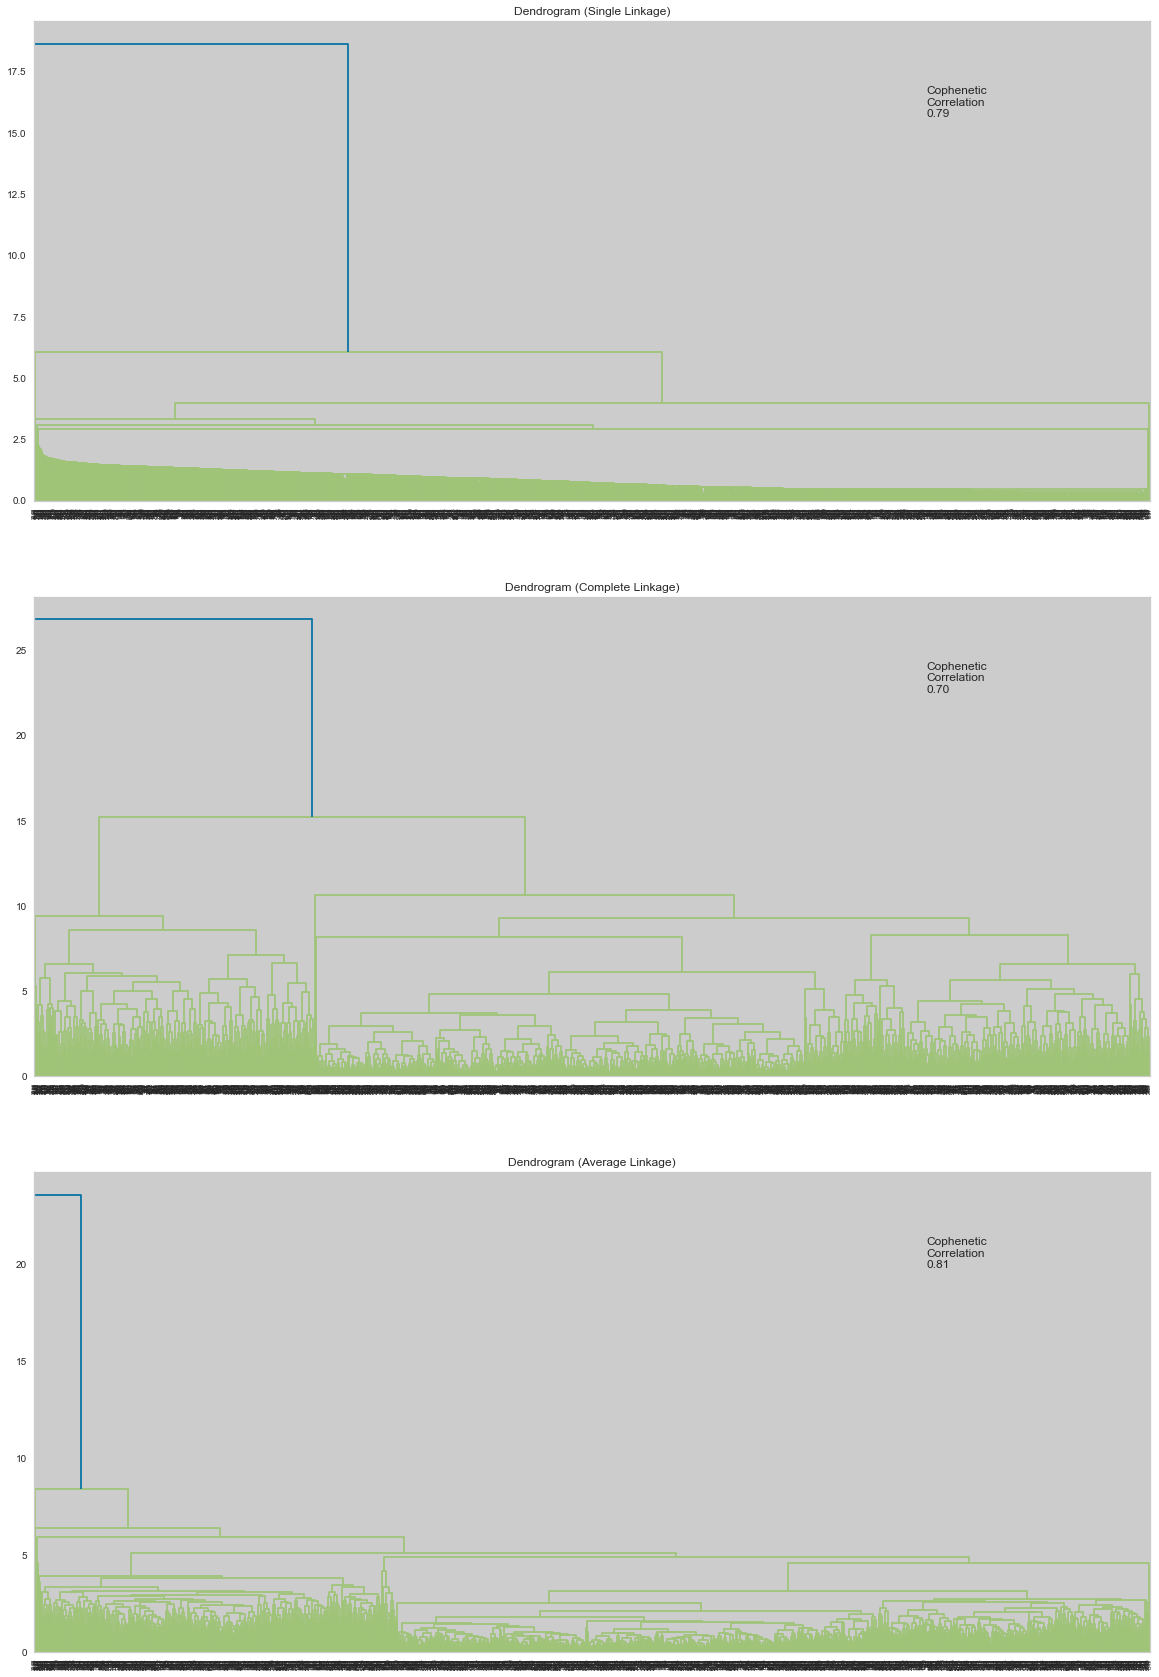

In [113]:
# Plot the dendrogram for Chebyshev distance with linkages single, complete and average. 
# Hint: Use Chebyshev distance as the metric in the linkage() function 

# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(20, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Chebyshev", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with Chebyshev distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations and Insights:**
- With the Chebyshev hierachical clustering, it's observed that Average linkage gives better separated clusters as compared to the other linkage methods since it has a higher cophenetic correlation.

**Let's have a look at the dendrograms for different linkages with Mahalanobis distance**

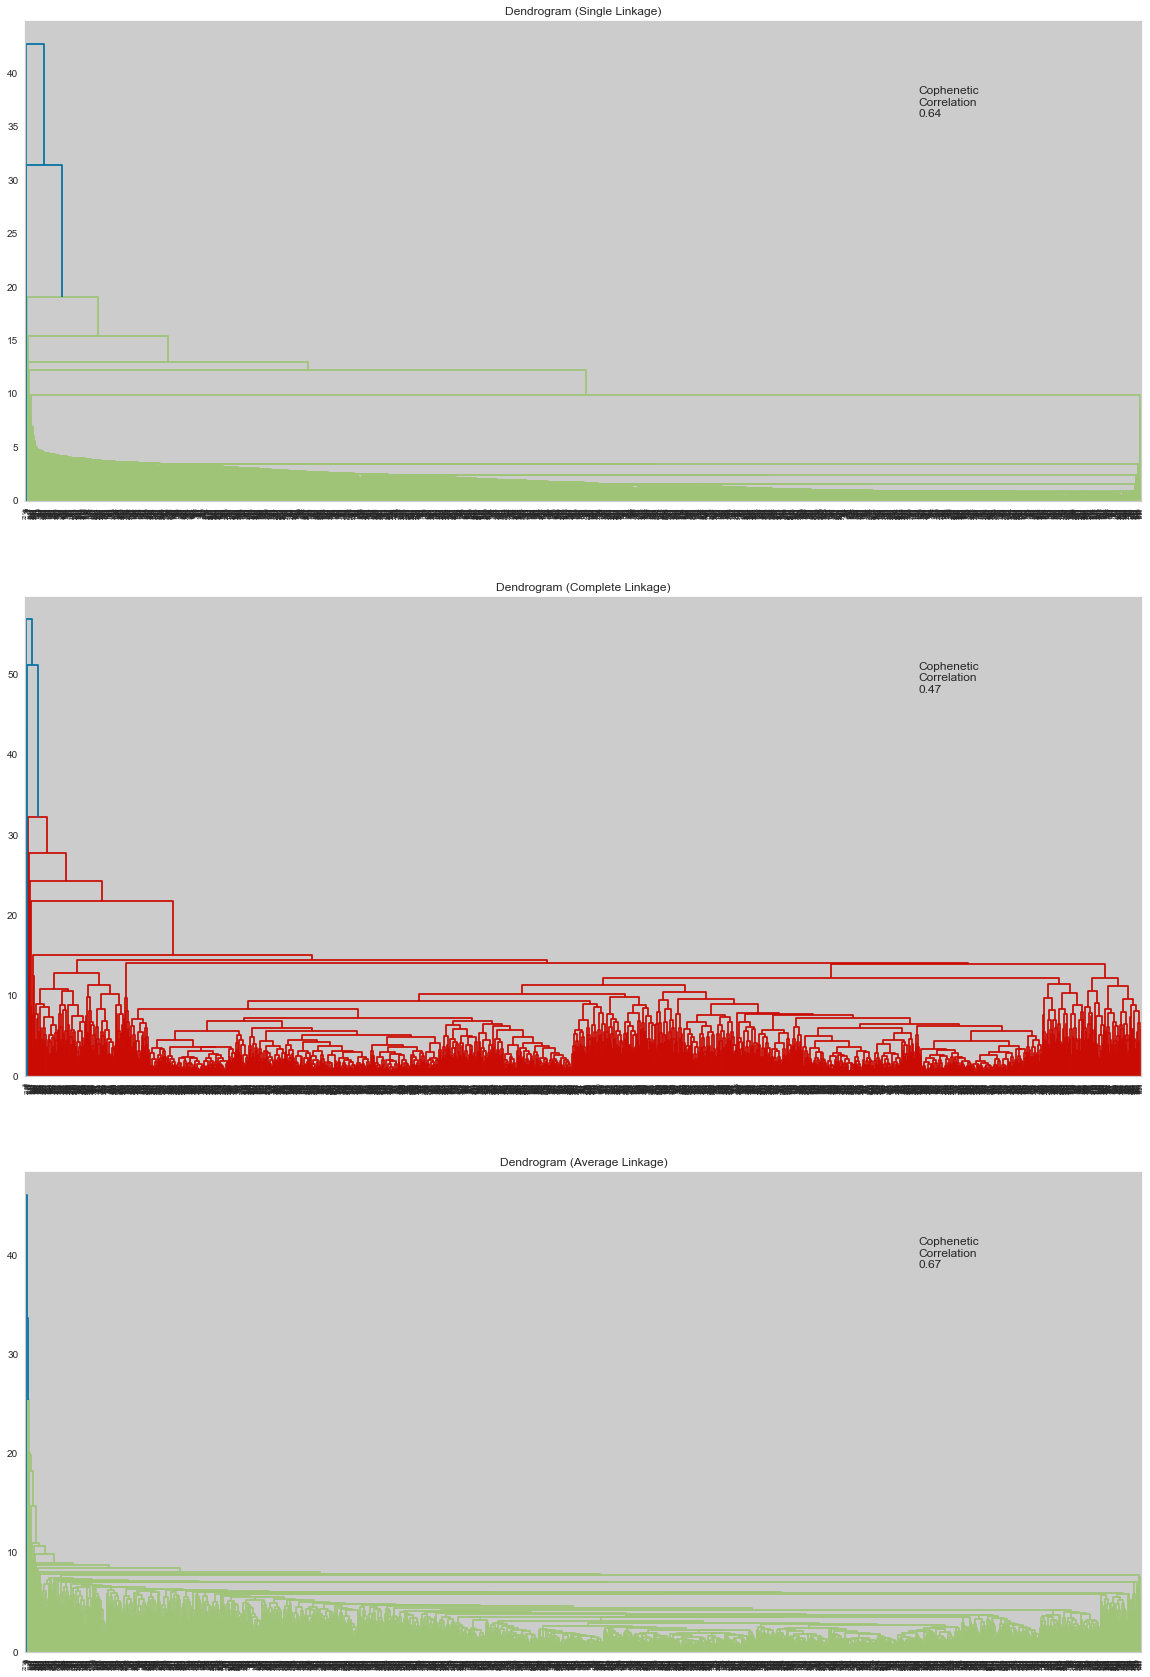

In [114]:
# Plot the dendrogram for Mahalanobis distance with linkages single, complete and average. 
# Hint: Use Mahalanobis distance as the metric in the linkage() function 

# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(20, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Mahalanobis", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with Mahalanobis distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations and Insights:**
- With the Mahalanobis hierachical clustering, it's observed that Average linkage gives better separated clusters as compared to the other linkage methods since it has a higher cophenetic correlation.

**Let's have a look at the dendrograms for different linkages with Euclidean distance**

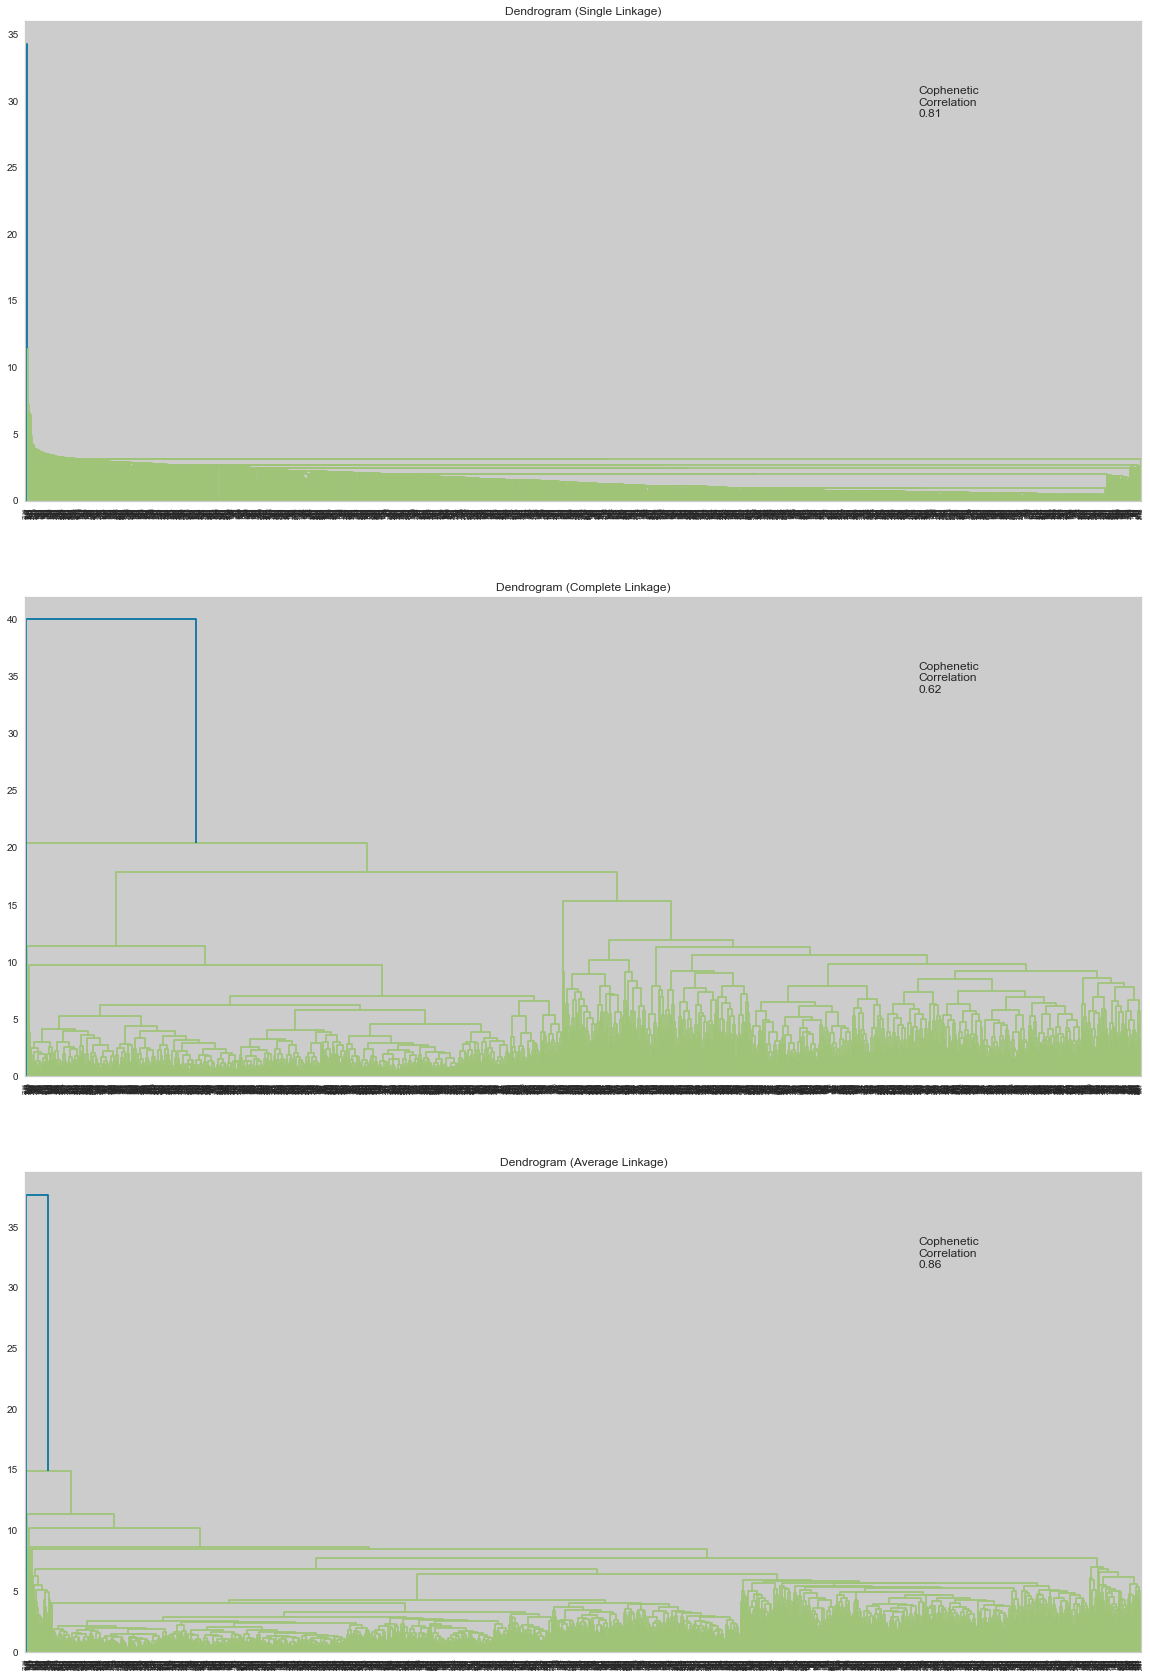

In [115]:
# Plot the dendrogram for Euclidean distance with linkages single, complete, average and ward. 
# Hint: Use Euclidean distance as the metric in the linkage() function 

# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(20, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Euclidean", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with Euclidean distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Think about it:**

- Are there any distinct clusters in any of the dendrograms?

**Observations and Insights:**
- With the Euclidean hierachical clustering, it's observed that Average linkage gives better separated clusters as compared to the other linkage methods since it has a higher cophenetic correlation.

- comparing all the hierachical clusters it's observed that the Average linkage of cityblock hierachical clustering provides better separated clusters since it has the highest cophenetic correlation

In [116]:
# Initialize Agglomerative Clustering with affinity (distance) as Euclidean, linkage as 'Ward' with clusters=3
HCmodel = AgglomerativeClustering(n_clusters= 3, affinity= 'euclidean', linkage= 'ward') 

# Fit on data_pca
HCmodel.fit(data_pca)                                                                 

AgglomerativeClustering(n_clusters=3)

In [117]:
# Add Agglomerative Clustering cluster labels to data_pca
data_pca['Agglomerative_clustering_label'] = HCmodel.labels_
# Add Agglomerative Clustering cluster labels to the whole data
df_cleaned['Agglomerative_clustering_label'] = HCmodel.labels_
# Add Agglomerative Clustering cluster labels to data_model
data_model['Agglomerative_clustering_label'] = HCmodel.labels_


<AxesSubplot:ylabel='Frequency'>

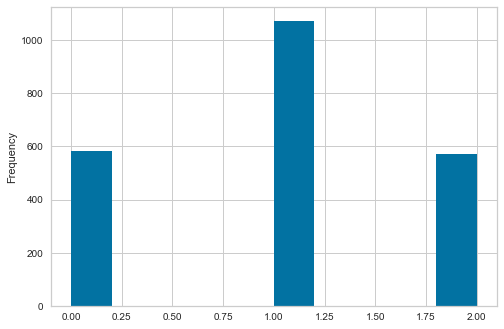

In [118]:
# Let's check the distribution
data_model["Agglomerative_clustering_label"].plot(kind ='hist')

**Let's visualize the clusters using PCA.**

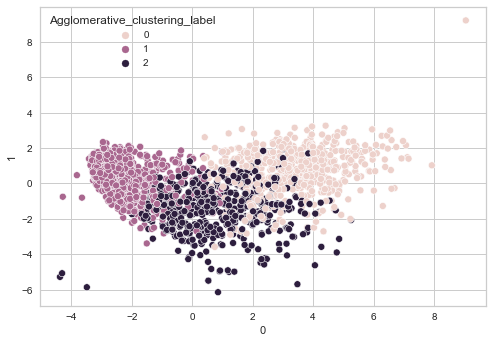

In [119]:
# Hint: Use PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "Agglomerative_clustering_label")

### **Cluster Profiling**

In [120]:
# Take the cluster-wise mean of all the variables. 
Agglomerative_profile_clustering_mean = df_cleaned.groupby(by = 'Agglomerative_clustering_label').mean()

In [121]:
# Highlight the maximum average value among all the clusters for each of the variables
Agglomerative_profile_clustering_mean.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="pink", axis=0)

**Let's plot the boxplot**

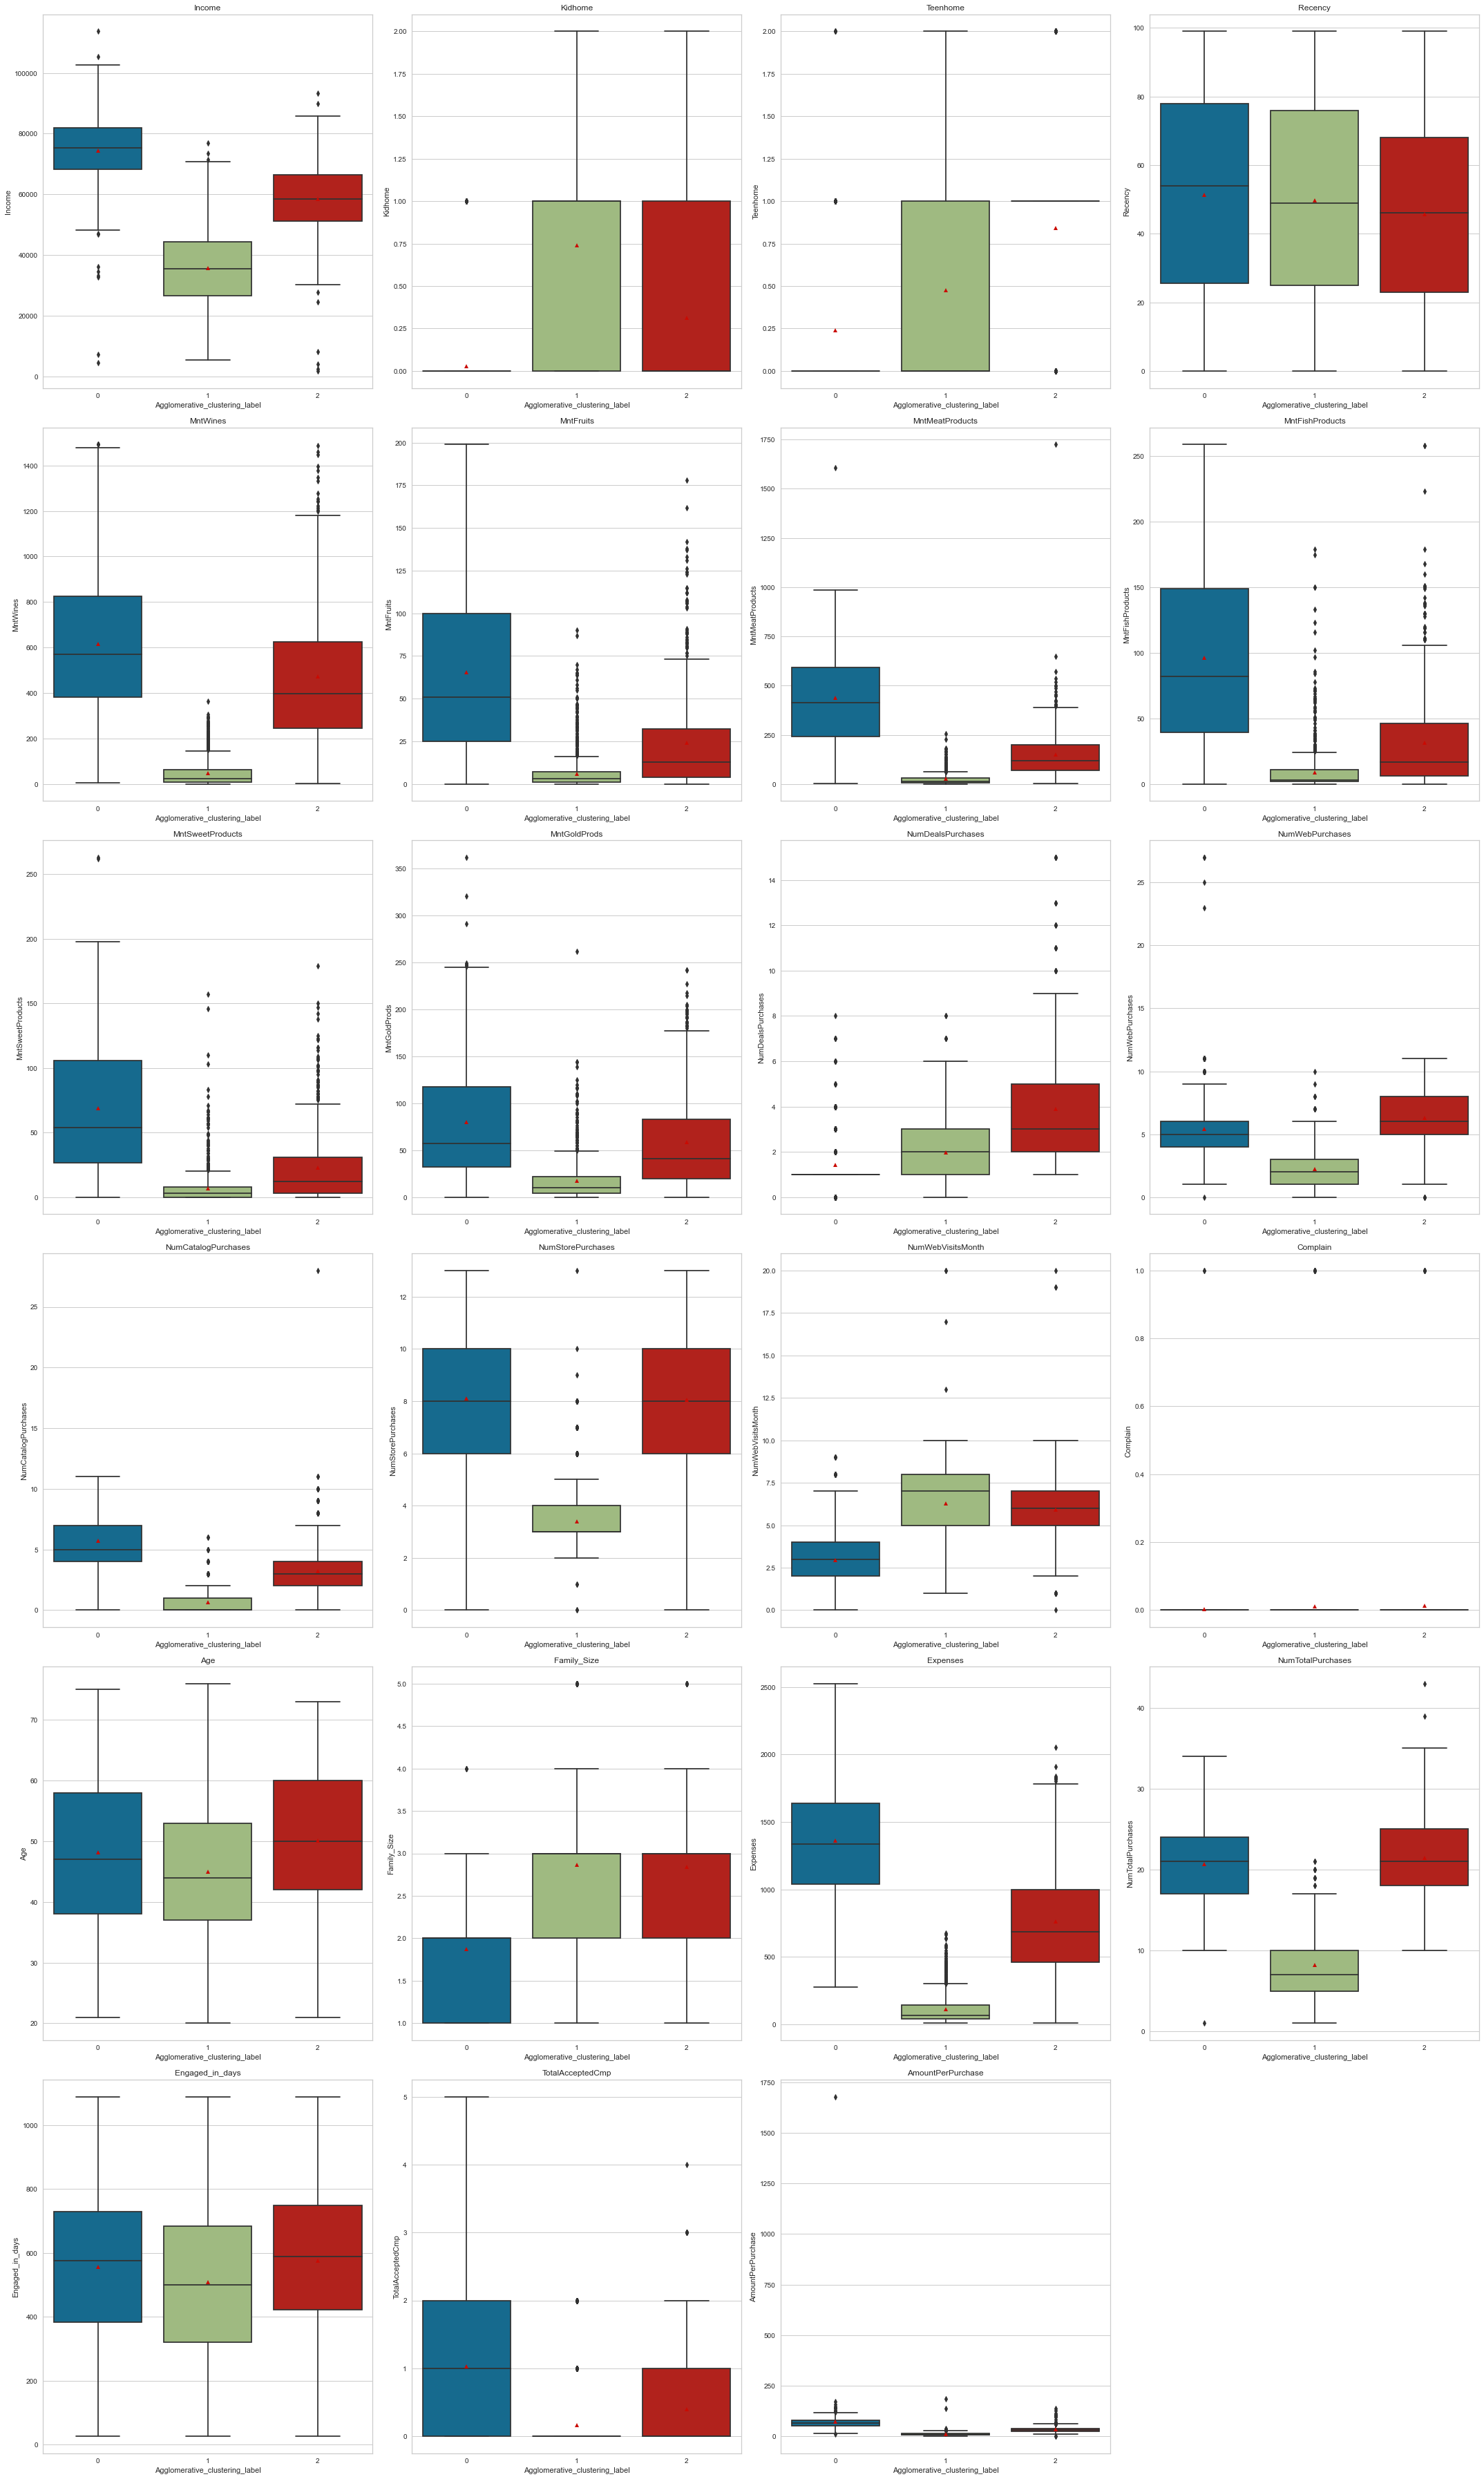

In [122]:
# Create boxplot for each of the variables
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']


# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df_cleaned[variable], x=df_cleaned['Agglomerative_clustering_label'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()



### **Characteristics of each cluster**

**Cluster 0:**
- Cluster 0 is comprised of customers with the highest mean income, recency, and amount of money spent on wines, fruits, meat, fish, sweet, and gold products. The customers in this cluster are also characterized by the highest mean catalog and store purchases, the highest mean expenses, the highest mean total accepted campaigns and the amount spent per purchase.  In contrast, the customers in this cluster have the least number of small children (kidhome) and teenagers and hence have the least number of kids and thus have a small family size. They also have the least status which means that majority of the customers in this cluster are single. They also have the lowest mean purchases with discounts and the lowest mean website visits per month

**Summary for cluster 0:** 
- The customers in cluster 0 are high income earners and high spenders too (tier 1). This is evidenced by them having the highest mean income and highest mean expenses. 

**Cluster 1:**
- Cluster 1 is comprised of customers with the highest mean birth year hence are the youngest as compared to those in other clusters. The customers in this cluster are categorized by the lowest mean income and amount of money spent on wines, fruits, meat, fish, sweet, and gold products including catalog, store and web purchases hence have the least mean total number of total purchases and thus the least total accepted campaigns and the least mean amount spent per purchase which, in turn, makes them have the least mean expenses. In contrast, they have the highest mean number of kids and thus are characterized to have the largest families in comparison with other clusters. They also have the highest mean number of web visits per month. 

**Summary for cluster 1:**
- The customers in cluster 1 are low income earners and low spenders too (tier 3). This is evidenced by them having the lowest mean income and lowest mean expenses. 

**Cluster 2:** 
- Cluster 2 is comprised of customers with the lowest birth year and hence have the oldest customers in comparison to the other clusters. Customers in this cluster have the highest mean number of teenagers, purchases made with a discount, web purchases and status. Due to a high status, it can be said that majority of the customers in this cluster are in a relationship. Customers in this cluster have the highest mean number of total purchases and have the longest relationship with the company as evidenced by the engaged_in_days box plot.

**Summary for cluster 2:**
- The customers in cluster 2 are moderate income earners and moderate spenders too (tier 2). This is evidenced by them having the moderate mean income and moderate mean expenses. 

**Observations and Insights:**

In [123]:
# Dropping labels we got from Agglomerative Clustering since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True
data_pca.drop('Agglomerative_clustering_label', axis = 1, inplace = True)
df_cleaned.drop('Agglomerative_clustering_label', axis = 1, inplace = True)

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [124]:

from sklearn.cluster import DBSCAN      #importing DBSCAN from the sklearn library

# Initializing lists
eps_value = [2,3]                       # Taking random eps value

min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [125]:
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.199140698832626
For eps value =2 For min sample =20 The average silhoutte_score is : 0.3389144662235011
For eps value =3 For min sample =6 The average silhoutte_score is : 0.33631692402809094
For eps value =3 For min sample =20 The average silhoutte_score is : 0.3398851568850181


In [126]:
# Printing the highest silhouette score
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


**Now, let's apply DBSCAN using the hyperparameter values we have received above.**

In [127]:
# Apply DBSCAN using the above hyperparameter values
dbs = DBSCAN(eps=3, min_samples=20)

In [128]:
# fit_predict on data_pca and add DBSCAN cluster labels to the whole data
df_cleaned['DBSCAN_labels'] = dbs.fit_predict(data_pca)
# fit_predict on data_pca and add DBSCAN cluster labels to data_model
data_model['DBSCAN_labels'] = dbs.fit_predict(data_pca)
# fit_predict on data_pca and add DBSCAN cluster labels to data_pca
data_pca['DBSCAN_labels'] = dbs.fit_predict(data_pca)

<AxesSubplot:ylabel='Frequency'>

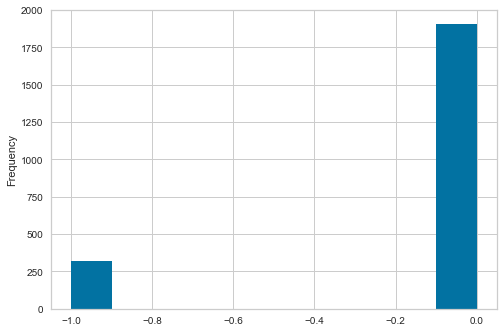

In [129]:
# Let's check the distribution
data_model["DBSCAN_labels"].plot(kind ='hist')

**Let's visualize the clusters using PCA.**

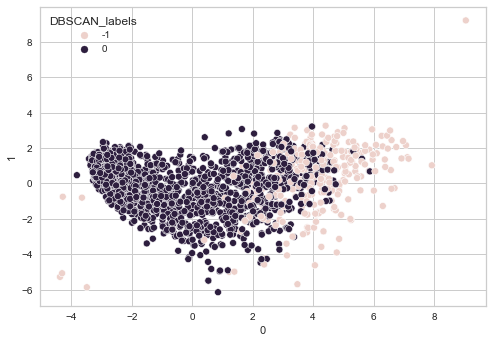

In [130]:
# Hint: Use PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "DBSCAN_labels")


**Observations and Insights:**
- it's observed that the cluster -1 has more than 250 observations but less than 500
- it's observed that the cluster 0 has more than 1750 observations but less than 2000

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

### **using eps=2 and min_samples = 20**

In [131]:
# Apply DBSCAN using the above hyperparameter values
dbs1 = DBSCAN(eps=2, min_samples=20)

In [132]:
# fit_predict on data_pca and add DBSCAN cluster labels to the whole data
df_cleaned['DBSCAN_labels'] = dbs1.fit_predict(data_pca)
# fit_predict on data_pca and add DBSCAN cluster labels to data_model
data_model['DBSCAN_labels'] = dbs1.fit_predict(data_pca)
# fit_predict on data_pca and add DBSCAN cluster labels to data_pca
data_pca['DBSCAN_labels'] = dbs1.fit_predict(data_pca)

<AxesSubplot:ylabel='Frequency'>

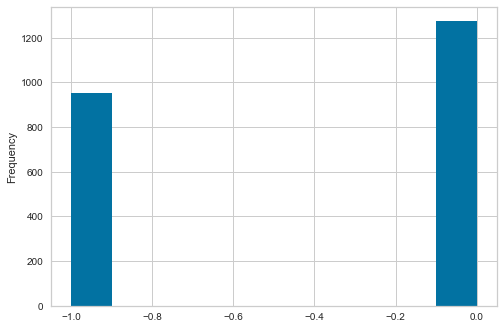

In [133]:
# Let's check the distribution
data_model["DBSCAN_labels"].plot(kind ='hist')

**Let's visualize the clusters using PCA.**

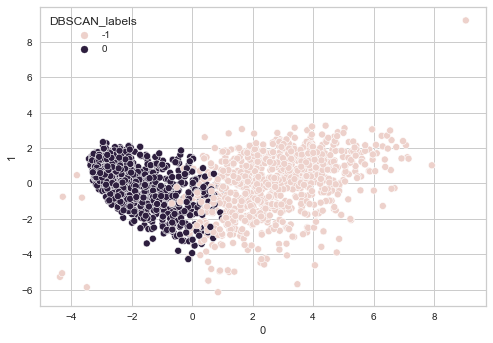

In [134]:
# Hint: Use PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "DBSCAN_labels")

**observations and insights**
- it's observed that the cluster -1 has more than 800 observations but less than 1000
- it's observed that the cluster 0 has more than 1200 observations
- comparing this plot with the previous plot, it's seen that the clusters in this plot are seperated way better than those in the previous plot

**Note:** You can experiment with different eps and min_sample values to see if DBSCAN produces good distribution and cluster profiles.

### **using eps=2 and min_samples = 6**

In [135]:
# Apply DBSCAN using the above hyperparameter values
dbs2 = DBSCAN(eps=2, min_samples=6)

In [136]:
# fit_predict on data_pca and add DBSCAN cluster labels to the whole data
df_cleaned['DBSCAN_labels'] = dbs2.fit_predict(data_pca)
# fit_predict on data_pca and add DBSCAN cluster labels to data_model
data_model['DBSCAN_labels'] = dbs2.fit_predict(data_pca)
# fit_predict on data_pca and add DBSCAN cluster labels to data_pca
data_pca['DBSCAN_labels'] = dbs2.fit_predict(data_pca)

<AxesSubplot:ylabel='Frequency'>

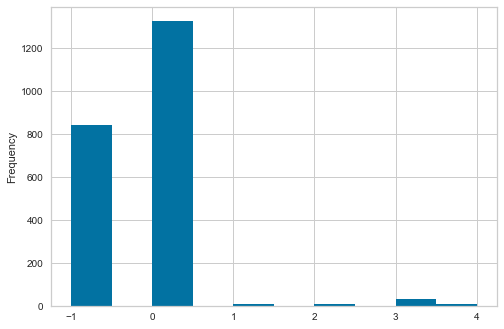

In [137]:
# Let's check the distribution
data_model["DBSCAN_labels"].plot(kind ='hist')

**Let's visualize the clusters using PCA.**

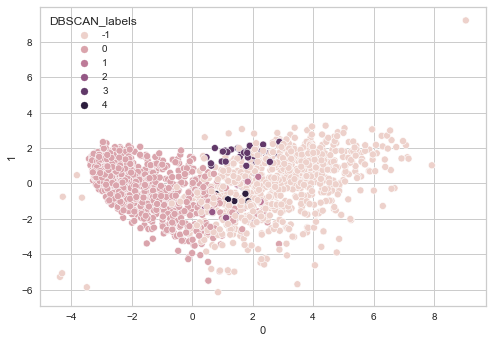

In [138]:
# Hint: Use PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "DBSCAN_labels")

**observations and insights**
- it's observed that the cluster -1 has more than 800 observations but less than 1000
- it's observed that the cluster 0 has more than 1200 observations
- it's opbserved that the clusters 1, 2, 3, 4 have observations less than 200
- it's seen that the clusters in this plot are over lapping one another

### **using eps=3 and min_samples = 6**

In [139]:
# Apply DBSCAN using the above hyperparameter values
dbs3 = DBSCAN(eps=2, min_samples=6)

In [140]:
# fit_predict on data_pca and add DBSCAN cluster labels to the whole data
df_cleaned['DBSCAN_labels'] = dbs3.fit_predict(data_pca)
# fit_predict on data_pca and add DBSCAN cluster labels to data_model
data_model['DBSCAN_labels'] = dbs3.fit_predict(data_pca)
# fit_predict on data_pca and add DBSCAN cluster labels to data_pca
data_pca['DBSCAN_labels'] = dbs3.fit_predict(data_pca)

<AxesSubplot:ylabel='Frequency'>

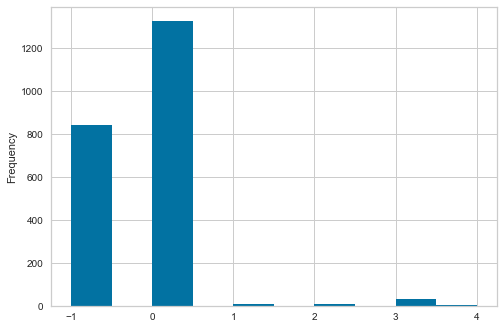

In [141]:
# Let's check the distribution
data_model["DBSCAN_labels"].plot(kind ='hist')

**Let's visualize the clusters using PCA.**

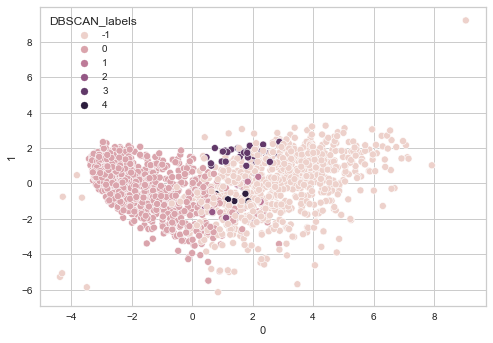

In [142]:
# Hint: Use PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "DBSCAN_labels")

**observations and insights**
- it's observed that the cluster -1 has more than 800 observations but less than 1000
- it's observed that the cluster 0 has more than 1200 observations
- it's opbserved that the clusters 1, 2, 3, 4 have observations less than 200
- it's seen that the clusters in this plot are over lapping one another

**Comparing the DBSCAN PLOTS**
- Comparing all the DBSCAN plots, the plot with eps = 2, min_samples = 20 provides better separation of the clusters. 

In [143]:
# Dropping labels we got from DBSCAN since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True
data_pca.drop('DBSCAN_labels', axis = 1, inplace = True)
df_cleaned.drop('DBSCAN_labels', axis = 1, inplace = True)

## **Gaussian Mixture Model**

**Let's find the silhouette score for K=5 in Gaussian Mixture**

In [144]:
gmm = GaussianMixture(n_components = 5, random_state = 1) # Initialize Gaussian Mixture Model with number of clusters as 5 and random_state=1

preds = gmm.fit_predict(data_pca)         # Fit and predict Gaussian Mixture Model using data_pca

score = silhouette_score(data_pca, preds)          # Calculate the silhouette score

print(score)                   # Print the score

0.14344403792723287


**Observations and Insights:**
- It's observed that the silhouette_score of the GMM (Gaussian Mixture Model) is 0.14. this is a very low silhouette_score 

In [145]:
# Predicting on data_pca and add Gaussian Mixture Model cluster labels to the whole data
df_cleaned['gmm_cluster_labels'] = gmm.predict(data_pca)
# Predicting on data_pca and add Gaussian Mixture Model cluster labels to data_model
data_model['gmm_cluster_labels'] = gmm.predict(data_pca)
# Predicting on data_pca and add Gaussian Mixture Model cluster labels to data_pca
data_pca['gmm_cluster_labels'] = gmm.predict(data_pca)


<AxesSubplot:ylabel='Frequency'>

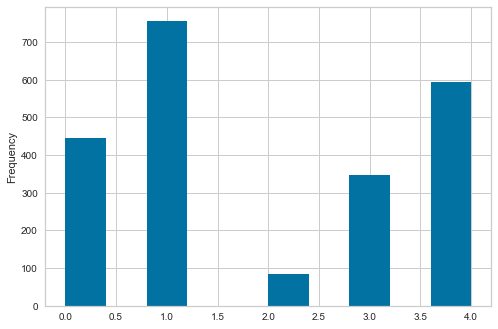

In [146]:
# Let's check the distribution

data_model["gmm_cluster_labels"].plot(kind ='hist')

**Let's visualize the clusters using PCA.**

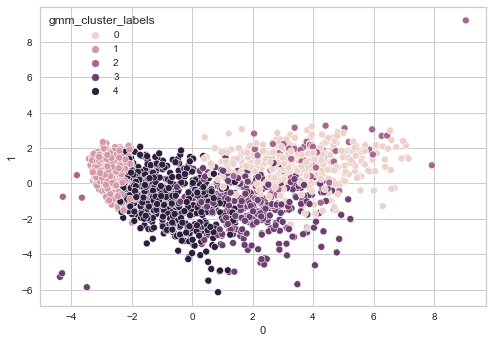

In [147]:
# Hint: Use PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "gmm_cluster_labels")

### **Cluster Profiling**

In [148]:
# Take the cluster-wise mean of all the variables
gmm_cluster_labels_mean = df_cleaned.groupby(by = 'gmm_cluster_labels').mean()

In [149]:
# Highlight the maximum average value among all the clusters for each of the variables
gmm_cluster_labels_mean.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="pink", axis=0)

**Let's plot the boxplot**

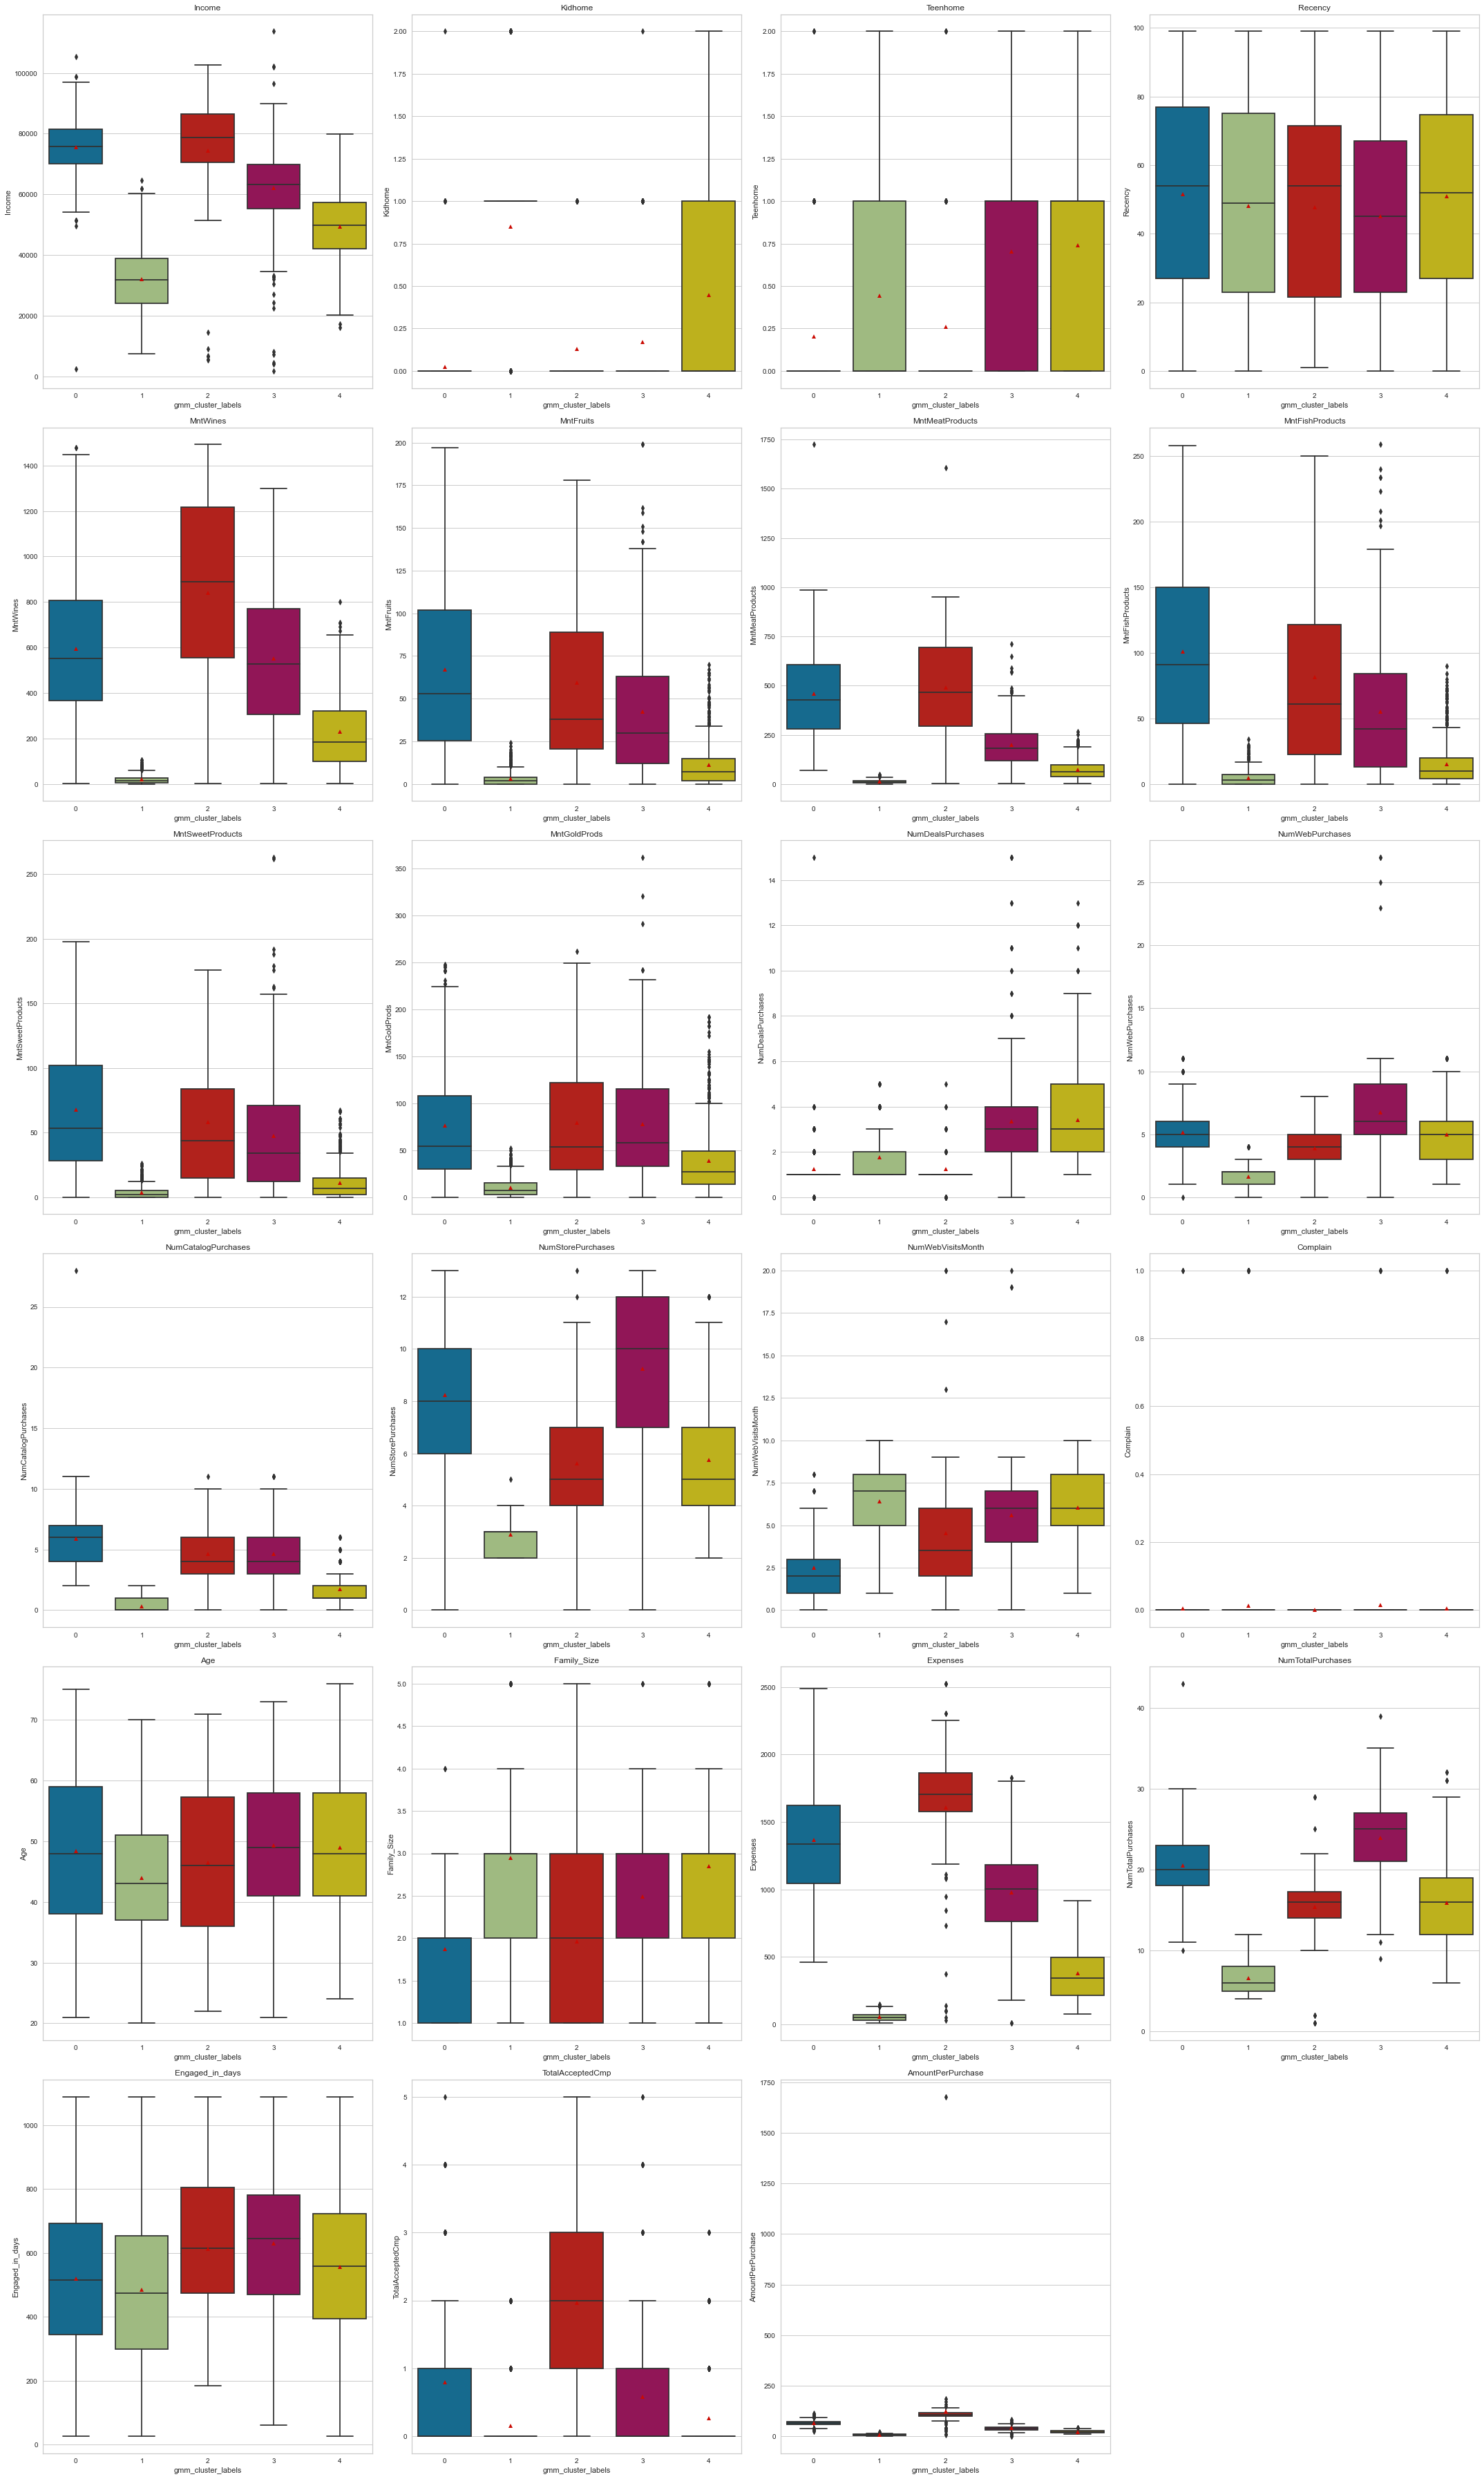

In [150]:
# Create boxplot for each of the variables

# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']


# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df_cleaned[variable], x=df_cleaned['gmm_cluster_labels'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()




### **Characteristics of each cluster**

**Cluster 0:**
- Cluster 0 is comprised of consumers with the highest mean income and highest mean amount spent on wines, fruits, fish, and sweet products. In addition, cluster 0 has customers with the highest mean catalog purchases. In contrast, cluster 0 has customers characterized by the lowest mean number of small children and teenagers hence the lowest mean number of kids and thus the smallest mean family size. It also has the lowest mean number of purchases made with a discount. 

**Summary for cluster 0:** 
- Cluster 0 seems to be comprised of customers the highest income earning customers (Tier 1). This is evidenced by the amount of income they earn. It's interesting how the customerd in this cluster have the highest mean income but not the highest mean expenses as this was a pattern followed by the previous models

**Cluster 1:**
- Cluster 1 is comprised of customers with the lowest mean income and the lowest mean amount spent on wines, fruits, meat, fish, sweet, and gold products. In addition, the customers in this cluster have the lowest mean number of web, catalog and store purchases thus having the lowest mean number of total purchases. They also characterized of having the lowest mean expenses, since they have the lowest mean amount spent per purchase and the lowest mean of the overall accepted campaigns. In contrast, the customers in this cluster have the highest mean birth year hence are comprised of mainly young people as compared to other clusters. It’s also observed that they have the highest mean number of small children and thus the largest mean number of kids which in turn, makes them have the largest mean family size. 

**Summary for cluster 1:**
- Cluster 1 seems to be comprised of tier 5 customers since they have the lowest mean income, expenses, number of total purchases, amount spent per purchase and the lowest mean total number of accepted campaigns. 

**Cluster 2:** 
- Cluster 2 is comprised of customers with the highest mean amount spent on wines, meat, and gold products. In addition, they have the highest mean expenses, total accepted campaigns and amount spent per purchase. In contrast the customers in this cluster have the least mean number of complaints and the lowest mean status. This means that majority of the customers in this cluster are single. It’s observed that their incomes are just slightly below those in cluster 0. 

**Summary for cluster 2:**
- It seems like cluster 2 is comprised of 2nd tier customers. This is becuase they earn slightly less income than those in cluster 0. It's interesting how the customers in this cluster are 2nd tierbut  have the highest mean number of expenses, total accepted campaigns and amount spent per purchase. This is behavior that is observed by first tier (highest income) earners.

**Cluster 3:** 
- Cluster 3 is comprised of customers with the lowest birth year and hence are the oldest as compared to other clusters. They also have the lowest mean recency but the highest mean number of web and store purchases with the highest mean number of complaints. Since they are comprised of the oldest people as compared to other clusters, it makes sense that they would have the longest relationship with the company evidenced by the engaged in days box plot. Customers in this cluster have the highest mean number of total purchases. 

**Summary for cluster 3:**
- It seems like cluster 3 is comprised of customers that are 3rd tier. This is evidenced by the amount of income they earn, expenses, amount spent per purchase, and total number of accepted campaigns as compared to those in other clusters

**Cluster 4:** 
- Cluster 4 is comprised of customers with the highest mean number of teenagers, highest mean number of purchases made with a discount and the highest mean status meaning that majority of the customers in this group are in a relationship

**Summary for cluster 4:**
- it seems like cluster 4 is comprised of customers that are 4th tier. This is evidenced by the amount of income they earn, expenses, amount spent per purchase, and total number of accepted campaigns as compared to those in other clusters

## **Conclusion and Recommendations**

1) **Refined Insights:** What are the most meaningful insights from the data relevant to the problem?

**USING  KMEANS**
- **Observations From Each Of The 3 Clusters**
- cluster 0 seems to belong to middle income earners. it seems to be related to customers who purchase the most products with a discount and make a lot of their purchases from the company's website. it also seems to capture customers of a higher age that the other clusters with a slightly higher status meaning having the highest number of teens. and the longest relationship with the company. 
- Cluster 1 seems to capture customers with the highest mean number of small children, web visits per month, complaints, overall kids and large family size. This cluster seems to belong to low-income earners evidenced due to the low income, lowest mean amount spent per purchase, lowest mean number of total purchases and the lowest amount spent on wines, fruits, meat, fish, sweet, and gold products
- Cluster 2 seems to capture customers with a high income, high recency, higher purchase of wines, fruits, meat, fish, sweet, and gold products. it also captures customers with a high number of catalog and store purchases, a higher number of total accepted campaigns and the amount per purchase. it also captures customers with the highest mean expense, highest mean number of total accepted campaigns and highest mean amount spent per purchase. Cluster 2 seems to belong to high income earners.

- **Observations From Each of the 5 Clusters** 
- Cluster 0 is comprised of tier 4 earners (second to last). This is evidenced by the amount of income they earn and their expenses on wines, fruits, meat, fish, sweet, and gold products in comparison with other clusters. They are also observed to have the highest number of purchases made on a discount, a higher number of kids hence a larger family size and most likely to be in a relationship as compared to the other clusters. The customers in this group have the longest relationship with the company.

- Cluster 1 is observed to consist of 2nd tier earners since they earn a relatively high income and have the highest mean expenditure on Fruits, meat, fish, sweet and gold products. They are also observed to have the highest recency, the lowest mean number of small children, website visits per month and the smallest family size. From the above observations 

- Cluster 2 is observed to consist of 3rd tier earners due to their moderately high income with the highest mean number of website and store purchases. This cluster seems to have the oldest customers, the highest number of total purchases and the lowest recency. 

- Cluster 3 is observed to consist of 5th tier earners (low-income earners) with the highest mean number of small children and the lowest amount spent on wines, fruits, meat, fish, sweet, and gold products. They are also observed to have the lowest mean number of store, catalog and web purchases hence the lowest mean overall accepted campaigns thus the lowest mean purchase as compared to the other clusters. They also have the lowest number of total purchases, lowest mean amount of money spent per purchase and the shortest relationship with the company. 

- Cluster 4 is observed to have 1st tier earners (very high-income earners) with the lowest mean number of purchases made with discount, the highest mean number of catalog purchases, total accepted campaigns, expenses, and amount of money spent per purchase. They are also observed to have the highest expenditure in wines. 

**USING KMEDOIDS** 
- **Observations From Each of the 5 Clusters** 
- Cluster 0 is observed to have 1st tier earners (very high-income earners) with the lowest mean number of kids and teenagers and hence the smallest family size. They also have the highest mean expenditure in wines, fruits, meat, fish, sweet and gold products. They are also characterized of having the highest mean catalog, and store purchases with the lowest mean web visits per month and purchases made with a discount. They have the highest mean expenses, total accepted campaigns and amount of money spent per purchase. 

- Cluster 1 is comprised of customers with the highest mean number of teenagers, website and total number of purchases. They have the lowest mean birth year and hence are the oldest in comparison to those in other clusters. It seems like the customers in this cluster are 2nd tier earners

- Cluster 2 is comprised of tier 4 earners (second to last ) with the highest mean purchase made with discounts, website visits per month, highest mean number of complaints, kids, and large family size. They are also characterized by the highest mean number of days with the company. They have the lowest mean status hence most of the customers in this cluster are single. 

- Cluster 3 is composed of 5th tier earners (low-income earners) with a high birth year thus are the youngest as compared to those in other clusters and the lowest mean income with the highest number of small children at home. They also have the lowest mean recency, amount spent on wines, fruits, meat, fish, sweet and gold products. They also have the lowest mean catalog, store, and website purchases hence have the lowest number of total purchases and hence the lowest mean expense and thus the lowest mean amount spent per purchase. 

- Cluster 4 is composed of customers with the highest mean of recency, the highest mean status, the lowest mean engagement with the company, and the lowest mean total accepted campaigns. From the above observations it’s observed the customers in this cluster are 3rd tier earners.

**USING HIERARCHICAL CLUSTERING**
- **USING AGGLOMERATIVE CLUSTERING**
- **Observations From Each of the 3 Clusters** 
- Cluster 0 is comprised of tier 1 earners with the highest mean income, recency, and amount of money spent on wines, fruits, meat, fish, sweet, and gold products. They also have the highest mean catalog and store purchases, the highest mean expenses, the highest mean total accepted campaigns, and the amount spent per purchase.  In contrast, they have the least number of small children (kidhome) and teenagers and hence have the least number of kids and thus a small family size. They also have the least status and have the lowest mean purchases with discounts and the lowest mean website visits per month. 

- Cluster 1 is comprised of tier 3 (lats tier earners) with the highest mean birth year hence are the youngest. They also have lowest mean income and amount of money spent on wines, fruits, meat, fish, sweet, and gold products including catalog, store and web purchases hence have the least mean total number of total purchases and thus the least total accepted campaigns and the least mean amount spent per purchase which, in turn, makes them have the least mean expenses. In contrast, they have the highest mean number of kids and thus have the largest families. They also have the highest mean number of web visits per month. 

- Cluster 2 is comprised of tier 2 earners with the lowest birth year and hence have the oldest customers. They have the highest mean number of teenagers, purchases made with a discount, web purchases and status. They also have the highest mean number of total purchases and have the longest relationship with the company. 

**USING GMM (Gaussian Mixture Model) ALGORITHM**
- **Observations From Each of the 5 Clusters** 
- Cluster 0 is comprised of Tier 1 earners with the highest mean income and highest mean amount spent on wines, fruits, fish, and sweet products. In addition, they have the highest mean catalog purchases. In contrast, they have the lowest mean number of small children and teenagers hence the lowest mean number of kids, thus the smallest mean family size. They also have the lowest mean number of purchases made with a discount. 

- Cluster 1 is comprised of tier 5 earners with the lowest mean income and the lowest mean amount spent on wines, fruits, meat, fish, sweet, and gold products. In addition, they have the lowest mean number of web, catalog and store purchases thus having the lowest mean number of total purchases. They also have the lowest mean expenses, as they have the lowest mean amount spent per purchase and the lowest mean of the overall accepted campaigns. In contrast, they have the highest mean birth year hence are the youngest as compared to other clusters. They also have the highest mean number of small children and thus the largest mean number of kids which in turn, makes them have the largest mean family size. 

- Cluster 2 is comprised of 2nd tier earners with the highest mean amount spent on wines, meat, and gold products. They also have the highest mean expenses, total accepted campaigns and amount spent per purchase. In contrast, they have the least mean number of complaints and the lowest mean status. It’s seen that their incomes are just slightly below those in cluster 0. 

- Cluster 3 is comprised of 3rd tier earners with the lowest birth year, hence the oldest as compared to other clusters. They have the lowest mean recency but the highest mean number of web and store purchases with the highest mean number of complaints. Since they are comprised of the oldest people as compared to other clusters, it makes sense that they would have the longest relationship with the company. They have the highest mean number of total purchases. 

- Cluster 4 is comprised of 4th tier earners with the highest mean number of teenagers, highest mean number of purchases made with a discount and the highest mean status. 

**Overall Observations**
- From the k-means cluster
- Cluster 2 consists of rich people. It’s observed that high earners were typically big spenders and were more likely to spend their income on wine, fruits, meat, fish, sweet, and gold products. They also typically had the lowest purchase of items on discount but spent most of their income purchasing products through the mail, from the store and hence typically had the highest total number of purchases, the highest total number of accepted offers from the company, and the highest amount of income pent per purchase. This increases their overall expenditure and hence making them the big spenders. It also observed that the customers in this category on average have less or no children. This might be explained by their low mean status since they are single and thus reduces the burden of the responsibilities that come with having children which makes them spend their income however, they see fit. Another observation from this category of people is that they usually spend the least amount of time on the company’s website. This means that advertising to. This category of people through the company website would not be as profitable. 
 
- Cluster 0 consists of working-cluster people. It's observed that the moderate-income earners are typically moderate spenders. Customers in this category are usually in a relationship since they typically have the highest mean status. They also tend to purchase a lot of products with discount and through the company website as compared to other categories. The customers in this category tend to have the most teenagers. 

- Cluster 1 consists of poor people. It’s observed that the low-income earners are the lowest spenders since they have the least income as compared to other categories. This means that they spend the least income on wine, fruits, meat, fish, sweet, and gold products hence the lowest total accepted offers thus the lowest amount spent per purchase. This category is observed to have more smaller children than any other category and are typically likely to have big families. These customers are typically the opposite of high-income earners. The people in this category seem to be poor people


2) **Comparison of various techniques and their relative performance:** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
- **Kmeans:**  When 3 clusters are used, there is a distinct separation of the clusters with some bit of overlap among them. It’s observed that cluster 0 has a little bit more than 1000 observations, cluster 1 has slightly more than 600 observations, and cluster 2 has slightly less than 600 observations.  When 5 clusters were used, there was less of a distinction between the clusters and the distribution among the clusters wan not uniform. It is also observed to have a low silhouette score. 

- **Kmedoids**: In this algorithm, 5 cluster were used. It was observed that there was some bit of overlap between the clusters. It’s observed that cluster 0 has slightly below 500 observations, cluster 1 has slightly below 600 observations, cluster 2 has slightly less than 300 observations, cluster 3 has more than 600 observations, and cluster 4 has slightly less than 300 observations. The distribution of the clusters was very uneven. It is also observed to have a low silhouette score. 

- **Hierarchical Clustering**: Different forms of Hierarchical clustering were used, and it was observed that the Average linkage of cityblock hierarchical clustering provides better separated clusters since it has the highest cophenetic correlation (the way used to compare two or more dendrograms). 

- **Agglomerative Hierarchical**:  In this algorithm, 3 clusters were used, and it was observed that clusters 0 and 2 had observations slightly less than 600 and cluster 1 had more than 1000 observations. The distribution of the clusters was slightly uneven. 

- **DBSCAN:** Using the DBSCAN algorithm, there were two clusters formed. After fine tuning and experimenting with different eps values and min samples, different clusters were formed but that did not give us any insight into customer behavior patterns. It is also observed to have a low silhouette score. 

- **Gaussian Mixture Model (GMM):** With the gmm, we used 5 clusters, and it was observed that there was so much over lapping among them. And the observations were not evenly distributed. It is also observed to have a low silhouette score. 

The Kmeans (3 clusters) and the agglomerative hierarchical clustering algorithm perform relatively better in terms of forming distinct clusters and having observation that align with what is expected in the real world. 

3) **Proposal for the final solution design:** What model do you propose to be adopted? Why is this the best solution to adopt?
- Between the K-means and the agglomerative hierarchical clustering algorithm, I would propose that the K-means cluster should be adopted because the k-means model boasts on better separation of the customers into distinct clusters, is relatively simple to implement and can be scaled to larger data sets while being computationally less expensive as compared to other clustering algorithms